In [1]:
import datetime
import pytz

# Get the current time in UTC and convert to IST
ist_timezone = pytz.timezone("Asia/Kolkata")
ist_now = datetime.datetime.now(pytz.utc).astimezone(ist_timezone)

# Print the time in IST
print(f"Notebook last run (end-to-end): {ist_now.strftime('%Y-%m-%d %H:%M:%S %Z')}")


Notebook last run (end-to-end): 2025-01-24 22:41:49 IST


##**Problem Statement**

Netflix, one of the largest video streaming platforms globally, needs data-driven insights to guide its content production and business strategy. With a library of over 8,000 titles and a subscriber base of 200+ million (as of 2021), Netflix aims to answer the following questions:

  1. What type of content (movies or TV shows) should Netflix focus on?
  2. What genres or themes are most popular globally and regionally?
  3. How can Netflix expand its presence and engagement in different countries?
  4. What trends in release timings, ratings, and duration influence content performance?

The goal is to provide actionable insights that can help Netflix optimize content production and strategize market expansion.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")


##**Initial Analysis of various Metrics in the Dataset**

In [4]:
# Performing Initial Inspections
print("Shape of Dataset: ", df.shape)
df.info()  # Data types and null values
df.head()

Shape of Dataset:  (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

From the results of the above cell it shows that there are NaN values in director, cast, country, date_added, rating and duration columns.

In [5]:
df.describe(include='all')  # Statistical summary

show_id   type                 title       director  \
count     8807   8807                  8807           6173   
unique    8807      2                  8807           4528   
top         s1  Movie  Dick Johnson Is Dead  Rajiv Chilaka   
freq         1   6131                     1             19   
mean       NaN    NaN                   NaN            NaN   
std        NaN    NaN                   NaN            NaN   
min        NaN    NaN                   NaN            NaN   
25%        NaN    NaN                   NaN            NaN   
50%        NaN    NaN                   NaN            NaN   
75%        NaN    NaN                   NaN            NaN   
max        NaN    NaN                   NaN            NaN   

                      cast        country       date_added  release_year  \
count                 7982           7976             8797   8807.000000   
unique                7692            748             1767           NaN   
top     David Attenborough  United States  January 1, 2020           NaN   
freq                    19           2818              109           NaN   
mean                   NaN            NaN              NaN   2014.180198   
std                    NaN            NaN              NaN      8.819312   
min                    NaN            NaN              NaN   1925.000000   
25%                    NaN            NaN              NaN   2013.000000   
50%                    NaN            NaN              NaN   2017.000000   
75%                    NaN            NaN              NaN   2019.000000   
max                    NaN            NaN              NaN   2021.000000   

       rating  duration                     listed_in  \
count    8803      8804                          8807   
unique     17       220                           514   
top     TV-MA  1 Season  Dramas, International Movies   
freq     3207      1793                           362   
mean      NaN       NaN                           NaN   
std       NaN       NaN                           NaN   
min       NaN       NaN                           NaN   
25%       NaN       NaN                           NaN   
50%       NaN       NaN                           NaN   
75%       NaN       NaN                           NaN   
max       NaN       NaN                           NaN   

                                              description  
count                                                8807  
unique                                               8775  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

Since we are not analyzing based on sentiment of movie/show description, decided to drop the description column.

In [6]:
# since we are not analyzing based on sentiment of movie/show description, decided to drop the description column
df.drop('description', axis=1, inplace=True)

In [7]:
type_count = df['type'].value_counts() # Prior Preprocessing stats
type_count

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Percentage of Movies and TV Show type
Movie      69.615079
TV Show    30.384921
Name: count, dtype: float64 



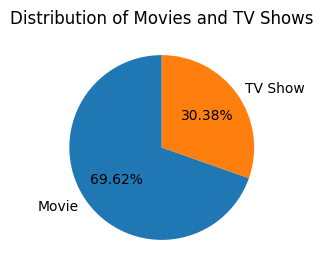

In [8]:
type_count_percentage = type_count/len(df) *100
print("Percentage of Movies and TV Show", type_count_percentage,'\n')

# a pie chart to compare movies vs. TV shows
plt.figure(figsize=(3, 3))
plt.pie(type_count, labels=type_count.index, autopct='%1.2f%%', startangle=90)
plt.title("Distribution of Movies and TV Shows")
plt.show()

From the above cell results, movies span upto 70% and Tv Shows span upto 30%.

In [9]:
rating_count = df['rating'].value_counts() # Prior Preprocessing stats
rating_count

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

Percentage of Ratings rating
TV-MA       36.414216
TV-14       24.525945
TV-PG        9.799024
R            9.072329
PG-13        5.563756
TV-Y7        3.792438
TV-Y         3.485864
PG           3.258771
TV-G         2.498013
NR           0.908368
G            0.465539
TV-Y7-FV     0.068128
NC-17        0.034064
UR           0.034064
74 min       0.011355
84 min       0.011355
66 min       0.011355
Name: count, dtype: float64 



Text(0, 0.5, 'Count')

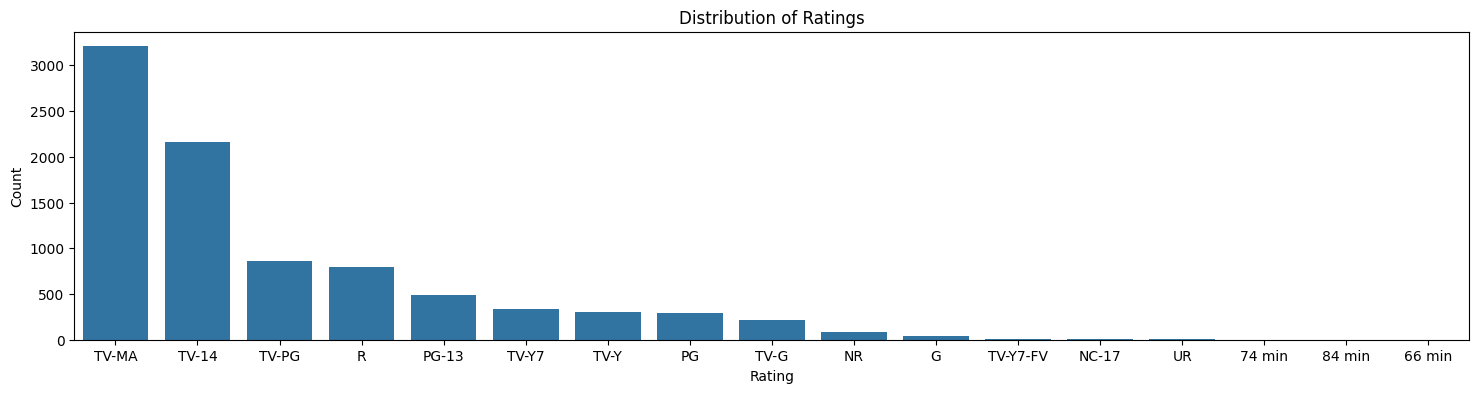

In [10]:
rating_count_percentage = rating_count/len(df) *100
print("Percentage of Ratings", rating_count_percentage,"\n")

# A bar plot to compare ratings
plt.figure(figsize=(18, 4))
sns.barplot(x=rating_count.index, y=rating_count.values)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")

From the above cell results, TV-MA and TV-14 span for 36% and 25% respectively.

##**Imputation, PreProcessing & Extraction of Columns for a better analysis**

Displaying rows having NULL or NaN values.

In [11]:
df[df.isnull().any(axis=1)] # rows with NaN values

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8795   s8796  TV Show        Yu-Gi-Oh! Arc-V              NaN   
8796   s8797  TV Show             Yunus Emre              NaN   
8797   s8798  TV Show              Zak Storm              NaN   
8800   s8801  TV Show     Zindagi Gulzar Hai              NaN   
8803   s8804  TV Show            Zombie Dumb              NaN   

                                                   cast  \
0                                                   NaN   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                                   NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
...                                                 ...   
8795  Mike Liscio, Emily Bauer, Billy Bob Thompson, ...   
8796  Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...   
8797  Michael Johnston, Jessica Gee-George, Christin...   
8800  Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...   
8803                                                NaN   

                                            country          date_added  \
0                                     United States  September 25, 2021   
1                                      South Africa  September 24, 2021   
2                                               NaN  September 24, 2021   
3                                               NaN  September 24, 2021   
4                                             India  September 24, 2021   
...                                             ...                 ...   
8795                                  Japan, Canada         May 1, 2018   
8796                                         Turkey    January 17, 2017   
8797  United States, France, South Korea, Indonesia  September 13, 2018   
8800                                       Pakistan   December 15, 2016   
8803                                            NaN        July 1, 2019   

      release_year rating   duration  \
0             2020  PG-13     90 min   
1             2021  TV-MA  2 Seasons   
2             2021  TV-MA   1 Season   
3             2021  TV-MA   1 Season   
4             2021  TV-MA  2 Seasons   
...            ...    ...        ...   
8795          2015  TV-Y7  2 Seasons   
8796          2016  TV-PG  2 Seasons   
8797          2016  TV-Y7  3 Seasons   
8800          2012  TV-PG   1 Season   
8803          2018  TV-Y7  2 Seasons   

                                              listed_in  
0                                         Documentaries  
1       International TV Shows, TV Dramas, TV Mysteries  
2     Crime TV Shows, International TV Shows, TV Act...  
3                                Docuseries, Reality TV  
4     International TV Shows, Romantic TV Shows, TV ...  
...                                                 ...  
8795                             Anime Series, Kids' TV  
8796                  International TV Shows, TV Dramas  
8797                                           Kids' TV  
8800  International TV Shows, Romantic TV Shows, TV ...  
8803             Kids' TV, Korean TV Shows, TV Comedies  

[3475 rows x 11 columns]

Displaying Count of rows having NaN values.



In [12]:
df.isnull().sum() # count of NaN values across all columns

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

Replacing NaN values in Director, Cast, Country Columns to 'Unknown'.

In [13]:
# Replacing NaN values in director, cast, country Columns to Unknown
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

<ipython-input-13-3bb7aa233e6a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
<ipython-input-13-3bb7aa233e6a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Displaying Count of rows having NaN values for verification.

In [14]:
print(df.isnull().sum()) # count of NaN values across all columns
df.head(1) # as earlier first row had NaN cast, ... to just verify

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
dtype: int64


show_id   type                 title         director     cast  \
0      s1  Movie  Dick Johnson Is Dead  Kirsten Johnson  Unknown   

         country          date_added  release_year rating duration  \
0  United States  September 25, 2021          2020  PG-13   90 min   

       listed_in  
0  Documentaries

As we cant impute duration and rating columns based on the info in other columns we are droping the rows containing NaN for duration and rating columns.

As there are only 10 rows with date added as NaN we can simply dropna them but trying to impute them with January 1 of the corresponding release year.

In [15]:
# And as we cant impute duration and rating columns based on the info in other columns we are droping the rows containing NaN for duration and rating columns
df.dropna(subset=['duration', 'rating'], inplace=True)

In [16]:
# as there are only 10 rows with date added as NaN we can simply dropna them but trying to impute them with January 1 of the coressponding release year
# find the datatype of column date_added of the first row cell
type(df['date_added'][0])

str

Storing the indices of the rows for which date_added is NaN ,.. to verify after imputation.

In [17]:
# Store the indices of the rows for which date_added is NaN ,.. to verify after imputation
nan_indices = df[df['date_added'].isnull()].index

As we have no NaN values in release_year column.

For the rows with NaN values in date_added columns, setting date_added as same as the release_year, Say "January 1, 2020" of that row in string format.

In [18]:
# As we have no NaN values in release_year column
# For the rows with NaN values in date_added columns, setting date_added as same as the release_year, Say "January 1, 2020" of that row in string format
df.loc[df['date_added'].isnull(), 'date_added'] = 'January 1, ' +  df['release_year'].astype(str)
df[df.index.isin(nan_indices)] # to verify

show_id     type                                        title director  \
6066   s6067  TV Show  A Young Doctor's Notebook and Other Stories  Unknown   
6174   s6175  TV Show              Anthony Bourdain: Parts Unknown  Unknown   
6795   s6796  TV Show                                      Frasier  Unknown   
6806   s6807  TV Show                                      Friends  Unknown   
6901   s6902  TV Show                              Gunslinger Girl  Unknown   
7196   s7197  TV Show                                     Kikoriki  Unknown   
7254   s7255  TV Show                          La Familia P. Luche  Unknown   
7406   s7407  TV Show                                        Maron  Unknown   
7847   s7848  TV Show                                 Red vs. Blue  Unknown   
8182   s8183  TV Show                 The Adventures of Figaro Pho  Unknown   

                                                   cast         country  \
6066  Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...  United Kingdom   
6174                                   Anthony Bourdain   United States   
6795  Kelsey Grammer, Jane Leeves, David Hyde Pierce...   United States   
6806  Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   United States   
6901  Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...           Japan   
7196                                      Igor Dmitriev         Unknown   
7254  Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...   United States   
7406  Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   United States   
7847  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...   United States   
8182  Luke Jurevicius, Craig Behenna, Charlotte Haml...       Australia   

           date_added  release_year rating    duration  \
6066  January 1, 2013          2013  TV-MA   2 Seasons   
6174  January 1, 2018          2018  TV-PG   5 Seasons   
6795  January 1, 2003          2003  TV-PG  11 Seasons   
6806  January 1, 2003          2003  TV-14  10 Seasons   
6901  January 1, 2008          2008  TV-14   2 Seasons   
7196  January 1, 2010          2010   TV-Y   2 Seasons   
7254  January 1, 2012          2012  TV-14   3 Seasons   
7406  January 1, 2016          2016  TV-MA   4 Seasons   
7847  January 1, 2015          2015     NR  13 Seasons   
8182  January 1, 2015          2015  TV-Y7   2 Seasons   

                                              listed_in  
6066           British TV Shows, TV Comedies, TV Dramas  
6174                                         Docuseries  
6795                     Classic & Cult TV, TV Comedies  
6806                     Classic & Cult TV, TV Comedies  
6901                       Anime Series, Crime TV Shows  
7196                                           Kids' TV  
7254  International TV Shows, Spanish-Language TV Sh...  
7406                                        TV Comedies  
7847  TV Action & Adventure, TV Comedies, TV Sci-Fi ...  
8182                              Kids' TV, TV Comedies

In [19]:
print(df.isnull().sum()) # count of NaN values across all columns

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [20]:
df.isnull().sum().value_counts()
# Will show the isnull counts aggregated

0    11
Name: count, dtype: int64

As above cell's result shows that all of the 11 columns in the dataset have no NaN values.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8800 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8800 non-null   object
 1   type          8800 non-null   object
 2   title         8800 non-null   object
 3   director      8800 non-null   object
 4   cast          8800 non-null   object
 5   country       8800 non-null   object
 6   date_added    8800 non-null   object
 7   release_year  8800 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8800 non-null   object
 10  listed_in     8800 non-null   object
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


In [22]:
df.describe(include = 'all') # NaN in describe are for non int, float type

show_id   type                 title director     cast        country  \
count     8800   8800                  8800     8800     8800           8800   
unique    8800      2                  8800     4527     7689            749   
top         s1  Movie  Dick Johnson Is Dead  Unknown  Unknown  United States   
freq         1   6126                     1     2631      825           2815   
mean       NaN    NaN                   NaN      NaN      NaN            NaN   
std        NaN    NaN                   NaN      NaN      NaN            NaN   
min        NaN    NaN                   NaN      NaN      NaN            NaN   
25%        NaN    NaN                   NaN      NaN      NaN            NaN   
50%        NaN    NaN                   NaN      NaN      NaN            NaN   
75%        NaN    NaN                   NaN      NaN      NaN            NaN   
max        NaN    NaN                   NaN      NaN      NaN            NaN   

             date_added  release_year rating  duration  \
count              8800   8800.000000   8800      8800   
unique             1770           NaN     14       220   
top     January 1, 2020           NaN  TV-MA  1 Season   
freq                109           NaN   3207      1791   
mean                NaN   2014.179886    NaN       NaN   
std                 NaN      8.822583    NaN       NaN   
min                 NaN   1925.000000    NaN       NaN   
25%                 NaN   2013.000000    NaN       NaN   
50%                 NaN   2017.000000    NaN       NaN   
75%                 NaN   2019.000000    NaN       NaN   
max                 NaN   2021.000000    NaN       NaN   

                           listed_in  
count                           8800  
unique                           514  
top     Dramas, International Movies  
freq                             362  
mean                             NaN  
std                              NaN  
min                              NaN  
25%                              NaN  
50%                              NaN  
75%                              NaN  
max                              NaN

Now that we have no Null/NaN values in our data set, Lets convert date_added to datetime.

In [23]:
# Convert date_added to datetime

df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), format='%B %d, %Y')

Checking, our imputed dates have also been converted into proper date format.

In [24]:
df[df.index.isin(nan_indices)]

show_id     type                                        title director  \
6066   s6067  TV Show  A Young Doctor's Notebook and Other Stories  Unknown   
6174   s6175  TV Show              Anthony Bourdain: Parts Unknown  Unknown   
6795   s6796  TV Show                                      Frasier  Unknown   
6806   s6807  TV Show                                      Friends  Unknown   
6901   s6902  TV Show                              Gunslinger Girl  Unknown   
7196   s7197  TV Show                                     Kikoriki  Unknown   
7254   s7255  TV Show                          La Familia P. Luche  Unknown   
7406   s7407  TV Show                                        Maron  Unknown   
7847   s7848  TV Show                                 Red vs. Blue  Unknown   
8182   s8183  TV Show                 The Adventures of Figaro Pho  Unknown   

                                                   cast         country  \
6066  Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...  United Kingdom   
6174                                   Anthony Bourdain   United States   
6795  Kelsey Grammer, Jane Leeves, David Hyde Pierce...   United States   
6806  Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   United States   
6901  Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...           Japan   
7196                                      Igor Dmitriev         Unknown   
7254  Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...   United States   
7406  Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   United States   
7847  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...   United States   
8182  Luke Jurevicius, Craig Behenna, Charlotte Haml...       Australia   

     date_added  release_year rating    duration  \
6066 2013-01-01          2013  TV-MA   2 Seasons   
6174 2018-01-01          2018  TV-PG   5 Seasons   
6795 2003-01-01          2003  TV-PG  11 Seasons   
6806 2003-01-01          2003  TV-14  10 Seasons   
6901 2008-01-01          2008  TV-14   2 Seasons   
7196 2010-01-01          2010   TV-Y   2 Seasons   
7254 2012-01-01          2012  TV-14   3 Seasons   
7406 2016-01-01          2016  TV-MA   4 Seasons   
7847 2015-01-01          2015     NR  13 Seasons   
8182 2015-01-01          2015  TV-Y7   2 Seasons   

                                              listed_in  
6066           British TV Shows, TV Comedies, TV Dramas  
6174                                         Docuseries  
6795                     Classic & Cult TV, TV Comedies  
6806                     Classic & Cult TV, TV Comedies  
6901                       Anime Series, Crime TV Shows  
7196                                           Kids' TV  
7254  International TV Shows, Spanish-Language TV Sh...  
7406                                        TV Comedies  
7847  TV Action & Adventure, TV Comedies, TV Sci-Fi ...  
8182                              Kids' TV, TV Comedies

In [25]:
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8800, dtype: datetime64[ns]

All of date_added is properly converted into YYYY-MM-DD format

In [26]:
df['date_added'].isnull().sum()

0

Extracting year_added, month_added, week_added columns.

In [27]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['week_added'] = df['date_added'].dt.isocalendar().week

Keeping duration of show as a integer

In [28]:
df['duration'] = df['duration'].str.replace(" min", "").str.replace(" Season", "").str.replace("s", "")
df['duration'] = df['duration'].astype(int)

In [29]:
df['duration']

0        90
1         2
2         1
3         1
4         2
       ... 
8802    158
8803      2
8804     88
8805     88
8806    111
Name: duration, Length: 8800, dtype: int64

In [30]:
df.sample(5)

show_id     type               title          director  \
6842   s6843    Movie           Get Smart       Peter Segal   
3197   s3198    Movie            Mahi NRI  Gaurav Bavdankar   
2095   s2096    Movie  Making The Witcher      Nathan Wiley   
3917   s3918    Movie               Shabd       Leena Yadav   
4772   s4773  TV Show       Meteor Garden           Unknown   

                                                   cast         country  \
6842  Steve Carell, Anne Hathaway, Dwayne Johnson, A...   United States   
3197  Harrdy Sandhu, Poppy Jabbal, Rameet Kaur, B.N....  United Kingdom   
2095  Henry Cavill, Anya Chalotra, Freya Allan, Eamo...   United States   
3917  Sanjay Dutt, Aishwarya Rai Bachchan, Zayed Kha...           India   
4772  Shen Yue, Dylan Wang, Darren Chen, Connor Lian...           China   

     date_added  release_year rating  duration  \
6842 2019-04-01          2008  PG-13       110   
3197 2019-12-01          2017  TV-14       134   
2095 2020-08-26          2020  TV-MA        33   
3917 2019-04-15          2005  TV-14       146   
4772 2018-07-14          2018  TV-14         1   

                                              listed_in  year_added  \
6842                       Action & Adventure, Comedies        2019   
3197             Comedies, Dramas, International Movies        2019   
2095                                      Documentaries        2020   
3917      Dramas, International Movies, Romantic Movies        2019   
4772  International TV Shows, Romantic TV Shows, TV ...        2018   

      month_added  week_added  
6842            4          14  
3197           12          48  
2095            8          35  
3917            4          16  
4772            7          28

Changing Rating and Type columns to Category.

In [31]:
# Changing rating column into category
df['rating'] = pd.Categorical(df['rating'])
print(df.info())
df.sample()

<class 'pandas.core.frame.DataFrame'>
Index: 8800 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8800 non-null   object        
 1   type          8800 non-null   object        
 2   title         8800 non-null   object        
 3   director      8800 non-null   object        
 4   cast          8800 non-null   object        
 5   country       8800 non-null   object        
 6   date_added    8800 non-null   datetime64[ns]
 7   release_year  8800 non-null   int64         
 8   rating        8800 non-null   category      
 9   duration      8800 non-null   int64         
 10  listed_in     8800 non-null   object        
 11  year_added    8800 non-null   int32         
 12  month_added   8800 non-null   int32         
 13  week_added    8800 non-null   UInt32        
dtypes: UInt32(1), category(1), datetime64[ns](1), int32(2), int64(2), object(7)
memory usage: 1.1

show_id     type     title director  \
5520   s5521  TV Show  Girlboss  Unknown   

                                                   cast        country  \
5520  Britt Robertson, Ellie Reed, Johnny Simmons, A...  United States   

     date_added  release_year rating  duration    listed_in  year_added  \
5520 2017-04-21          2017  TV-MA         1  TV Comedies        2017   

      month_added  week_added  
5520            4          16

In [32]:
# Changing type column into category
df['type'] = pd.Categorical(df['type'])
print(df.info())
df.sample()

<class 'pandas.core.frame.DataFrame'>
Index: 8800 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8800 non-null   object        
 1   type          8800 non-null   category      
 2   title         8800 non-null   object        
 3   director      8800 non-null   object        
 4   cast          8800 non-null   object        
 5   country       8800 non-null   object        
 6   date_added    8800 non-null   datetime64[ns]
 7   release_year  8800 non-null   int64         
 8   rating        8800 non-null   category      
 9   duration      8800 non-null   int64         
 10  listed_in     8800 non-null   object        
 11  year_added    8800 non-null   int32         
 12  month_added   8800 non-null   int32         
 13  week_added    8800 non-null   UInt32        
dtypes: UInt32(1), category(2), datetime64[ns](1), int32(2), int64(2), object(6)
memory usage: 1.1

show_id   type         title        director  \
1673   s1674  Movie  Black Friday  Anurag Kashyap   

                                                   cast country date_added  \
1673  Pavan Malhotra, Kay Kay Menon, Aditya Srivasta...   India 2020-11-19   

      release_year rating  duration                     listed_in  year_added  \
1673          2004  TV-MA       162  Dramas, International Movies        2020   

      month_added  week_added  
1673           11          47

###Till here we have Imputed, dropped rows and preprocessed the data (except for the columns whose data should be split and exploded).



#**Movies and TV Shows Combined Analysis**

In [33]:
type_count = df['type'].value_counts()
print('\nShow Type Counts')
print(type_count)


Show Type Counts
type
Movie      6126
TV Show    2674
Name: count, dtype: int64


Type Count Percentage and Plotting

Percentage of Movies and TV Show type
Movie      69.613636
TV Show    30.386364
Name: count, dtype: float64 



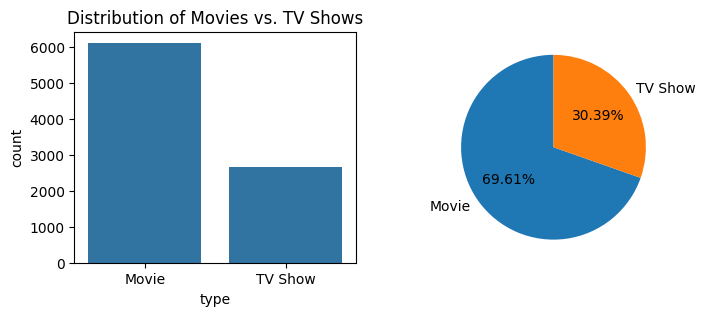

In [34]:
type_count_percentage = type_count/len(df) *100
print("Percentage of Movies and TV Show", type_count_percentage,'\n')


plt.figure(figsize=(8, 3))
plt.subplot(1,2,2)
plt.pie(type_count, labels=type_count.index, autopct='%1.2f%%', startangle=90)

plt.subplot(1,2,1)
sns.countplot(data=df, x='type')
plt.title("Distribution of Movies vs. TV Shows")

plt.show()

From the above cell, Movies account for 70%, whereas TV shows account for 30%

Rating Counts and Plotting

Percentage of Ratings rating
TV-MA       36.443182
TV-14       24.545455
TV-PG        9.806818
R            9.079545
PG-13        5.568182
TV-Y7        3.795455
TV-Y         3.488636
PG           3.261364
TV-G         2.500000
NR           0.909091
G            0.465909
TV-Y7-FV     0.068182
NC-17        0.034091
UR           0.034091
Name: count, dtype: float64 



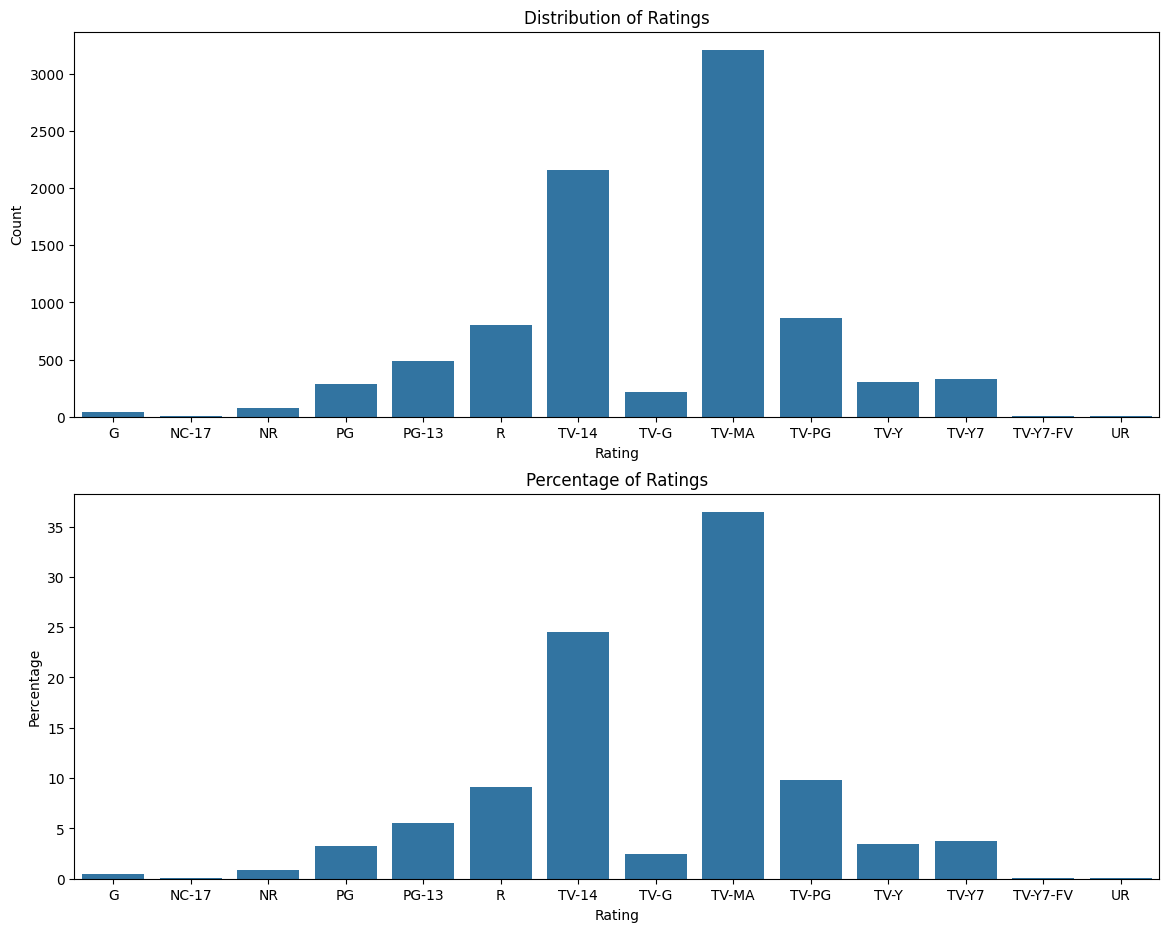

Top5 Ratings are: rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: count, dtype: int64


In [35]:
rating_count = df['rating'].value_counts()

rating_count_percentage = rating_count/len(df) *100
print("Percentage of Ratings", rating_count_percentage,'\n')

# A bar plot to compare ratings
plt.figure(figsize=(14, 11))

plt.subplot(2,1,1)
sns.barplot(x=rating_count.index, y=rating_count.values)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")

plt.subplot(2,1,2)
sns.barplot(x=rating_count_percentage.index, y=rating_count_percentage.values)
plt.title("Percentage of Ratings")
plt.xlabel("Rating")
plt.ylabel("Percentage")

plt.show()

# Top5 ratings
top_5_ratings = rating_count.head(5)
print('Top5 Ratings are:',top_5_ratings)



TV-MA holds the higher percentage of ratings - 36.44%, Next is TV-14 with 24.54

Relation between rating and type

<ipython-input-36-ff82b4048de9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_type_counts = df.groupby(['rating', 'type']).size().reset_index(name='count').sort_values('count', ascending=False)


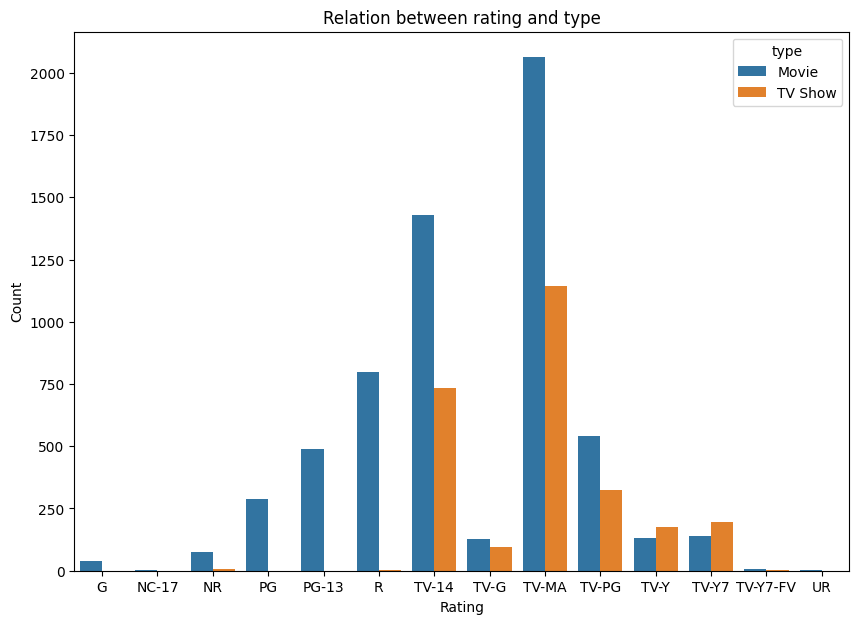

rating     type  count
16     TV-MA    Movie   2062
12     TV-14    Movie   1427
17     TV-MA  TV Show   1145
10         R    Movie    797
13     TV-14  TV Show    733
18     TV-PG    Movie    540
8      PG-13    Movie    490
19     TV-PG  TV Show    323
6         PG    Movie    287
23     TV-Y7  TV Show    195
21      TV-Y  TV Show    176
22     TV-Y7    Movie    139
20      TV-Y    Movie    131
14      TV-G    Movie    126
15      TV-G  TV Show     94
4         NR    Movie     75
0          G    Movie     41
5         NR  TV Show      5
24  TV-Y7-FV    Movie      5
2      NC-17    Movie      3
26        UR    Movie      3
11         R  TV Show      2
25  TV-Y7-FV  TV Show      1
1          G  TV Show      0
9      PG-13  TV Show      0
7         PG  TV Show      0
3      NC-17  TV Show      0
27        UR  TV Show      0

In [36]:
# Relation between rating and type
rating_type_counts = df.groupby(['rating', 'type']).size().reset_index(name='count').sort_values('count', ascending=False)
plt.figure(figsize=(10,7))
sns.countplot(x= 'rating', data =df, hue = 'type')
plt.title('Relation between rating and type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
rating_type_counts

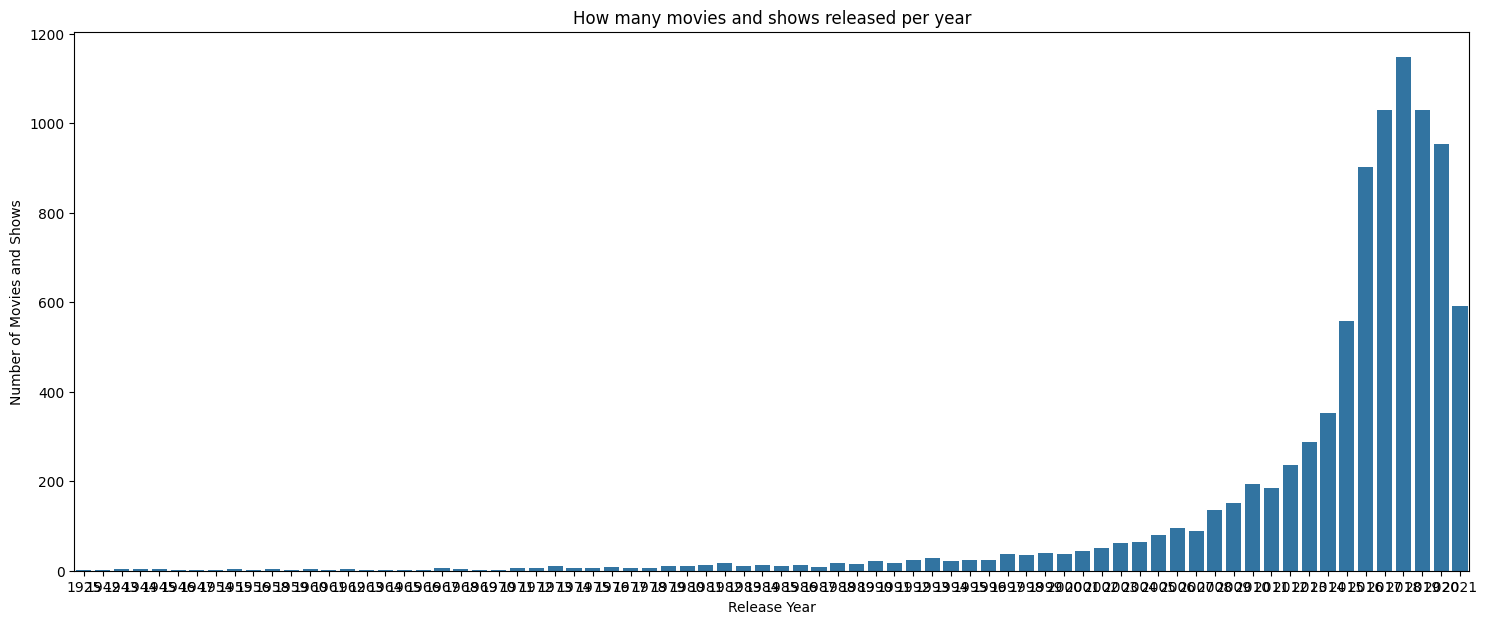

release_year
2018    1147
2019    1030
2017    1030
2020     953
2016     902
Name: release_year, dtype: int64

In [37]:
plt.figure(figsize=(18,7))
sns.countplot(x= 'release_year', data =df)
plt.title('How many movies and shows released per year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies and Shows')
plt.show()

df.groupby('release_year')['release_year'].count().sort_values(ascending=False).head() # Shows Top5 years most movies released

highest no of Movies and Shows were released in 2018.

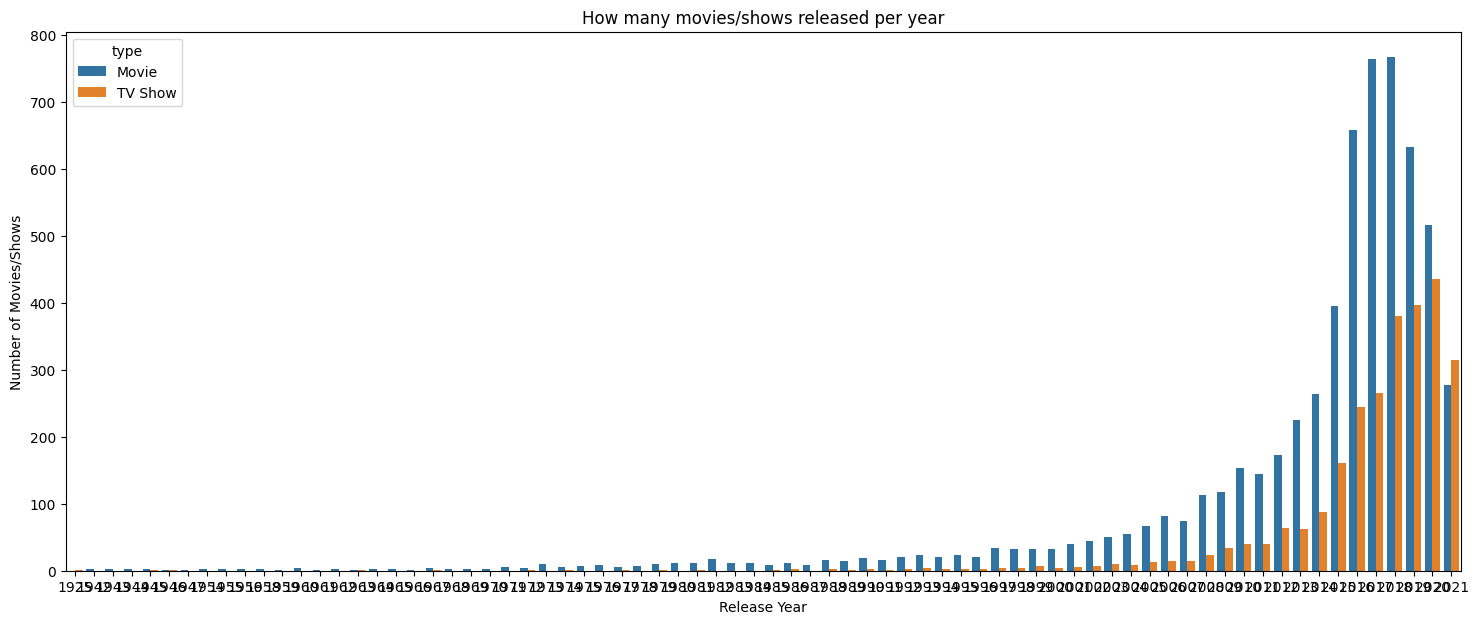

In [38]:
plt.figure(figsize=(18,7))
sns.countplot(x= 'release_year', data =df, hue = 'type')
plt.title('How many movies/shows released per year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/Shows')
plt.show()

Except for 2021, every other year had more Movies released the TV Shows maybe due to COVID-19.

Calculating and Plotting, how many Movies and Shows released per year.

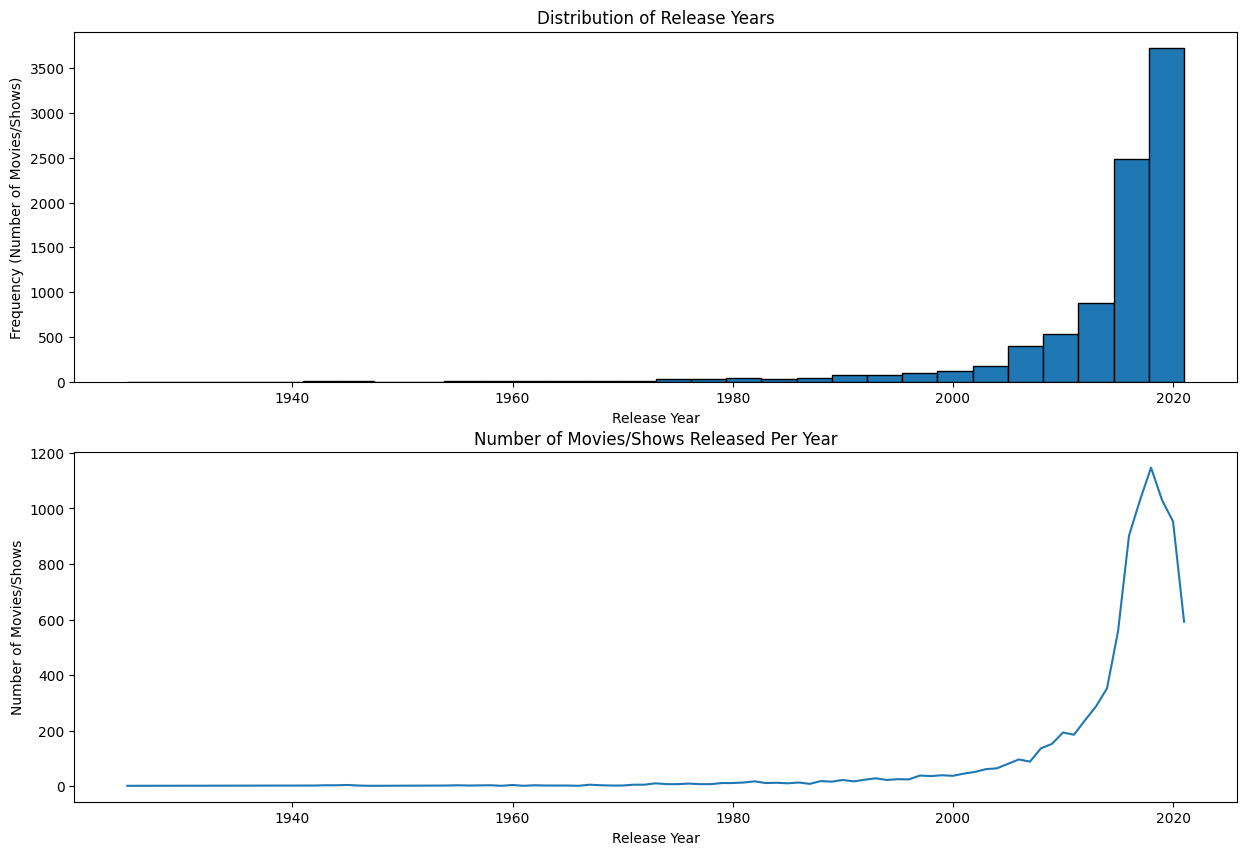

release_year  count
70          2018   1147
71          2019   1030
69          2017   1030
72          2020    953
68          2016    902

In [39]:
# How many movies/shows released per year.
yearly_releases = df.groupby('release_year')['release_year'].count().reset_index(name='count')


plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
plt.hist(df['release_year'], bins=30, edgecolor='black')  # 'bins' controls bar width
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency (Number of Movies/Shows)')

plt.subplot(2,1,2)
sns.lineplot(x= 'release_year', y='count', data=yearly_releases)
plt.title('Number of Movies/Shows Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/Shows')
plt.show()

yearly_releases.sort_values('count', ascending = False).head()

Calculating and how many movies/shows released per year.

<ipython-input-40-de54989aaff3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_type_releases = df.groupby(['release_year','type'])['show_id'].count().reset_index(name='count')


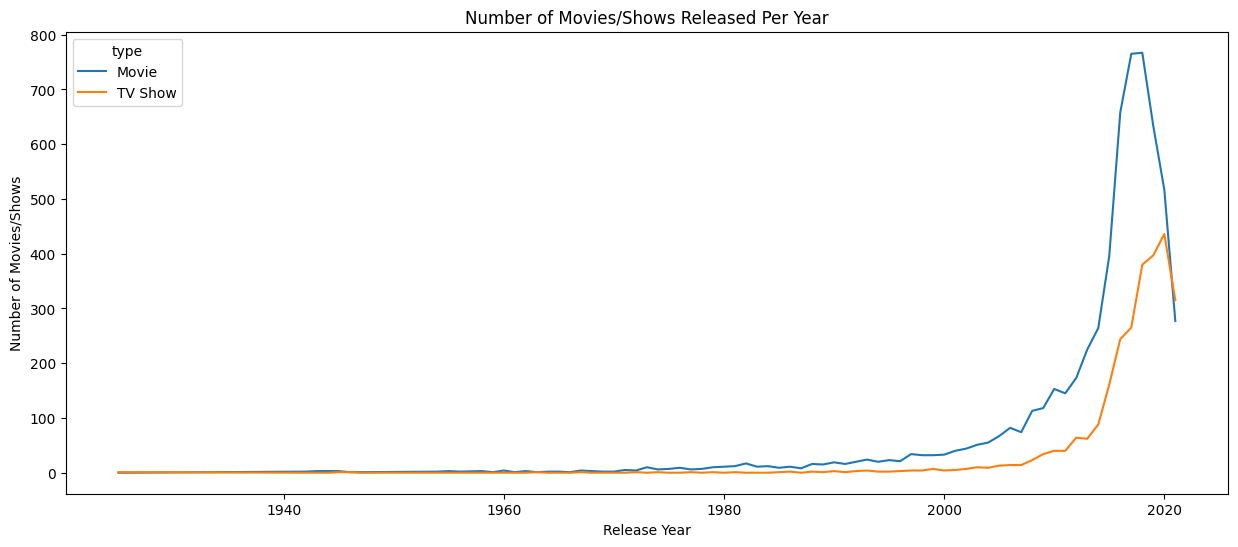

The  Top 5 years with the highest number of Movies released are: 
140    2018
138    2017
136    2016
142    2019
144    2020
Name: release_year, dtype: int64
The  Top 5 years with the highest number of TV Shows released are: 
145    2020
143    2019
141    2018
147    2021
139    2017
Name: release_year, dtype: int64


In [40]:
# How many movies/shows released per year.
yearly_type_releases = df.groupby(['release_year','type'])['show_id'].count().reset_index(name='count')

plt.figure(figsize=(15, 6))

sns.lineplot(x= 'release_year', y='count', data=yearly_type_releases, hue = 'type')
plt.title('Number of Movies/Shows Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/Shows')
plt.show()

max_movie_year = yearly_type_releases[yearly_type_releases['type'] == 'Movie'].sort_values(by='count', ascending=False).iloc[0:5]['release_year']
print(f"The  Top 5 years with the highest number of Movies released are: \n{max_movie_year}")

max_tv_show_year = yearly_type_releases[yearly_type_releases['type'] == 'TV Show'].sort_values(by='count', ascending=False).iloc[0:5]['release_year']
print(f"The  Top 5 years with the highest number of TV Shows released are: \n{max_tv_show_year}")


From the above cell results,

The year with the Highest umber of Movie releases - 2018

The year with the highest number of TV Show releases - 2020

Calculating and Plotting how many movies/shows added per year on Netflix.

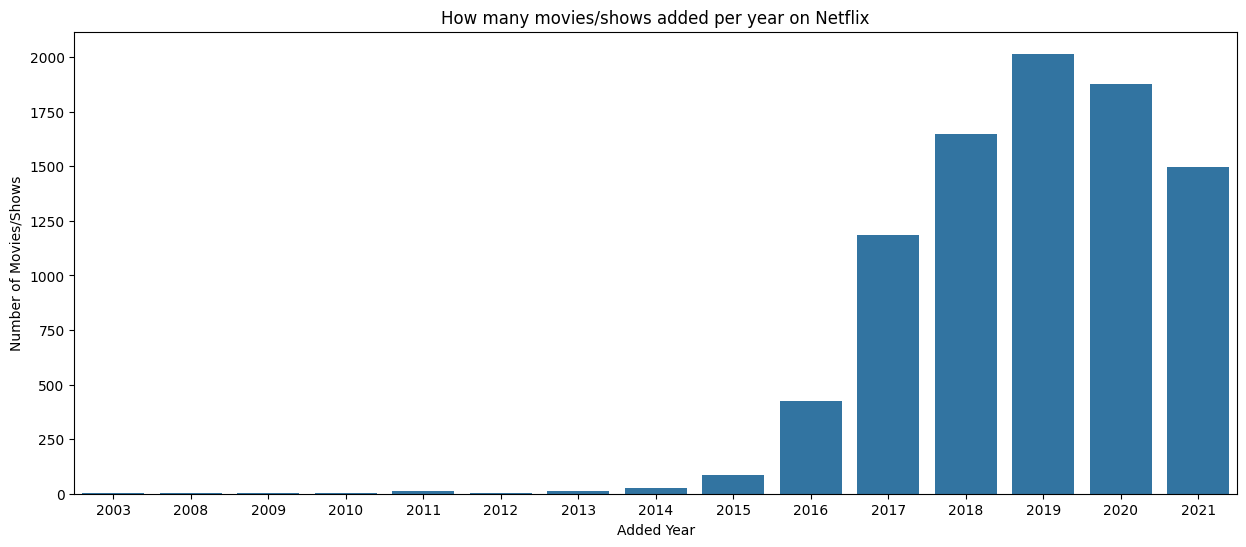

Top 5 most added years on Netflix are:
     year_added  count
12        2019   2016
13        2020   1879
11        2018   1649
14        2021   1498
10        2017   1185


In [41]:
added_year = df.groupby('year_added')['year_added'].count().reset_index(name='count').sort_values('count', ascending=False)


plt.figure(figsize=(15, 6))

sns.countplot(x= 'year_added', data=df)
plt.title('How many movies/shows added per year on Netflix')
plt.xlabel('Added Year')
plt.ylabel('Number of Movies/Shows')
plt.show()

print("Top 5 most added years on Netflix are:\n",added_year.head())

The year with highest of movies and shows added on Netflix is 2019.

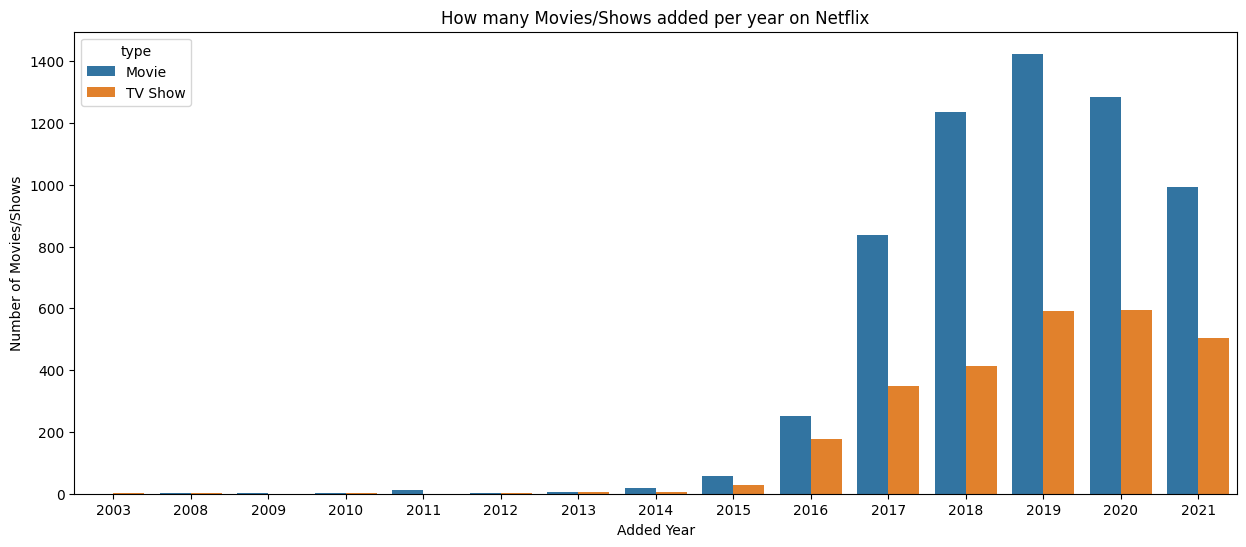

The Top 5 years with the highest number of Movies added are:
22    2019
24    2020
20    2018
26    2021
18    2017
Name: year_added, dtype: int32
The Top 5 years with the highest number of TV Shows added are:
23    2020
21    2019
25    2021
19    2018
17    2017
Name: year_added, dtype: int32


<ipython-input-42-32d6c5ced9da>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_movie_year = df[df['type'] == 'Movie'].groupby(['year_added','type'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False).iloc[0:5]['year_added']
<ipython-input-42-32d6c5ced9da>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_tv_show_year = df[df['type'] == 'TV Show'].groupby(['year_added','type'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False).iloc[0:5]['year_added']


In [42]:
plt.figure(figsize=(15, 6))

sns.countplot(x= 'year_added', data=df, hue = 'type')
plt.title('How many Movies/Shows added per year on Netflix')
plt.xlabel('Added Year')
plt.ylabel('Number of Movies/Shows')
plt.show()
# highest no of movies added on Netflix on the year 2019. from plot
# code to find highest no of TV show added on netflix
max_movie_year = df[df['type'] == 'Movie'].groupby(['year_added','type'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False).iloc[0:5]['year_added']
print(f"The Top 5 years with the highest number of Movies added are:\n{max_movie_year}")
max_tv_show_year = df[df['type'] == 'TV Show'].groupby(['year_added','type'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False).iloc[0:5]['year_added']
print(f"The Top 5 years with the highest number of TV Shows added are:\n{max_tv_show_year}") #2020

Calculating and Plotting how many Movies and Shows added per Month on Netflix.

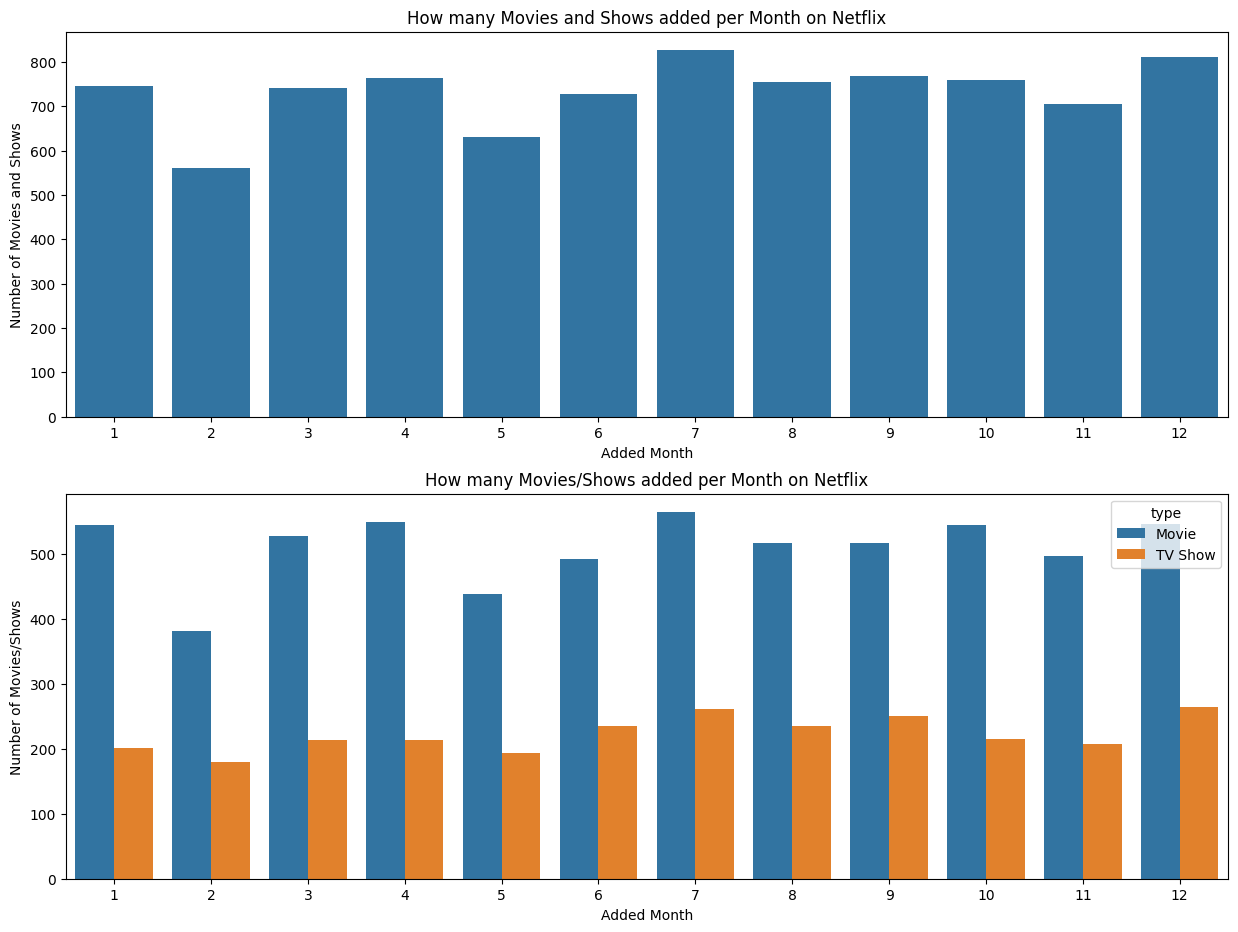

The year with the highest number of Movies added is: 7
The year with the highest number of TV Shows added is: 12


<ipython-input-43-beb645d07449>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_movie_month = df[df['type'] == 'Movie'].groupby(['month_added','type'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False).iloc[0]['month_added']
<ipython-input-43-beb645d07449>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_tv_show_month = df[df['type'] == 'TV Show'].groupby(['month_added','type'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False).iloc[0]['month_added']


In [43]:
plt.figure(figsize=(15, 11))  # Adjust figure size if needed

plt.subplot(2,1,1)
sns.countplot(x= 'month_added', data=df)
plt.title('How many Movies and Shows added per Month on Netflix')
plt.xlabel('Added Month')
plt.ylabel('Number of Movies and Shows')

plt.subplot(2,1,2)
sns.countplot(x= 'month_added', data=df, hue = 'type')
plt.title('How many Movies/Shows added per Month on Netflix')
plt.xlabel('Added Month')
plt.ylabel('Number of Movies/Shows')

plt.show()

max_movie_month = df[df['type'] == 'Movie'].groupby(['month_added','type'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False).iloc[0]['month_added']
print(f"The year with the highest number of Movies added is: {max_movie_month}") # July

max_tv_show_month = df[df['type'] == 'TV Show'].groupby(['month_added','type'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False).iloc[0]['month_added']
print(f"The year with the highest number of TV Shows added is: {max_tv_show_month}") # December

From the above cell.

The year with the highest number of Movies added is in the month: 7 or July

The year with the highest number of TV Shows added is in the month: 12 or December

Calculating and Plotting how many Movies and Shows added per Week on Netflix.

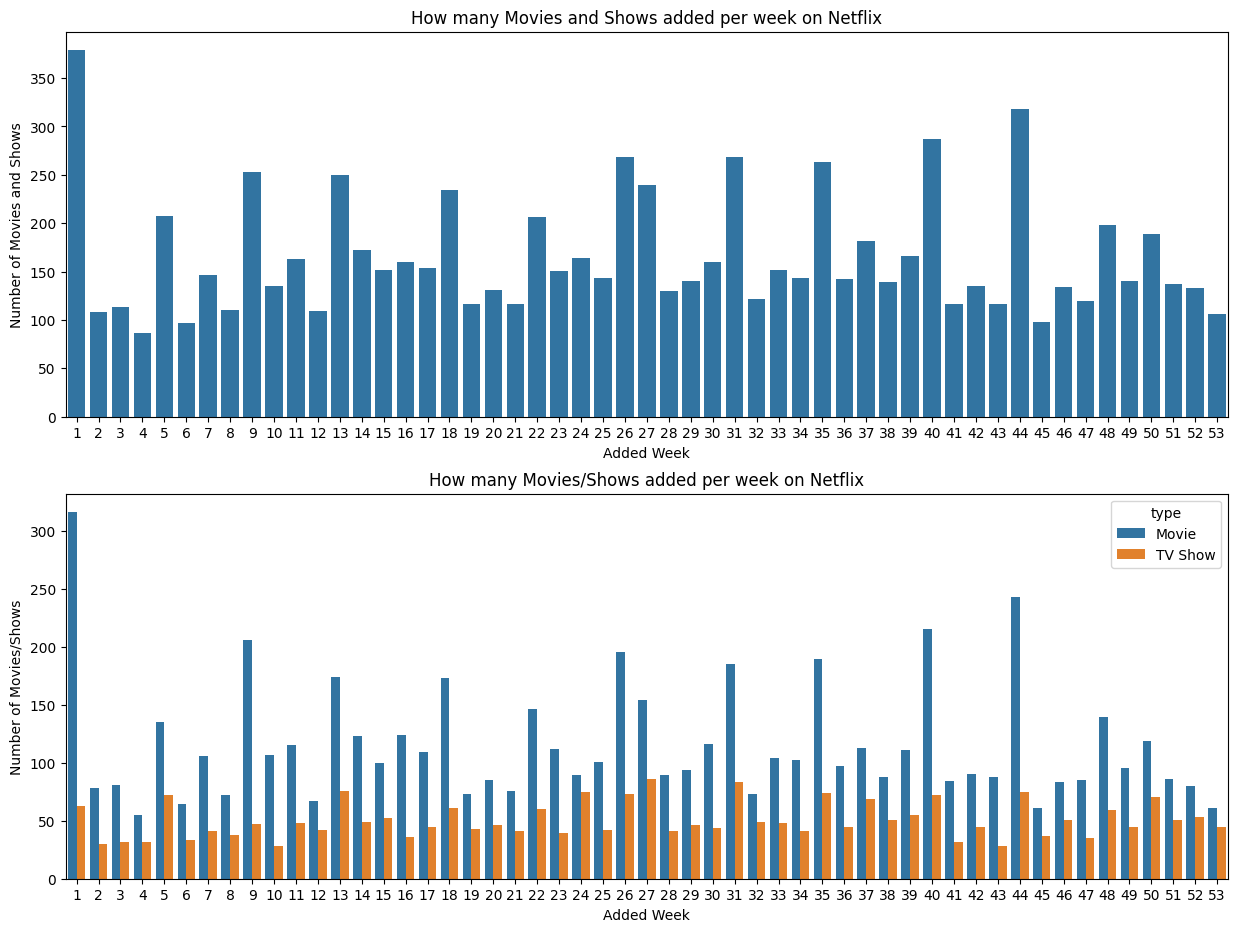

In [44]:
plt.figure(figsize=(15, 11))

plt.subplot(2,1,1)
sns.countplot(x= 'week_added', data=df)
plt.title('How many Movies and Shows added per week on Netflix')
plt.xlabel('Added Week')
plt.ylabel('Number of Movies and Shows')

plt.subplot(2,1,2)
sns.countplot(x= 'week_added', data=df, hue = 'type')
plt.title('How many Movies/Shows added per week on Netflix')
plt.xlabel('Added Week')
plt.ylabel('Number of Movies/Shows')

plt.show()

From the above cell, The highest number of movies and TV shows were released collectively during the first week of the year, indicating a potential craze for movies around New Year's.

Calculating Best quarter of the year for content addition on Netfilix.

0       3
1       3
2       3
3       3
4       3
       ..
8802    4
8803    3
8804    4
8805    1
8806    1
Name: quarter_added, Length: 8800, dtype: int32 

quarter_added
3    2350
4    2277
2    2123
1    2050
Name: count, dtype: int64 



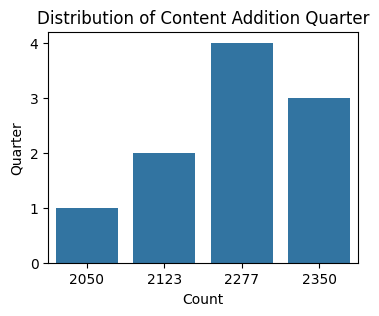


Best Quarter to release is: 3


In [45]:
# Best quarter of the year for content addition based on frequency of a quarter
df['quarter_added'] = df['date_added'].dt.quarter
print(df['quarter_added'],'\n')
quarter_counts  = df['quarter_added'].value_counts()
print(quarter_counts,'\n')

plt.figure(figsize=(4, 3))
sns.barplot(y= quarter_counts.index, x= quarter_counts.values)
plt.title("Distribution of Content Addition Quarter")
plt.ylabel("Quarter")
plt.xlabel("Count")
plt.show()

print('\nBest Quarter to release is:',quarter_counts.idxmax())

From the above cell, Best Quarter to add in Netflix is: 3rd quarter - July, August, September.

Creating a column for content addition delay in years.

In [46]:
# Average content addition delay in years, i.e. year_added- release_year
df['content_addition_year_delay'] = df['year_added'] - df['release_year']
df['content_addition_year_delay']

0        1
1        0
2        0
3        0
4        0
        ..
8802    12
8803     1
8804    10
8805    14
8806     4
Name: content_addition_year_delay, Length: 8800, dtype: int64

Calculating Content addition delay value counts.

In [47]:
# Content addition delay value counts of years
df['content_addition_year_delay'].value_counts()

content_addition_year_delay
 0     3249
 1     1584
 2      713
 3      489
 4      367
       ... 
-2        1
 93       1
 60       1
 70       1
 63       1
Name: count, Length: 75, dtype: int64

Plotting Distribution of Content Addition Delay

<Axes: title={'center': 'Distribution of Content Addition Delay'}, xlabel='content_addition_year_delay'>

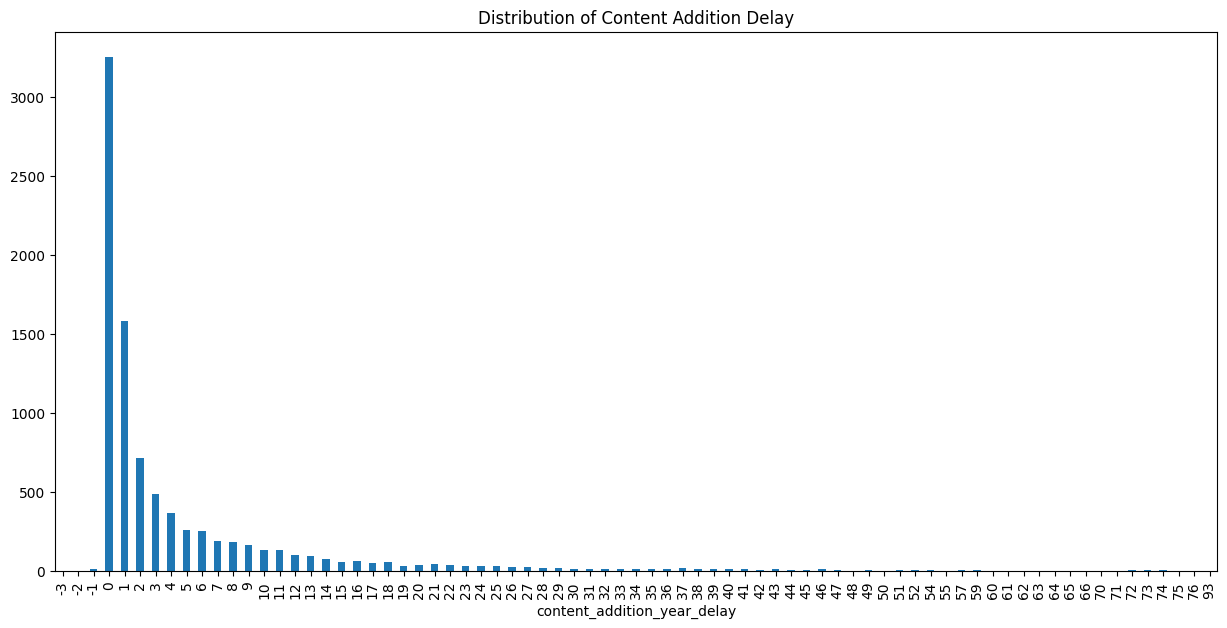

In [48]:
df['content_addition_year_delay'].value_counts().sort_index().plot(kind='bar', title="Distribution of Content Addition Delay", figsize=(15,7))

Caluclating the Mean/Median of content_addition_year_delay

In [49]:

mean_content_addition_delay = df['content_addition_year_delay'].mean()
median_content_addition_delay = df['content_addition_year_delay'].median()
print(f"Mean content addition delay: {mean_content_addition_delay} years or {int(mean_content_addition_delay)+1} years")
print(f"Median content addition delay: {median_content_addition_delay} years")

Mean content addition delay: 4.685113636363637 years or 5 years
Median content addition delay: 1.0 years


From the above cell

Mean content addition delay: 4.69 years or 5 years

Median content addition delay: 1.0 years

Plotting Boxplot of Duration Column

<Axes: xlabel='rating', ylabel='duration'>

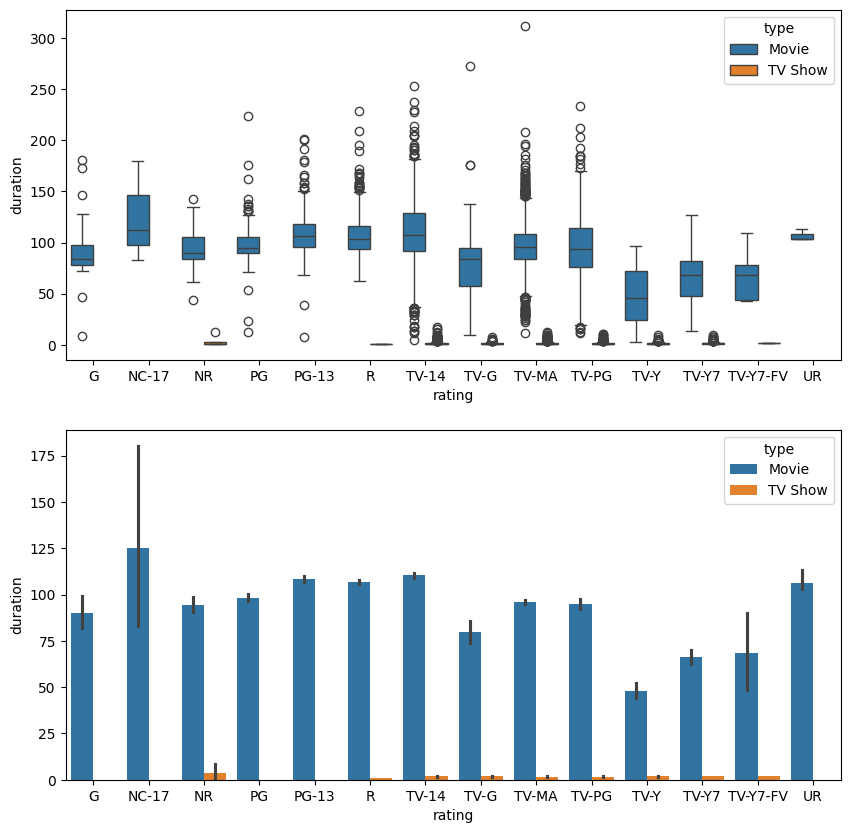

In [50]:
plt.figure(figsize=(10, 10))

plt.subplot(2,1,1)
sns.boxplot(y='duration', x = 'rating', hue = 'type', data =df)

plt.subplot(2,1,2)
sns.barplot(y='duration', x = 'rating', hue = 'type', data =df)

Duration of TV Shows are low because they are in units of seasons not minutes

Plotting Correlation Heat map for dataset df.

                             release_year  duration  year_added  month_added  \
release_year                     1.000000 -0.249245    0.113298    -0.038352   
duration                        -0.249245  1.000000    0.035187    -0.014893   
year_added                       0.113298  0.035187    1.000000    -0.148636   
month_added                     -0.038352 -0.014893   -0.148636     1.000000   
quarter_added                   -0.043020 -0.008878   -0.146150     0.970027   
content_addition_year_delay     -0.983454  0.256685    0.068569     0.011408   

                             quarter_added  content_addition_year_delay  
release_year                     -0.043020                    -0.983454  
duration                         -0.008878                     0.256685  
year_added                       -0.146150                     0.068569  
month_added                       0.970027                     0.011408  
quarter_added                     1.000000                     0.0165

<Axes: >

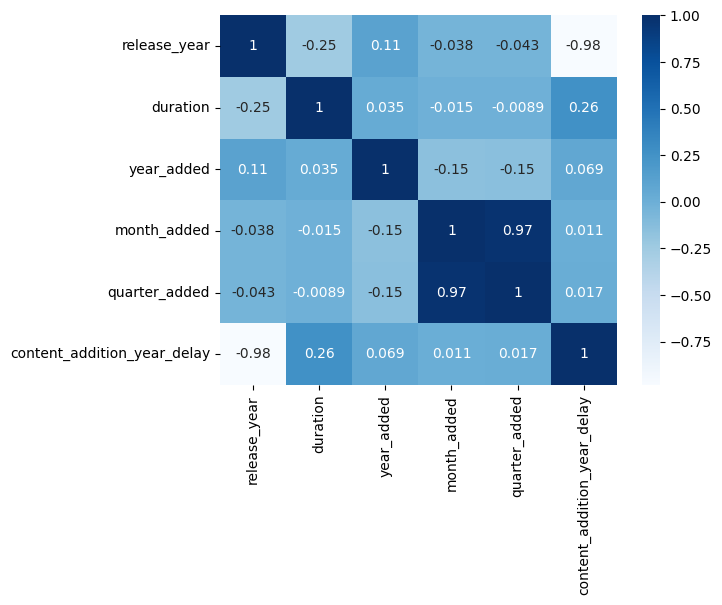

In [51]:
# Plot Correlation Heat map for dataset df.
num_df = df.select_dtypes(include=[float,int])
print(num_df.corr())
sns.heatmap(num_df.corr(), cmap='Blues',annot = True)

From the above cell only quarter_added and month_added are strongly correlated rest all are weakly correlated.

In [52]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating  duration  \
0 2021-09-25          2020  PG-13        90   
1 2021-09-24          2021  TV-MA         2   
2 2021-09-24          2021  TV-MA         1   
3 2021-09-24          2021  TV-MA         1   
4 2021-09-24          2021  TV-MA         2   

                                           listed_in  year_added  month_added  \
0                                      Documentaries        2021            9   
1    International TV Shows, TV Dramas, TV Mysteries        2021            9   
2  Crime TV Shows, International TV Shows, TV Act...        2021            9   
3                             Docuseries, Reality TV        2021            9   
4  International TV Shows, Romantic TV Shows, TV ...        2021            9   

   week_added  quarter_added  content_addition_year_delay  
0          38              3                            1  
1          38              3                            0  
2          38              3                            0  
3          38              3                            0  
4          38              3                            0

Now we will Split and Explode on columns like country, listed_in, cast, director into different datasets.

In [53]:
df_listed_in = df.copy()
df_country = df.copy()
df_director = df.copy()
df_cast = df.copy()

Split and analyze listed_in for genre analysis.

In [54]:
df_listed_in['listed_in'] = df_listed_in['listed_in'].str.split(', ')
df_listed_in = df_listed_in.explode('listed_in')
df_listed_in.head()

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water          Unknown   
1      s2  TV Show         Blood & Water          Unknown   
1      s2  TV Show         Blood & Water          Unknown   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   

  date_added  release_year rating  duration               listed_in  \
0 2021-09-25          2020  PG-13        90           Documentaries   
1 2021-09-24          2021  TV-MA         2  International TV Shows   
1 2021-09-24          2021  TV-MA         2               TV Dramas   
1 2021-09-24          2021  TV-MA         2            TV Mysteries   
2 2021-09-24          2021  TV-MA         1          Crime TV Shows   

   year_added  month_added  week_added  quarter_added  \
0        2021            9          38              3   
1        2021            9          38              3   
1        2021            9          38              3   
1        2021            9          38              3   
2        2021            9          38              3   

   content_addition_year_delay  
0                            1  
1                            0  
1                            0  
1                            0  
2                            0

Calculating Frequency of Genres and Plotting them

listed_in
International Movies            2752
Dramas                          2426
Comedies                        1674
International TV Shows          1350
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      580
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         450
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     175
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows             

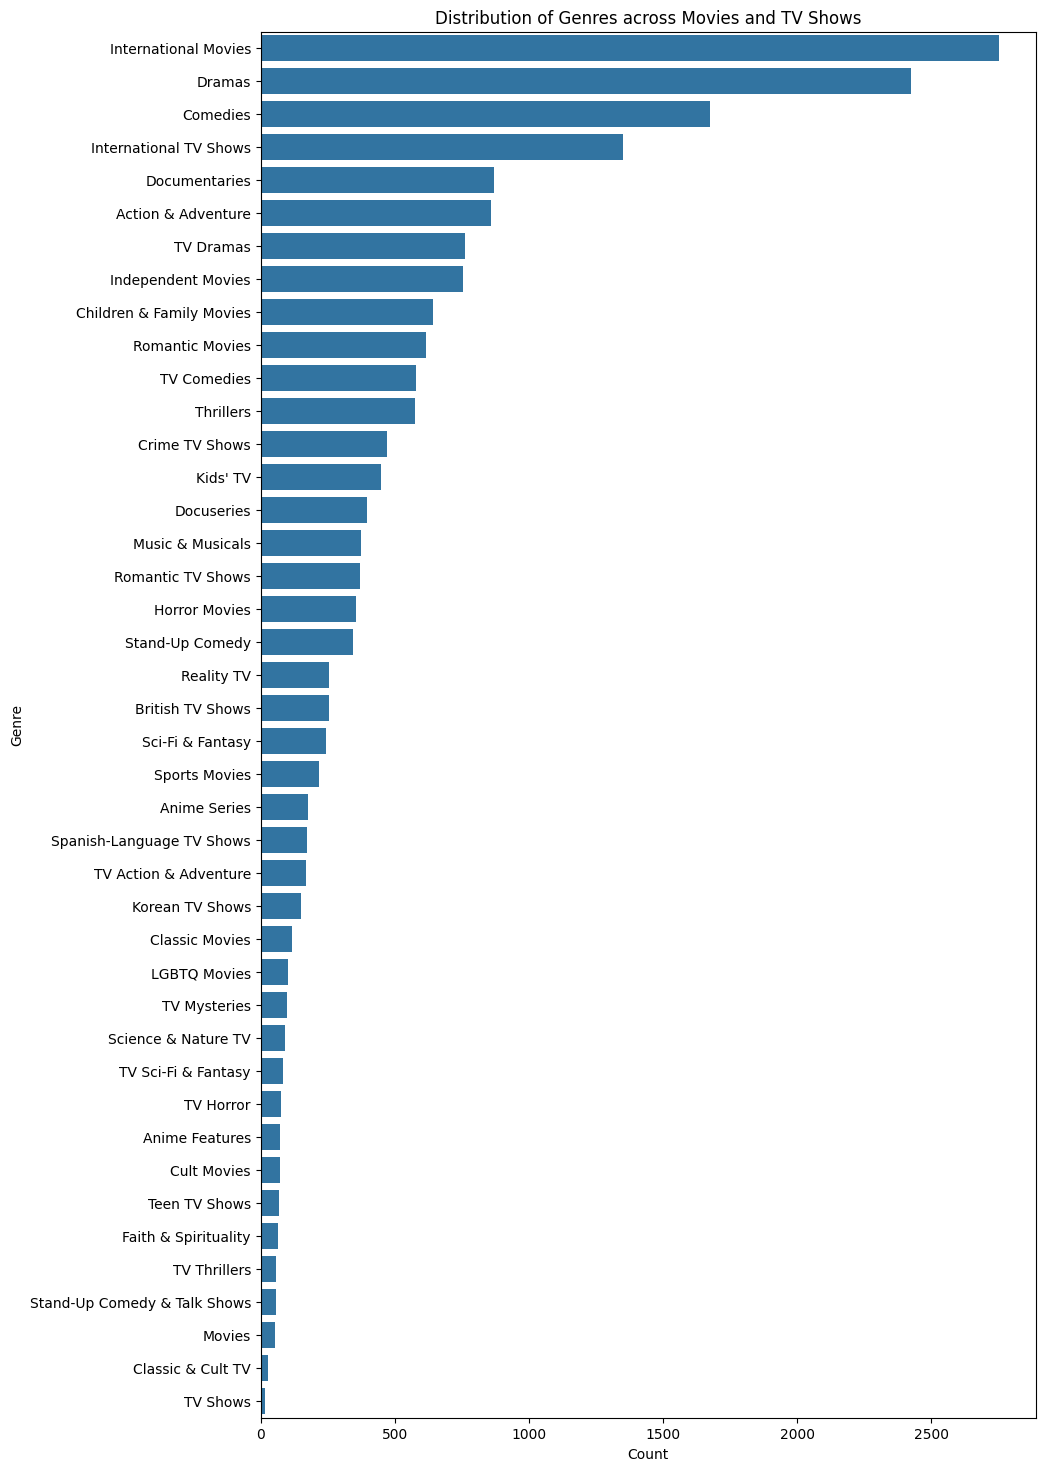

Top 10 Genres are: listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Popular Genres'}, xlabel='listed_in'>

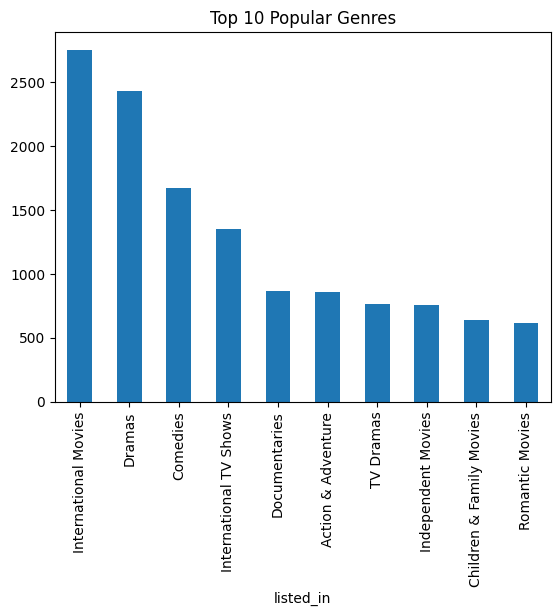

In [55]:
genre_counts = df_listed_in['listed_in'].value_counts()
print(genre_counts)

plt.figure(figsize=(10, 18))
sns.barplot(y= genre_counts.index, x= genre_counts.values)
plt.title("Distribution of Genres across Movies and TV Shows")
plt.ylabel("Genre")
plt.xlabel("Count")
plt.show()

# Top 5 Genres
top_10_genres = genre_counts.head(10)
print('Top 10 Genres are:',top_10_genres)
top_10_genres.plot(kind='bar', title="Top 10 Popular Genres")

for the above cell, in Movies and Shows, International Movies, Dramas,Comedies, International TV Shows, Documentaries are the Top5 Genres     

Plotting to find relation between rating and listed_in columns.

<ipython-input-56-a1ccd671bf90>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_listed_in_rating = df_listed_in.groupby(['rating', 'listed_in'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)



Rating and Genre Counts
    rating               listed_in  count
352  TV-MA    International Movies   1130
268  TV-14    International Movies   1065
348  TV-MA                  Dramas    830
353  TV-MA  International TV Shows    714
264  TV-14                  Dramas    693
..     ...                     ...    ...
164     PG                TV Shows      0
163     PG     TV Sci-Fi & Fantasy      0
162     PG            TV Mysteries      0
161     PG               TV Horror      0
587     UR               Thrillers      0

[588 rows x 3 columns]


Text(0, 0.5, 'Rating Count')

<Figure size 1500x600 with 0 Axes>

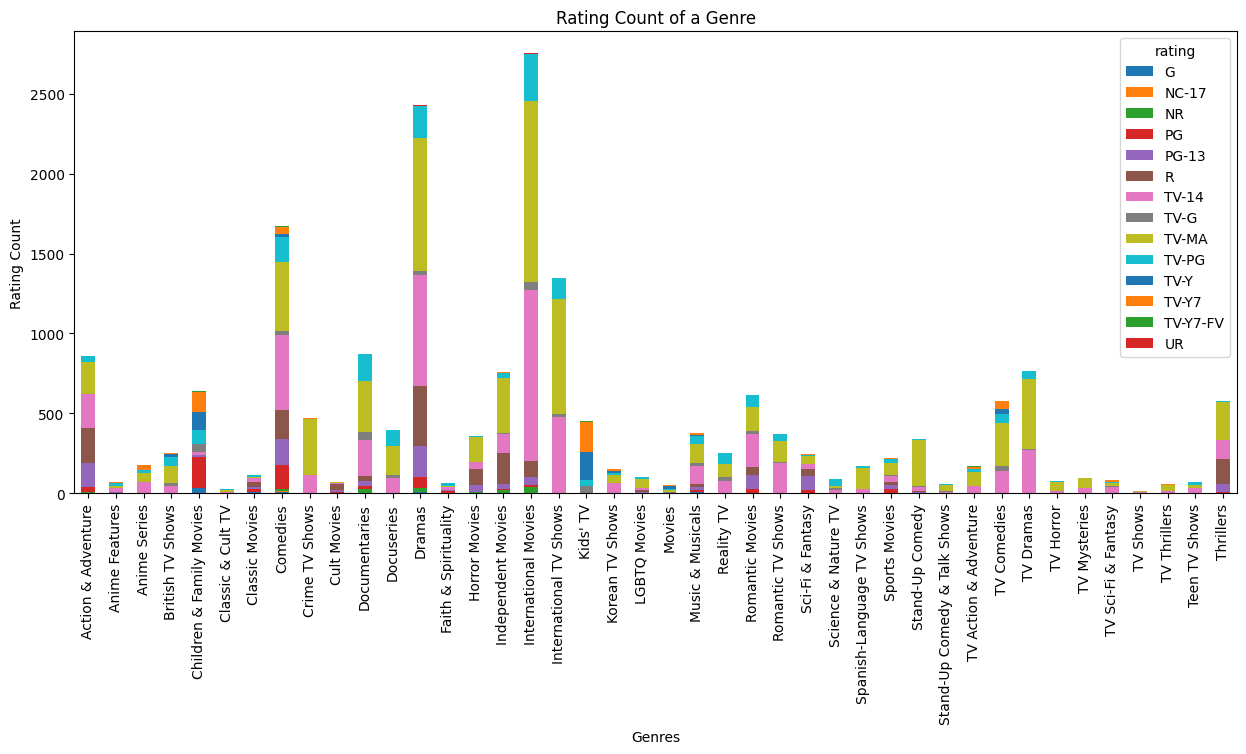

In [56]:
df_listed_in_rating = df_listed_in.groupby(['rating', 'listed_in'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)
print("\nRating and Genre Counts")
print(df_listed_in_rating)

plt.figure(figsize=(15, 6))
df_stacked_plot = pd.crosstab(index=df_listed_in['listed_in'], columns=df_listed_in['rating'])
df_stacked_plot.plot(kind='bar', stacked=True, figsize=(15, 6))

plt.title('Rating Count of a Genre')
plt.xlabel('Genres')
plt.ylabel('Rating Count')

From the above cell, TV-MA, TV-14 are the top2 Ratings and International Movies, Dramas are the top2 Genres.

Plotting for relation between release_year and listed_in

      release_year              listed_in  count
1049          2018   International Movies    340
1007          2017   International Movies    328
967           2016   International Movies    305
1045          2018                 Dramas    304
1003          2017                 Dramas    285
...            ...                    ...    ...
336           1992       Sci-Fi & Fantasy      1
801           2011          Teen TV Shows      1
799           2011              TV Horror      1
796           2011  TV Action & Adventure      1
0             1925               TV Shows      1

[1192 rows x 3 columns]


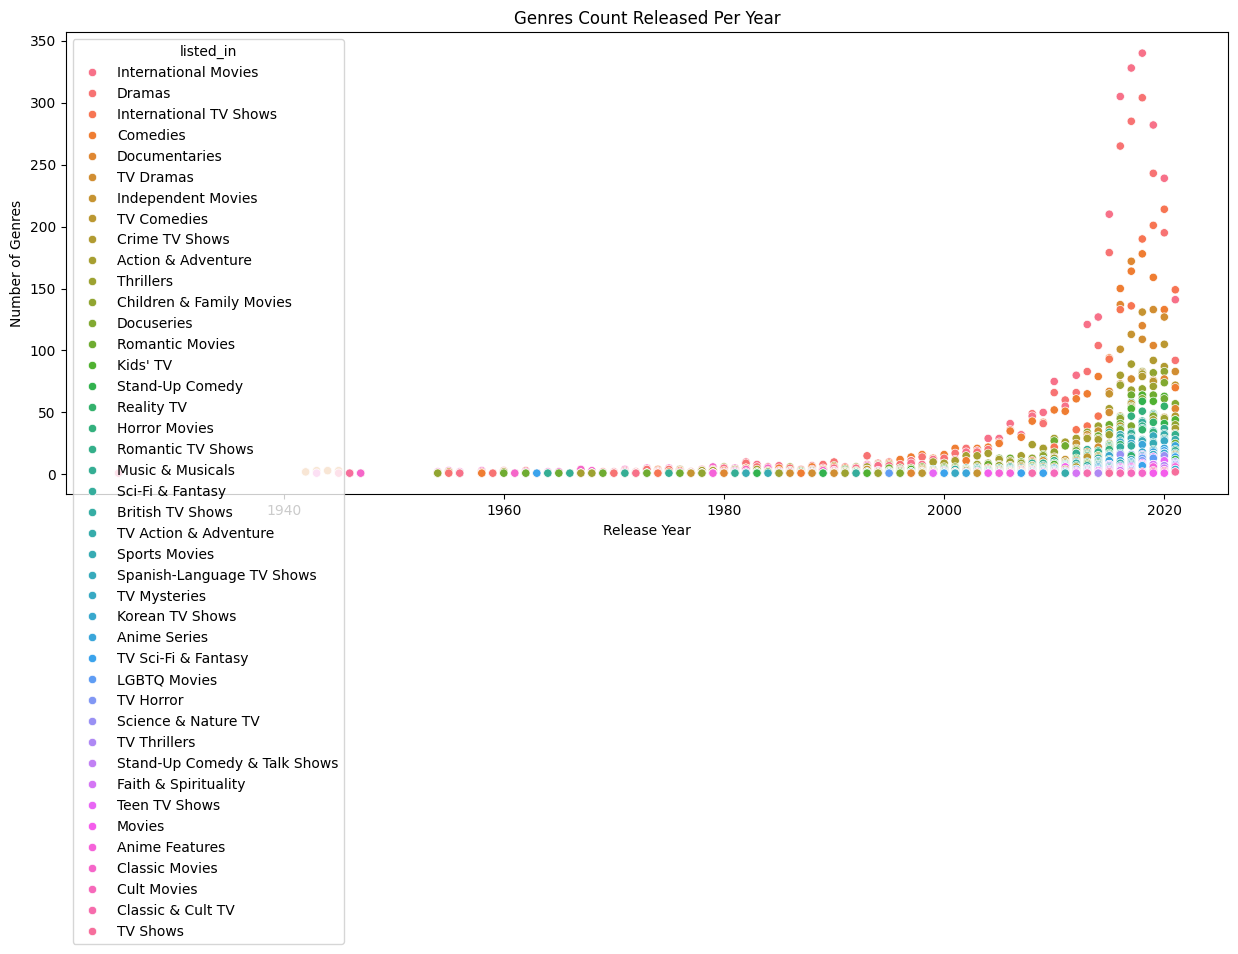

In [57]:
# plotting for relation between release_year and listed_in
df_listed_in_release_year = df_listed_in.groupby(['release_year', 'listed_in'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)
print(df_listed_in_release_year)

plt.figure(figsize=(15, 6))

sns.scatterplot(x= 'release_year', y='count', data=df_listed_in_release_year, hue = 'listed_in')
plt.title('Genres Count Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Genres')
plt.show()

From the above cell, the top Genre released in the year 2018 is International Movies and then Dramas.

As the year increases released movies increases, exponentially after the year 2000.

Plotting Below is plotted on lesser datapoints than above for a sparser plot.

      release_year              listed_in  count
1049          2018   International Movies    340
1007          2017   International Movies    328
967           2016   International Movies    305
1045          2018                 Dramas    304
1003          2017                 Dramas    285
...            ...                    ...    ...
855           2013        Korean TV Shows      5
947           2015    TV Sci-Fi & Fantasy      5
583           2005          Documentaries      5
692           2008       Sci-Fi & Fantasy      5
698           2008  TV Action & Adventure      5

[500 rows x 3 columns]


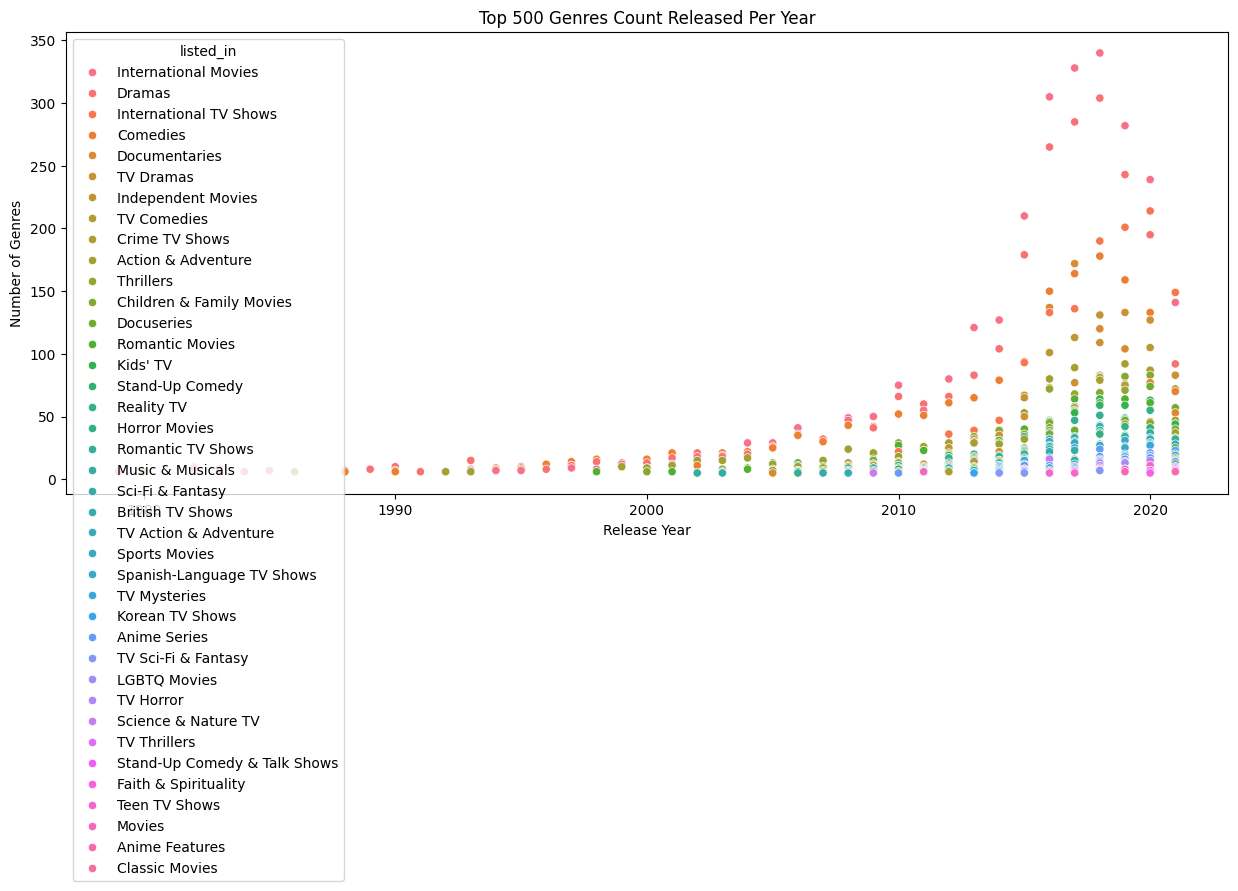

In [58]:
# plotting for relation between release_year and listed_in
df_listed_in_release_year = df_listed_in.groupby(['release_year', 'listed_in'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False).head(500)
print(df_listed_in_release_year)

plt.figure(figsize=(15, 6))

sns.scatterplot(x= 'release_year', y='count', data=df_listed_in_release_year, hue = 'listed_in')
plt.title('Top 500 Genres Count Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Genres')
plt.show()

Plotting for relation between year_added and listed_in

     year_added                     listed_in  count
189        2018          International Movies    668
231        2019          International Movies    610
273        2020          International Movies    575
227        2019                        Dramas    564
269        2020                        Dramas    535
..          ...                           ...    ...
36         2013  Stand-Up Comedy & Talk Shows      1
34         2013                 Sports Movies      1
33         2013              Music & Musicals      1
73         2015                        Movies      1
220        2019             Classic & Cult TV      1

[341 rows x 3 columns]


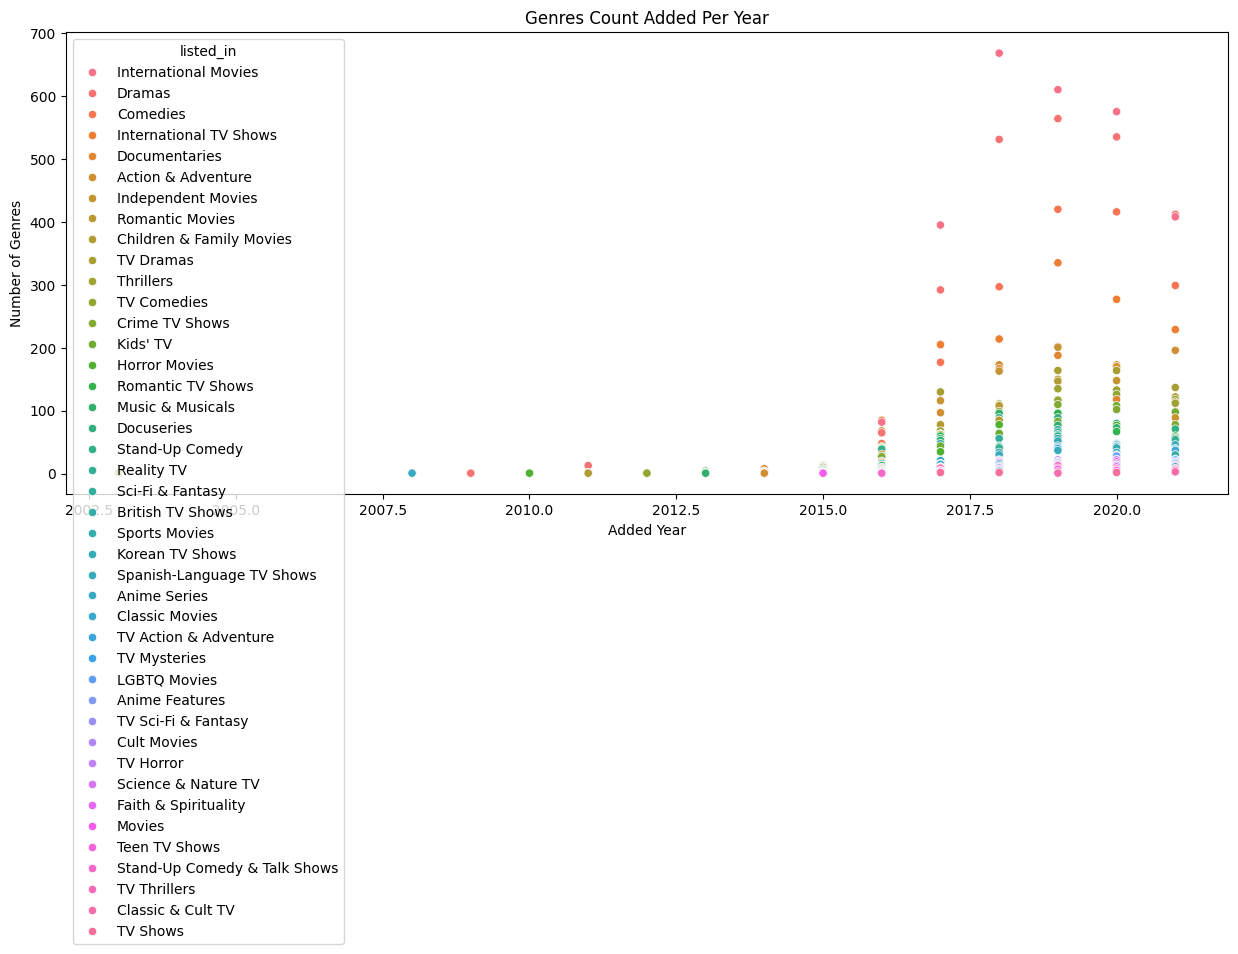

In [59]:
df_listed_in_year_added = df_listed_in.groupby(['year_added', 'listed_in'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)
print(df_listed_in_year_added)

plt.figure(figsize=(15, 6))

sns.scatterplot(x= 'year_added', y='count', data=df_listed_in_year_added, hue = 'listed_in')
plt.title('Genres Count Added Per Year')
plt.xlabel('Added Year')
plt.ylabel('Number of Genres')
plt.show()

From the above cell, the top Genre added in the year 2018, 2019 & 2020 is International Movies and then Dramas.

As the year increases released movies increases, exponentially after the year 2000 to 2018 an then drops gradually.

Plotting Below is plotted on lesser datapoints than above for a sparser plot.

     year_added             listed_in  count
189        2018  International Movies    668
231        2019  International Movies    610
273        2020  International Movies    575
227        2019                Dramas    564
269        2020                Dramas    535
..          ...                   ...    ...
244        2019         Sports Movies     56
142        2017            Docuseries     56
199        2018      Sci-Fi & Fantasy     56
321        2021      Music & Musicals     56
322        2021            Reality TV     54

[100 rows x 3 columns]


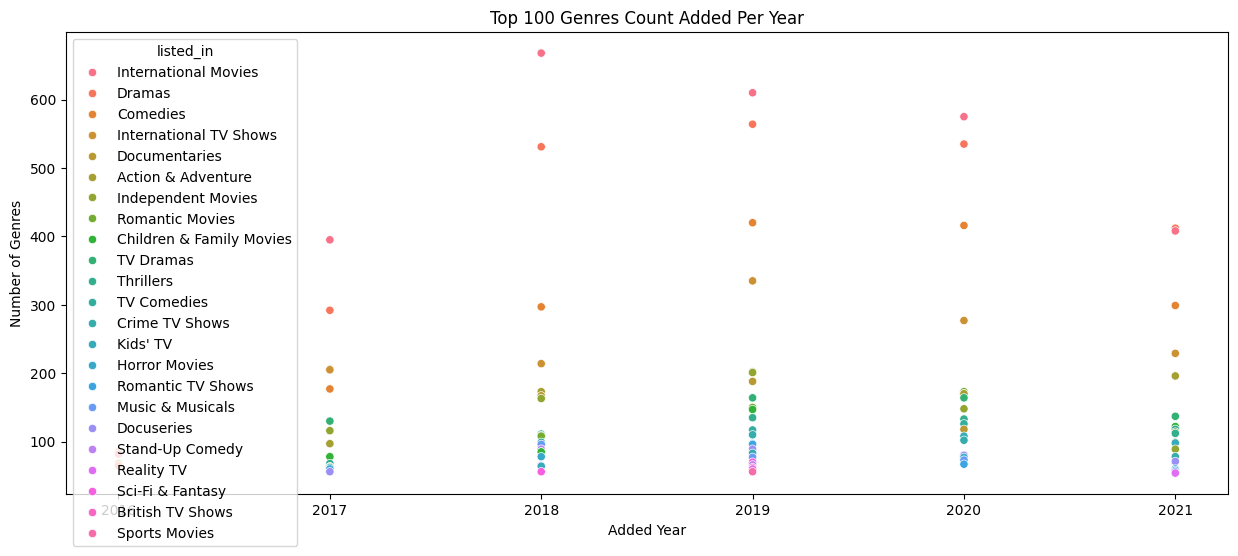

In [60]:
# plotting for relation between year_added and listed_in
df_listed_in_year_added = df_listed_in.groupby(['year_added', 'listed_in'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False).head(100)
print(df_listed_in_year_added)

plt.figure(figsize=(15, 6))

sns.scatterplot(x= 'year_added', y='count', data=df_listed_in_year_added, hue = 'listed_in')
plt.title('Top 100 Genres Count Added Per Year')
plt.xlabel('Added Year')
plt.ylabel('Number of Genres')
plt.show()

Split and analyze country for region analysis.

In [61]:
df_country['country'] = df_country['country'].str.split(', ')
df_country = df_country.explode('country')
df_country.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating  duration  \
0 2021-09-25          2020  PG-13        90   
1 2021-09-24          2021  TV-MA         2   
2 2021-09-24          2021  TV-MA         1   
3 2021-09-24          2021  TV-MA         1   
4 2021-09-24          2021  TV-MA         2   

                                           listed_in  year_added  month_added  \
0                                      Documentaries        2021            9   
1    International TV Shows, TV Dramas, TV Mysteries        2021            9   
2  Crime TV Shows, International TV Shows, TV Act...        2021            9   
3                             Docuseries, Reality TV        2021            9   
4  International TV Shows, Romantic TV Shows, TV ...        2021            9   

   week_added  quarter_added  content_addition_year_delay  
0          38              3                            1  
1          38              3                            0  
2          38              3                            0  
3          38              3                            0  
4          38              3                            0

Calculating frequency of Countries and Plotting them

country
United States     3686
India             1046
Unknown            830
United Kingdom     804
Canada             445
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Name: count, Length: 128, dtype: int64


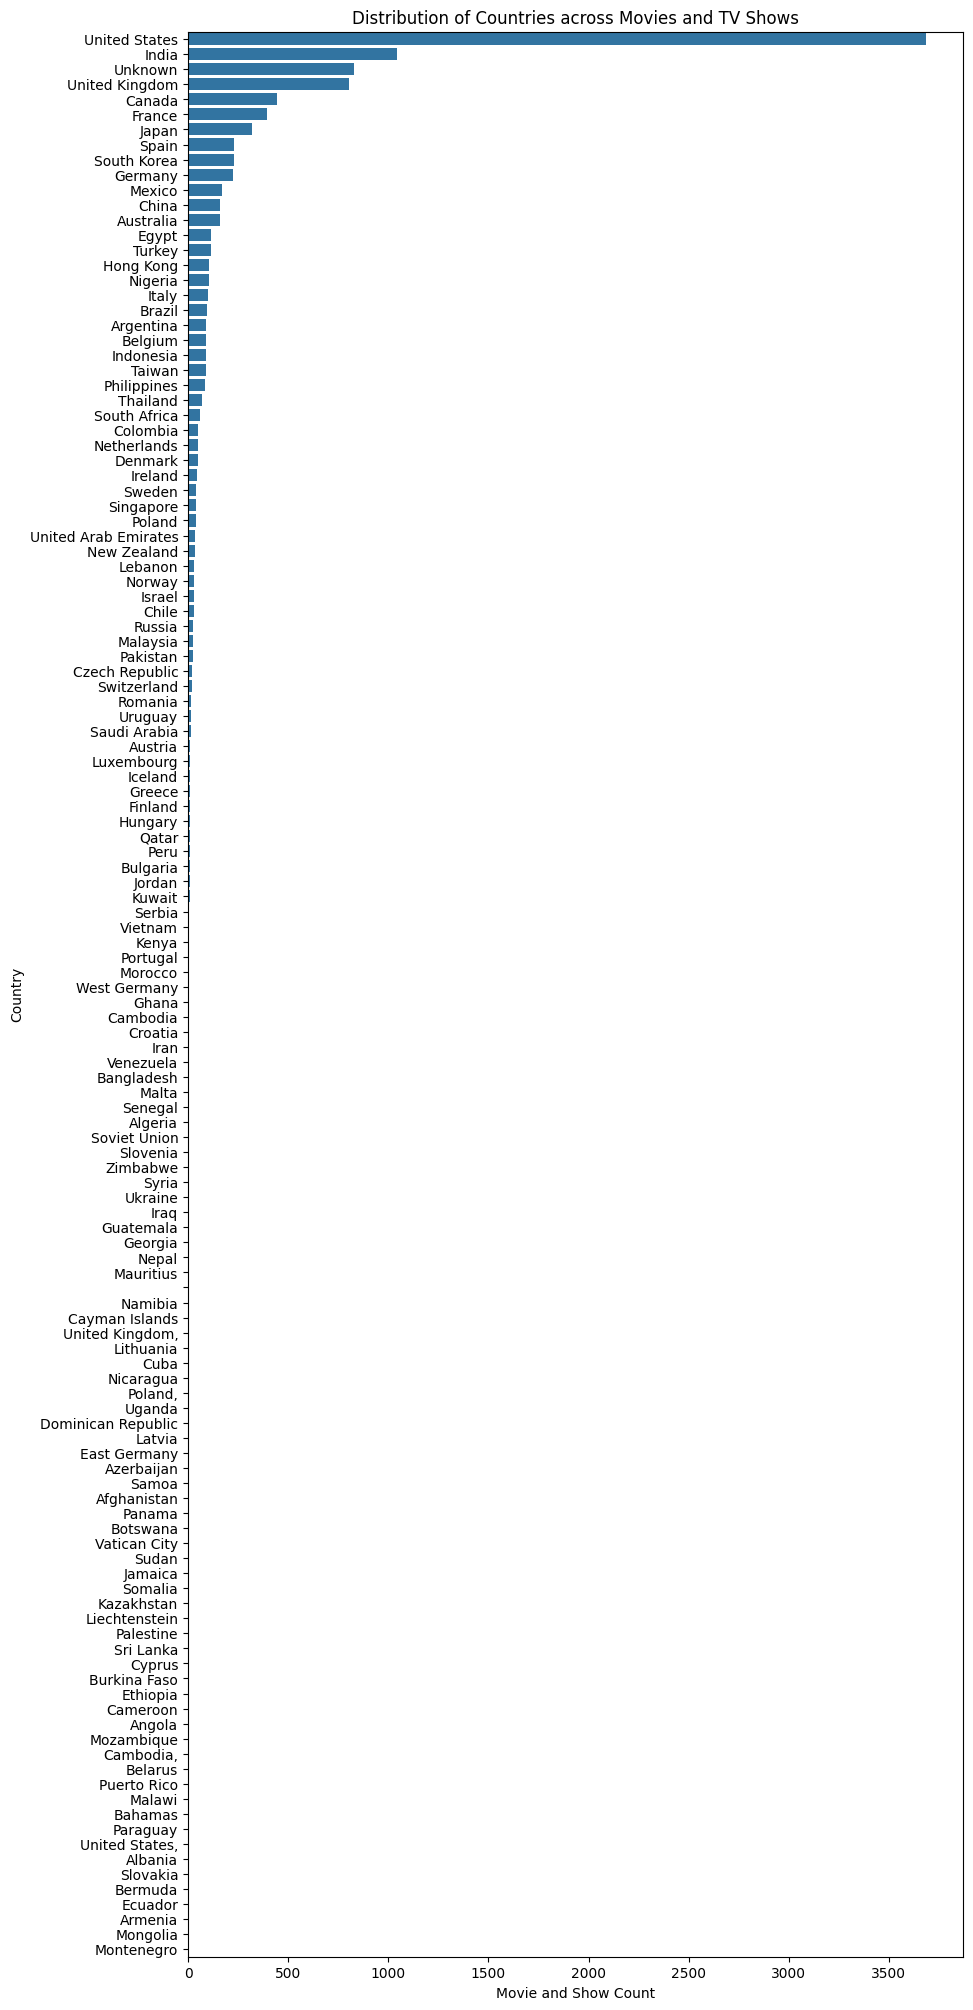

In [62]:
country_counts = df_country['country'].value_counts()
print(country_counts)

plt.figure(figsize=(10, 25))
sns.barplot(y= country_counts.index, x= country_counts.values)
plt.title("Distribution of Countries across Movies and TV Shows")
plt.ylabel("Country")
plt.xlabel("Movie and Show Count")
plt.show()

Top 10 Countries

Top 10 Countries are: country
United States     3686
India             1046
Unknown            830
United Kingdom     804
Canada             445
France             393
Japan              317
Spain              232
South Korea        231
Germany            226
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Content-Producing Countries'}, xlabel='country'>

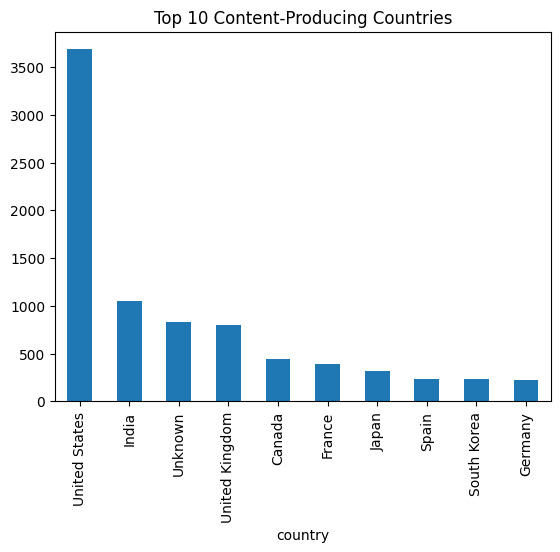

In [63]:
top_10_countries = country_counts.head(10)
print('Top 10 Countries are:',top_10_countries)

top_10_countries.plot(kind='bar', title="Top 10 Content-Producing Countries")

From the above cell Top 10 Movie and TV show producing countries are United States, India, United Kingdom, Canada, France, Japan, Spain, South Korea, Germany      

Plotting for relation between rating and countriy

---



<ipython-input-64-723ca565c201>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_country_rating = df_country.groupby(['rating', 'country'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)


     rating        country  count
1143  TV-MA  United States   1100
759       R  United States    660
815   TV-14          India    572
887   TV-14  United States    497
631   PG-13  United States    433
...     ...            ...    ...
608   PG-13        Senegal      0
607   PG-13   Saudi Arabia      0
606   PG-13          Samoa      0
602   PG-13    Puerto Rico      0
1791     UR       Zimbabwe      0

[1792 rows x 3 columns]


Text(0, 0.5, 'Number of Ratings')

<Figure size 2500x600 with 0 Axes>

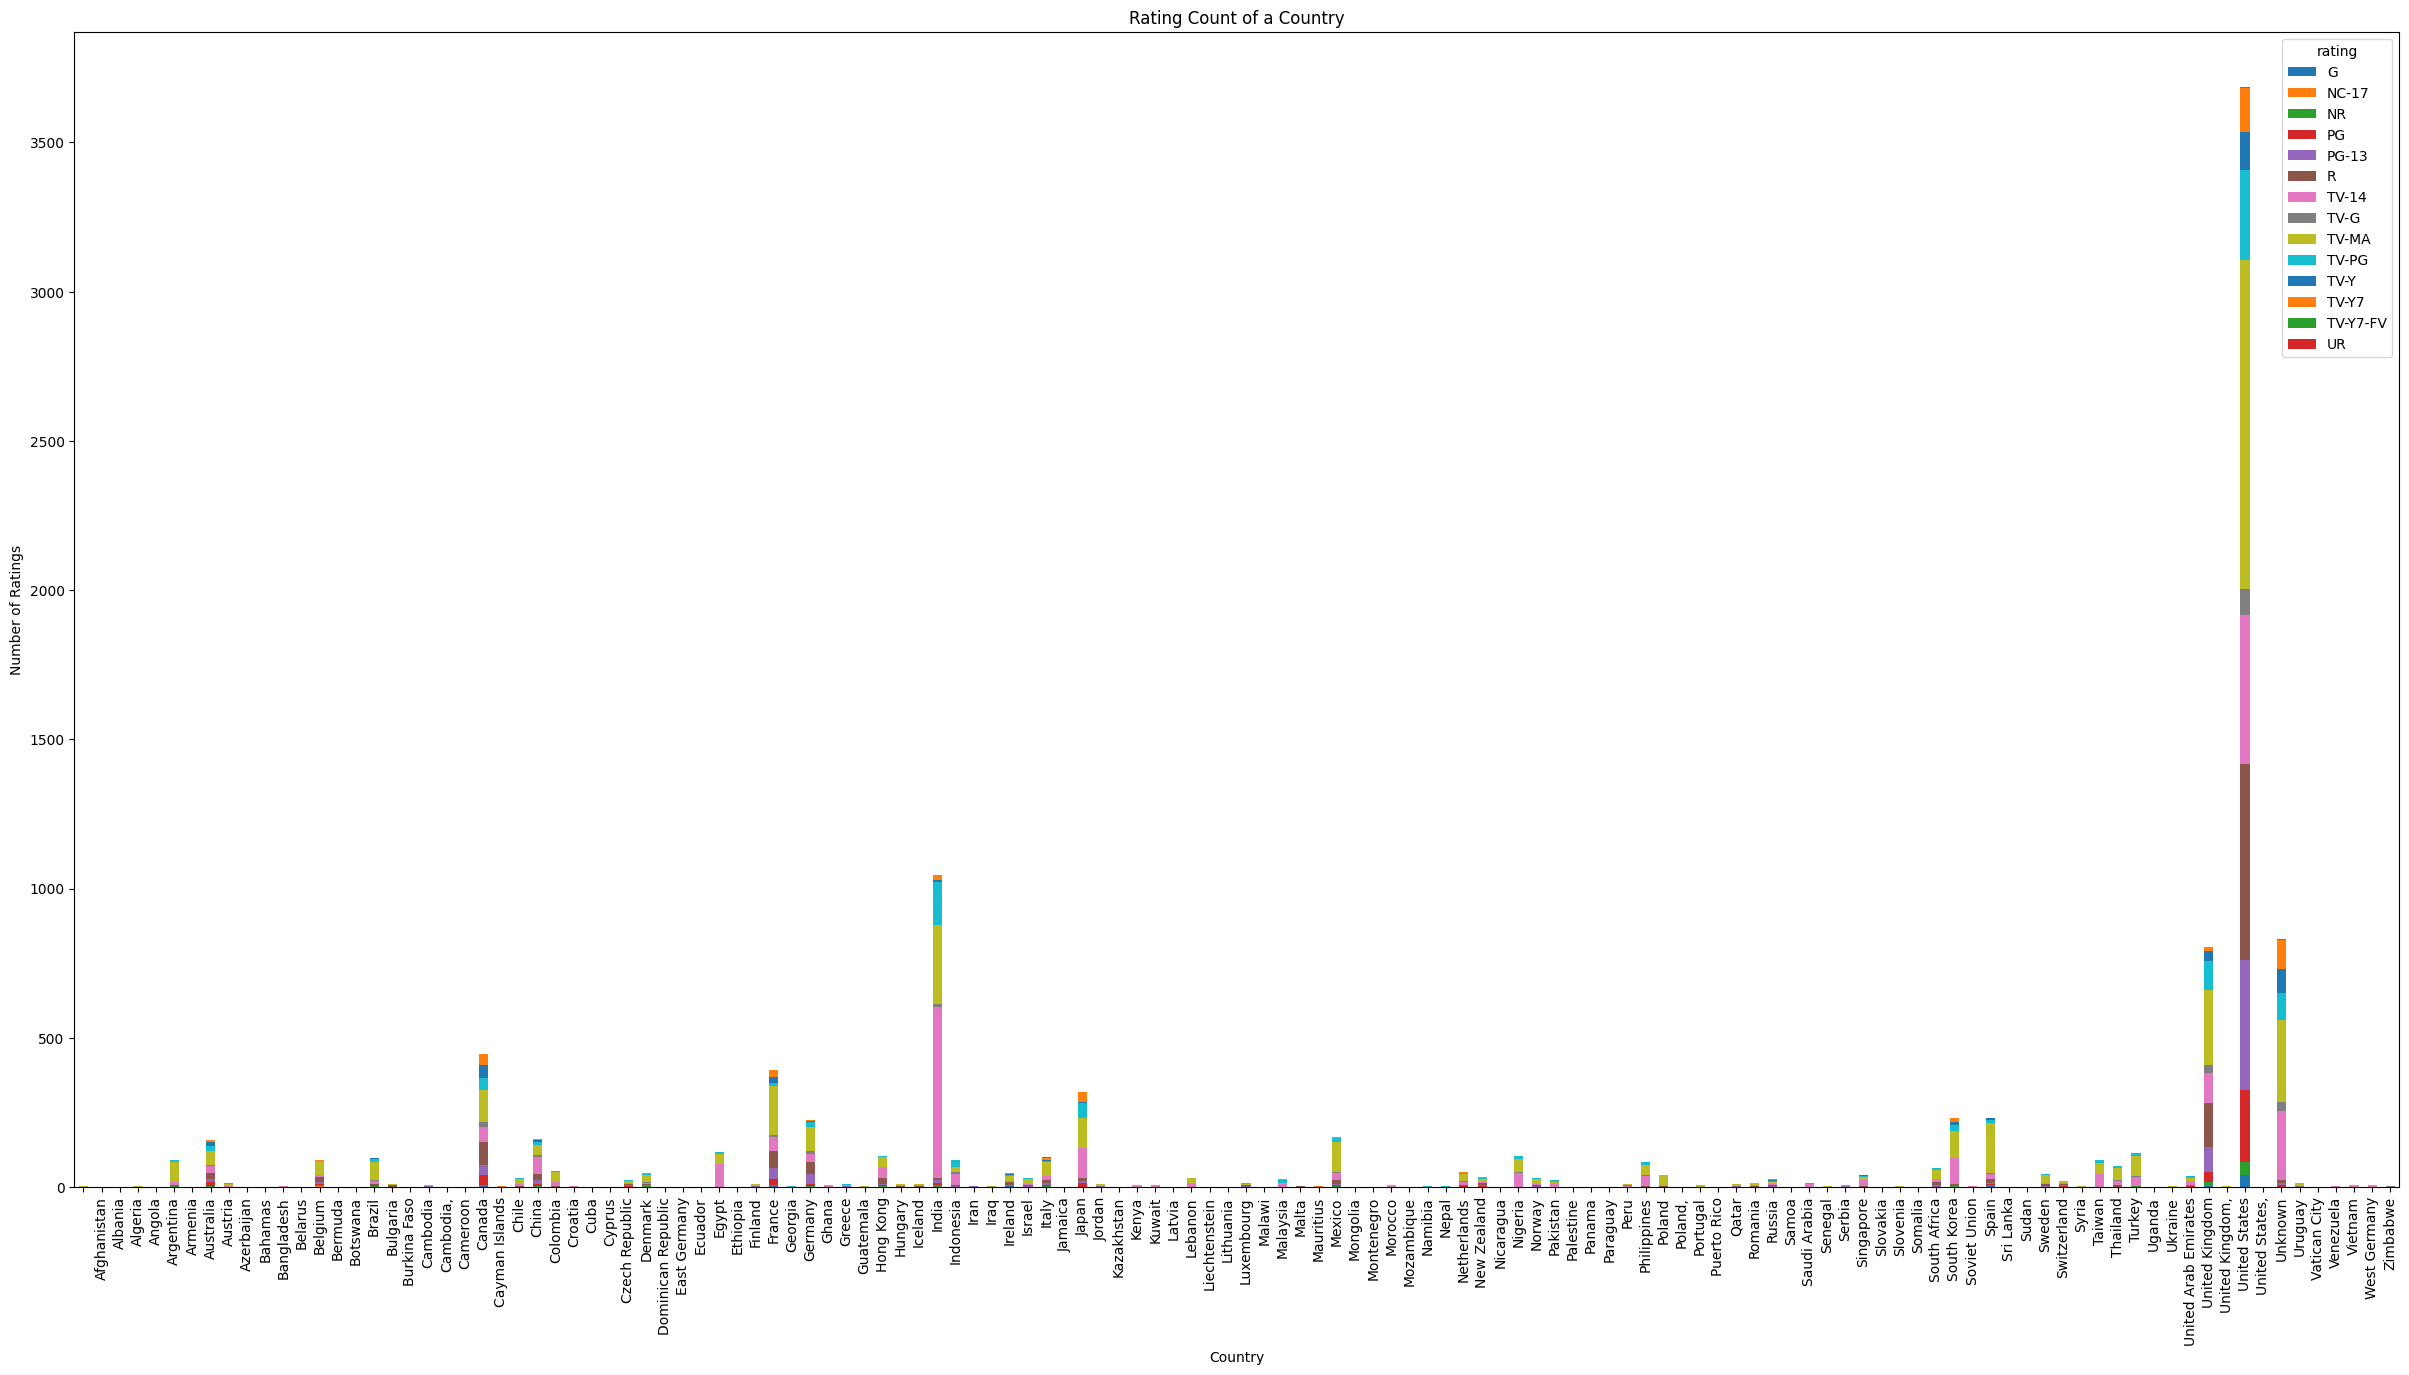

In [64]:
df_country_rating = df_country.groupby(['rating', 'country'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)
print(df_country_rating)

plt.figure(figsize=(25, 6))
df_stacked_plot = pd.crosstab(index=df_country['country'], columns=df_country['rating'])
df_stacked_plot.plot(kind='bar', stacked=True, figsize=(30, 15))

plt.title('Rating Count of a Country')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Number of Ratings')

From the above cell, Top 3 ratings are TV-MA, R, TV-14, with ctop countires as USA and India

Plotting Below is plotted on lesser datapoints than above for a sparser plot.

<ipython-input-65-38150e652dcb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_country_rating = df_country.groupby(['rating', 'country'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False).head(100)


     rating        country  count
1143  TV-MA  United States   1100
759       R  United States    660
815   TV-14          India    572
887   TV-14  United States    497
631   PG-13  United States    433
...     ...            ...    ...
653       R        Belgium     17
918    TV-G         Canada     17
1455  TV-Y7          India     17
1075  TV-MA        Ireland     17
1104  TV-MA         Norway     17

[100 rows x 3 columns]


Text(0, 0.5, 'Number of Ratings')

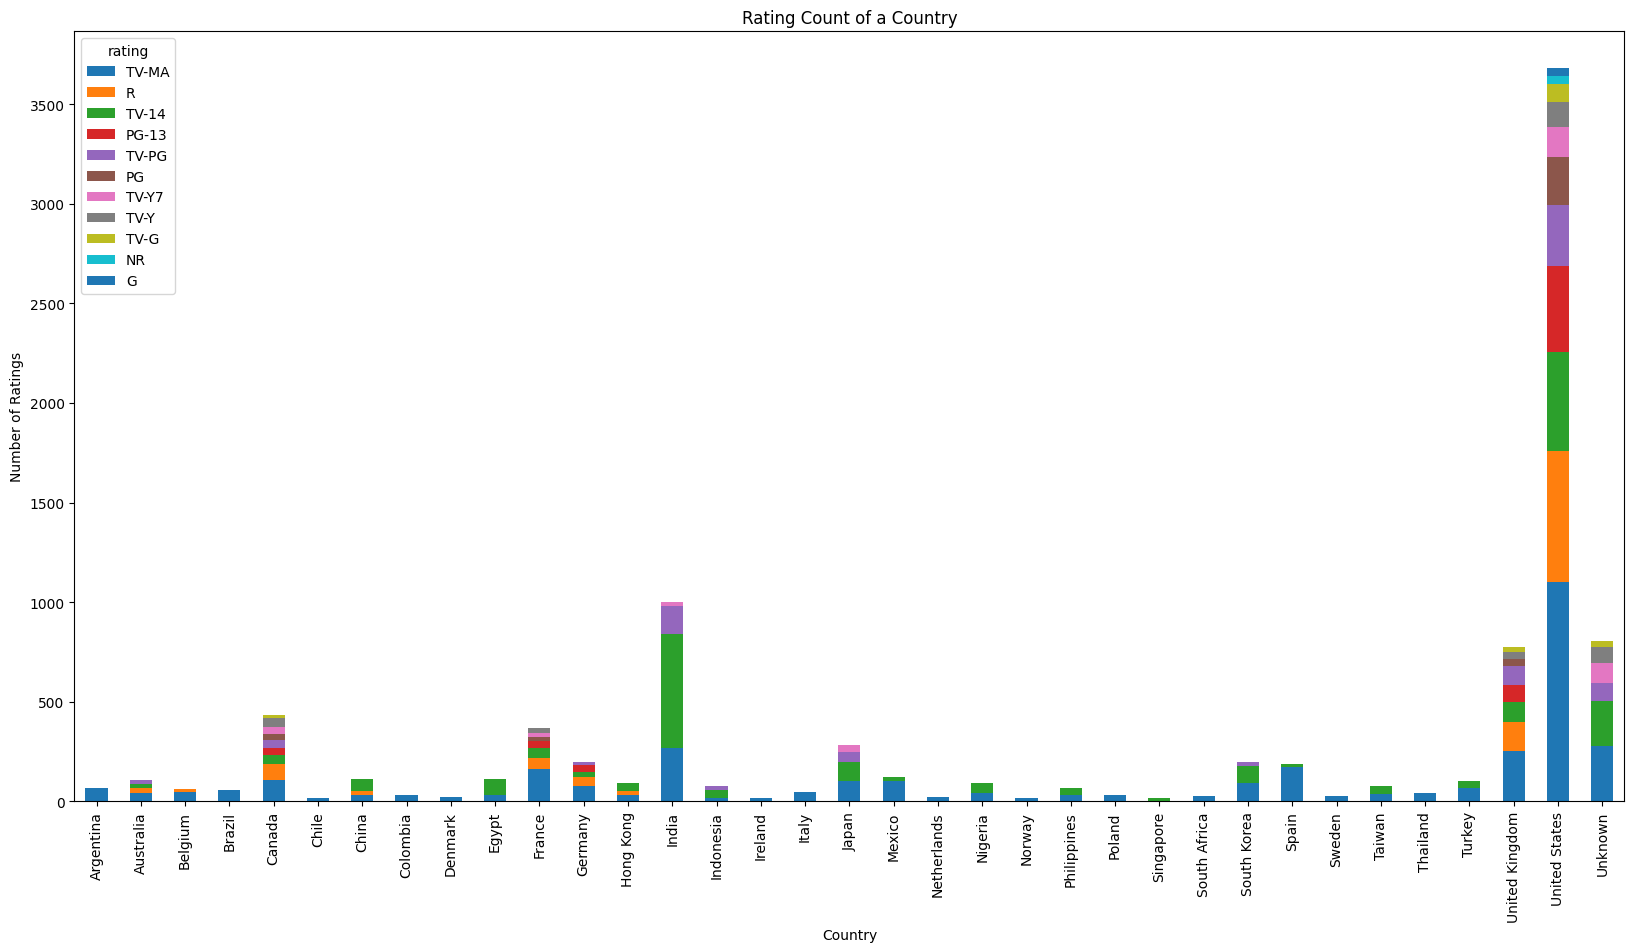

In [65]:
# plotting for relation between rating and country, top 25
df_country_rating = df_country.groupby(['rating', 'country'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False).head(100)
print(df_country_rating)

# plt.figure(figsize=(25, 6))
# df_stacked_plot = pd.crosstab(index=df_country['country'], columns=df_country['rating'])
# df_stacked_plot.plot(kind='bar', stacked=True, figsize=(30, 15))
# Pivot the DataFrame to create a matrix of `rating` vs. `country`
pivot_table = df_country_rating.pivot(index='country', columns='rating', values='count')

# Plot the stacked bar plot
pivot_table.plot(kind='bar', stacked=True, figsize=(20, 10))

plt.title('Rating Count of a Country')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Number of Ratings')

Plotting for relation between release_year and country.


Country and release year counts
      release_year         country  count
969           2018   United States    456
892           2017   United States    441
1034          2019   United States    428
1089          2020   United States    384
816           2016   United States    348
...            ...             ...    ...
443           2008        Thailand      1
449           2009  Czech Republic      1
458           2009        Malaysia      1
460           2009         Nigeria      1
1141          2021         Vietnam      1

[1142 rows x 3 columns]


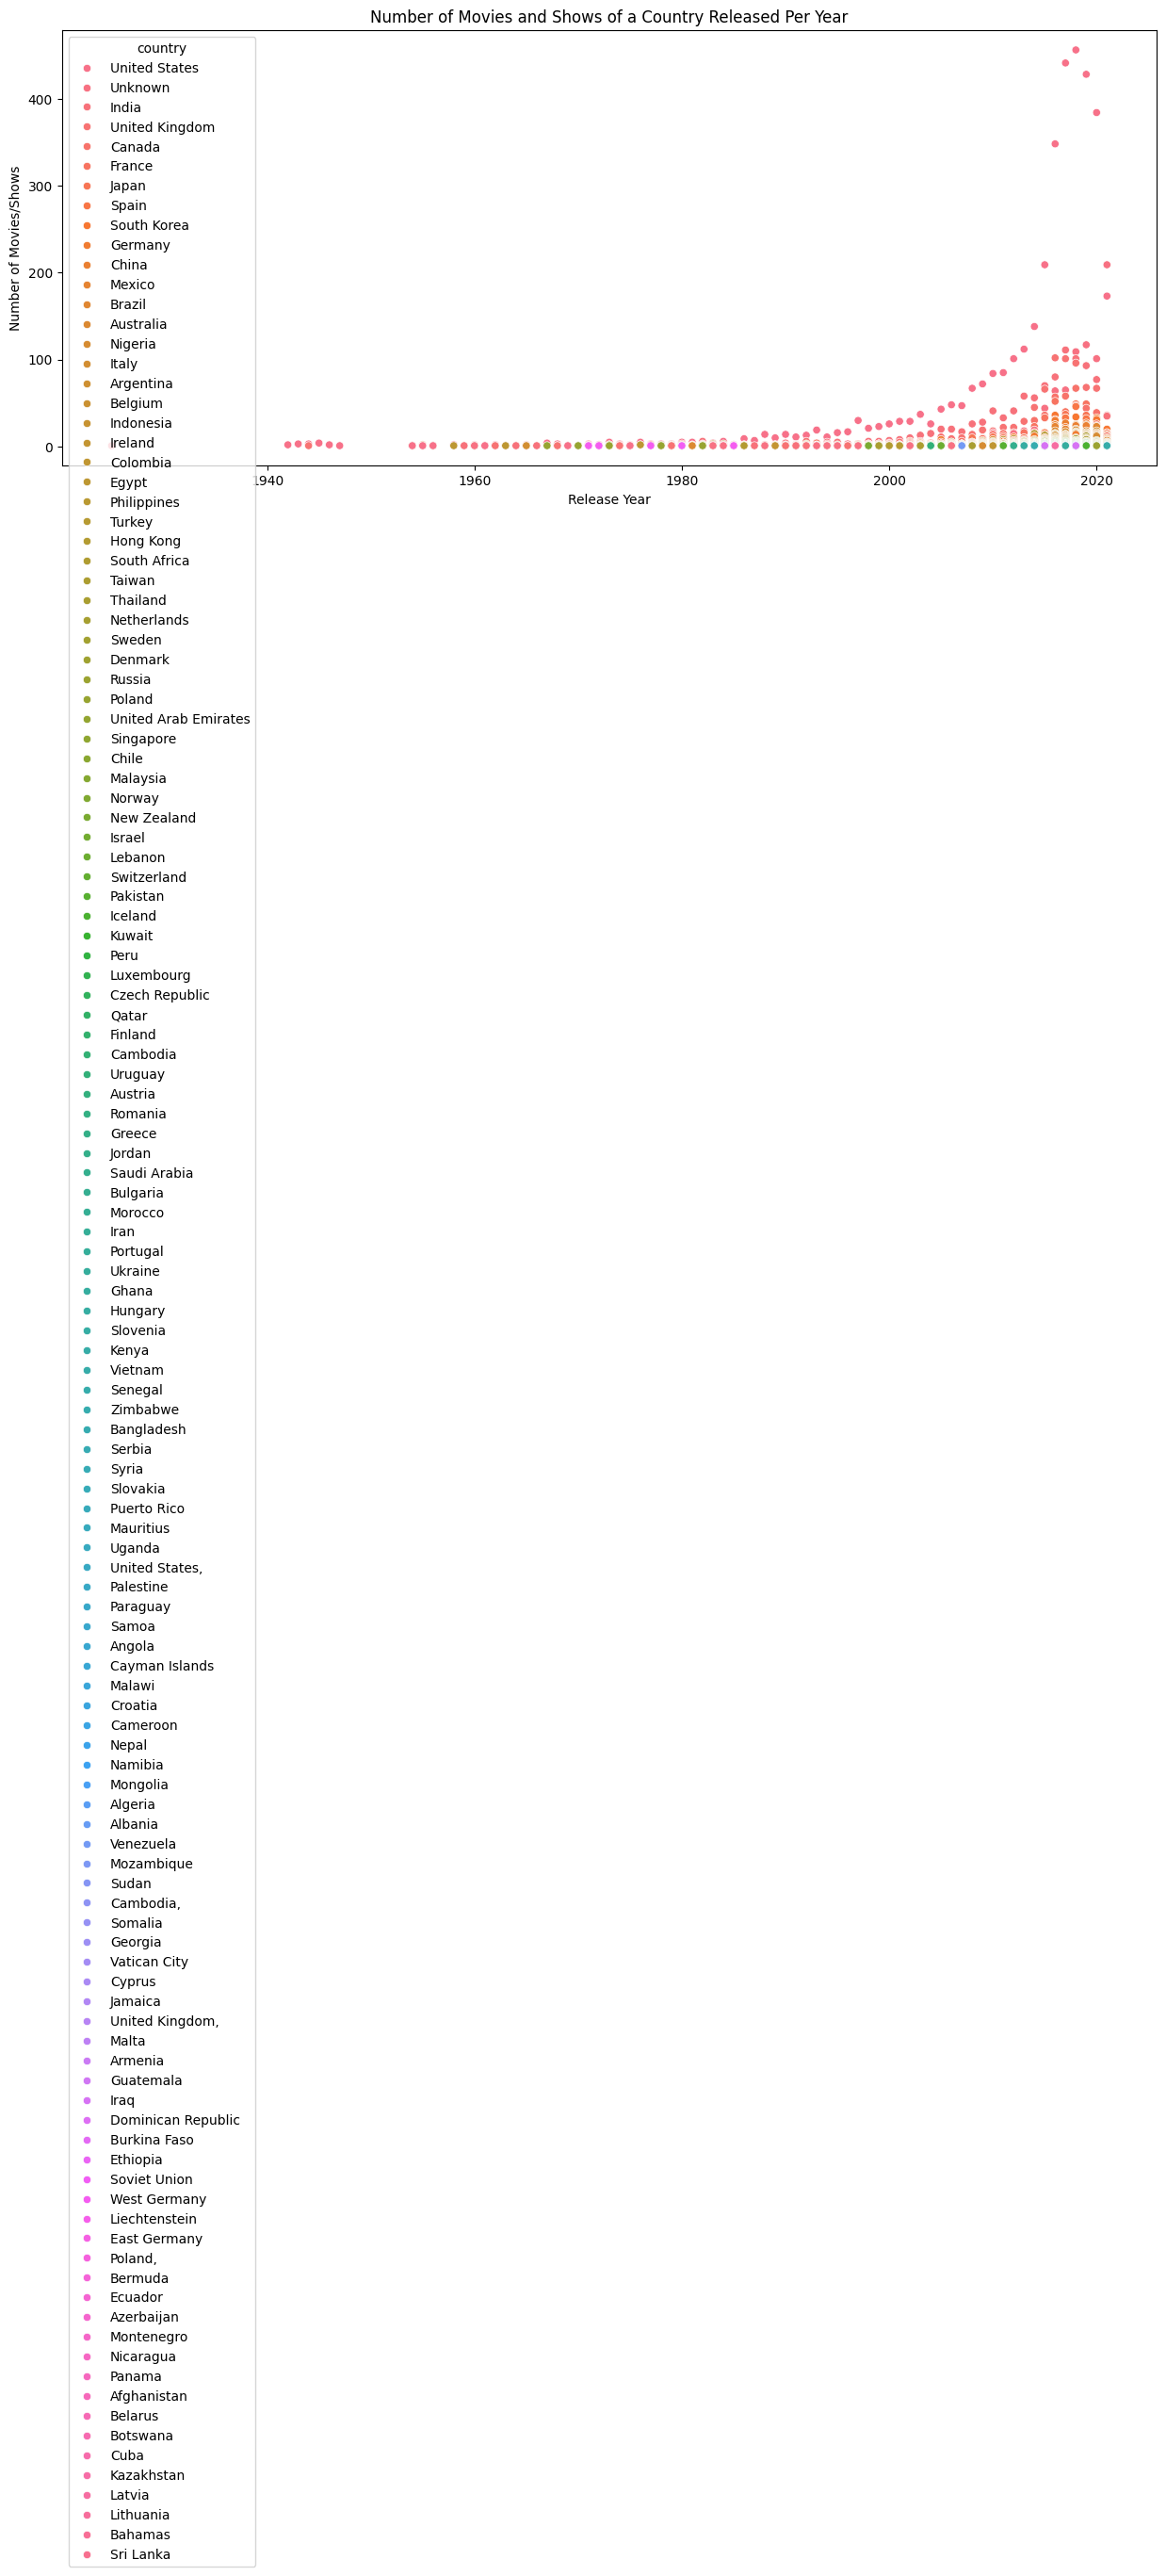

release_year         country  count
969           2018   United States    456
892           2017   United States    441
1034          2019   United States    428
1089          2020   United States    384
816           2016   United States    348
...            ...             ...    ...
443           2008        Thailand      1
449           2009  Czech Republic      1
458           2009        Malaysia      1
460           2009         Nigeria      1
1141          2021         Vietnam      1

[1142 rows x 3 columns]

In [66]:
df_country_release_year = df_country.groupby(['release_year', 'country'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)
print("\nCountry and release year counts")
print(df_country_release_year)

plt.figure(figsize=(15, 6))

sns.scatterplot(x= 'release_year', y='count', data=df_country_release_year, hue = 'country')
plt.title('Number of Movies and Shows of a Country Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/Shows')
plt.show()

df_country_release_year

The Country with highest no of movies and TV shows produced and released is USA in the years 2017 to 2021.  

Plotting Below is plotted on lesser datapoints than above for a sparser plot.

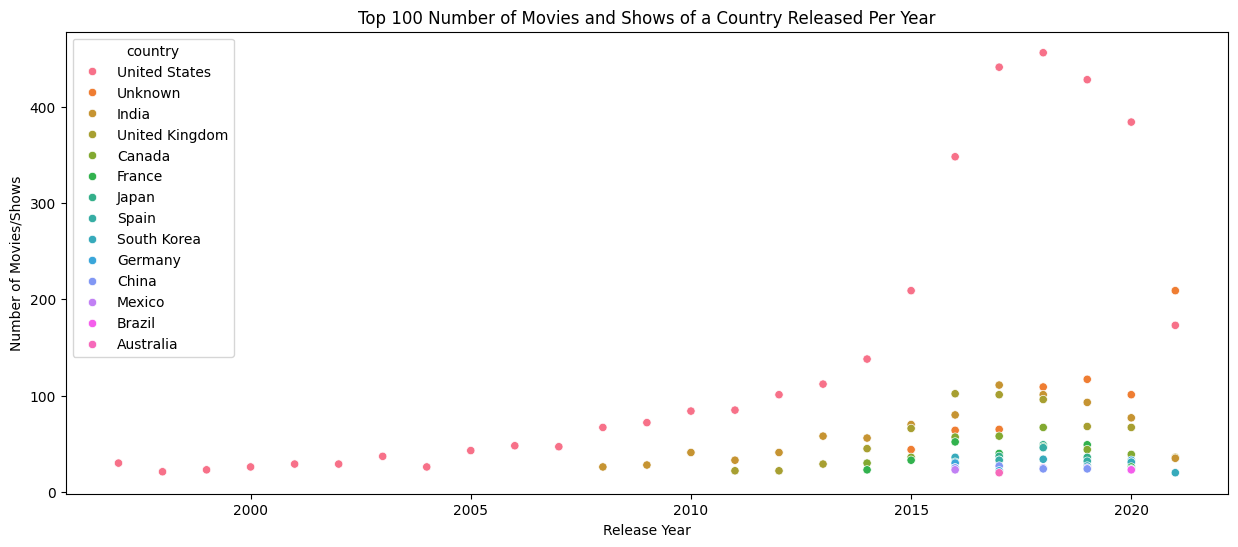

release_year         country  count
969           2018   United States    456
892           2017   United States    441
1034          2019   United States    428
1089          2020   United States    384
816           2016   United States    348
...            ...             ...    ...
841           2017         Germany     22
576           2012  United Kingdom     22
247           1998   United States     21
822           2017       Australia     20
1130          2021     South Korea     20

[100 rows x 3 columns]

In [67]:
# plotting for relation between release_year and country
df_country_release_year = df_country.groupby(['release_year', 'country'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False).head(100)

plt.figure(figsize=(15, 6))  # Adjust figure size if needed

sns.scatterplot(x= 'release_year', y='count', data=df_country_release_year, hue = 'country')
plt.title('Top 100 Number of Movies and Shows of a Country Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/Shows')
plt.show()

df_country_release_year

Plotting for relation between year_added and country


 Country and year added counts
     year_added        country  count
328        2019  United States    856
405        2020  United States    828
480        2021  United States    627
252        2018  United States    600
170        2017  United States    461
..          ...            ...    ...
167        2017        Ukraine      1
161        2017      Sri Lanka      1
156        2017       Slovenia      1
155        2017       Slovakia      1
388        2020    Puerto Rico      1

[485 rows x 3 columns]


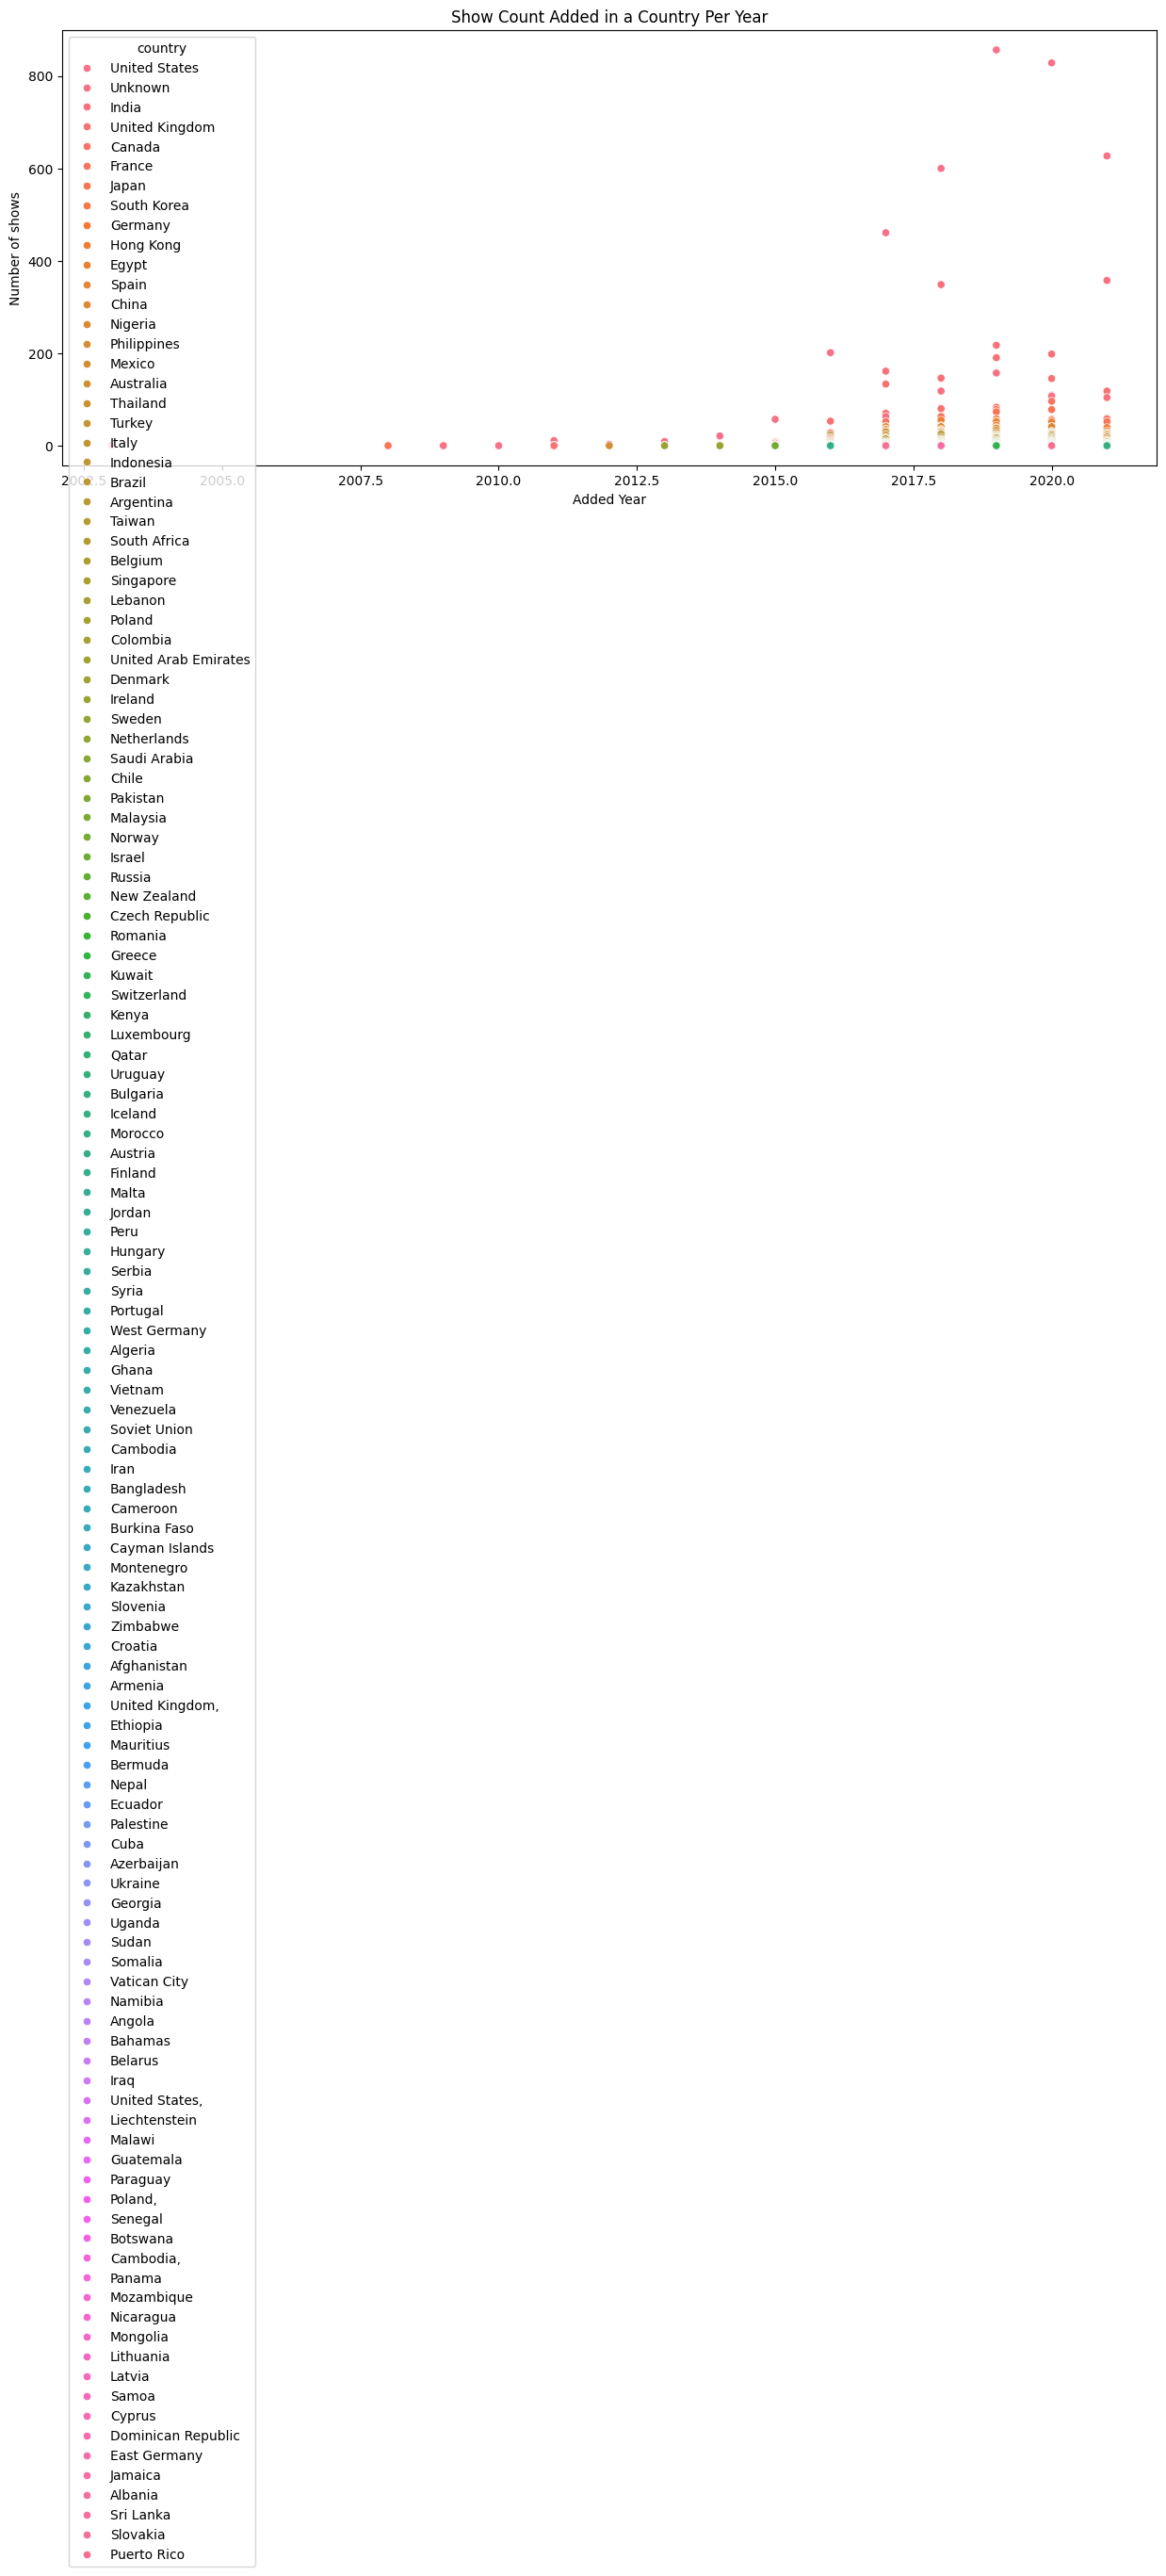

In [68]:
# plotting for relation between year_added and country
df_country_year_added = df_country.groupby(['year_added', 'country'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)
print("\n Country and year added counts")
print(df_country_year_added)

plt.figure(figsize=(15, 6))

sns.scatterplot(x= 'year_added', y='count', data=df_country_year_added, hue = 'country')
plt.title('Show Count Added in a Country Per Year')
plt.xlabel('Added Year')
plt.ylabel('Number of shows')
plt.show()

The Country with highest no of movies and TV shows produced and added in to is USA in the years 2017 to 2021.  

Plotting Below is plotted on lesser datapoints than above for a sparser plot.

     year_added        country  count
328        2019  United States    856
405        2020  United States    828
480        2021  United States    627
252        2018  United States    600
170        2017  United States    461
..          ...            ...    ...
426        2021          China     20
290        2019          Italy     20
325        2019         Turkey     19
103        2017        Belgium     19
324        2019       Thailand     19

[100 rows x 3 columns]


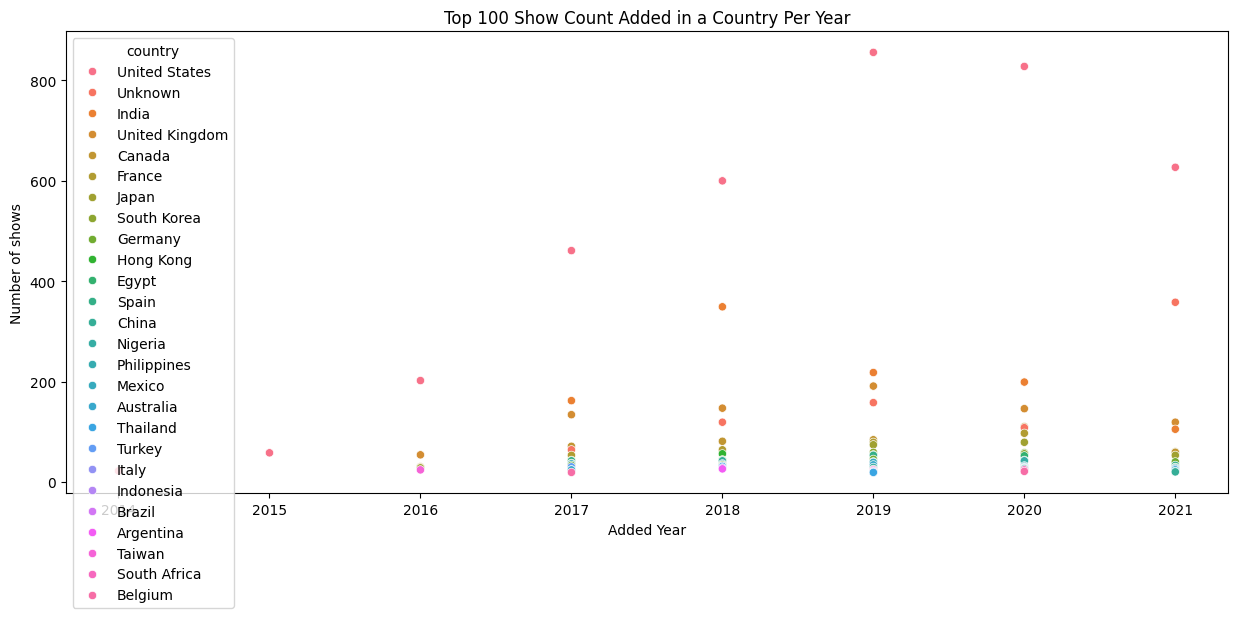

In [69]:
# plotting for relation between year_added and country
df_country_year_added = df_country.groupby(['year_added', 'country'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False).head(100)
print(df_country_year_added)

plt.figure(figsize=(15, 6))

sns.scatterplot(x= 'year_added', y='count', data=df_country_year_added, hue = 'country')
plt.title('Top 100 Show Count Added in a Country Per Year')
plt.xlabel('Added Year')
plt.ylabel('Number of shows')
plt.show()

Split and analyze director column for analysis on directors.

In [70]:
df_director['director'] = df_director['director'].str.split(', ')
df_director = df_director.explode('director')
df_director.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating  duration  \
0 2021-09-25          2020  PG-13        90   
1 2021-09-24          2021  TV-MA         2   
2 2021-09-24          2021  TV-MA         1   
3 2021-09-24          2021  TV-MA         1   
4 2021-09-24          2021  TV-MA         2   

                                           listed_in  year_added  month_added  \
0                                      Documentaries        2021            9   
1    International TV Shows, TV Dramas, TV Mysteries        2021            9   
2  Crime TV Shows, International TV Shows, TV Act...        2021            9   
3                             Docuseries, Reality TV        2021            9   
4  International TV Shows, Romantic TV Shows, TV ...        2021            9   

   week_added  quarter_added  content_addition_year_delay  
0          38              3                            1  
1          38              3                            0  
2          38              3                            0  
3          38              3                            0  
4          38              3                            0

Counting no of Movies and shows directed by a director.

In [71]:
director_counts = df_director['director'].value_counts()
print("Combined Director Counts")
print(director_counts)

Combined Director Counts
director
Unknown           2631
Rajiv Chilaka       22
Jan Suter           21
Raúl Campos         19
Marcus Raboy        16
                  ... 
Raymie Muzquiz       1
Stu Livingston       1
Joe Menendez         1
Eric Bross           1
Mozez Singh          1
Name: count, Length: 4992, dtype: int64


Counting Top 25 Directors

Top25 Directors are: director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Youssef Chahine        12
Jay Chapman            12
Steven Spielberg       11
Don Michael Paul       10
Anurag Kashyap          9
David Dhawan            9
Yılmaz Erdoğan          9
Shannon Hartman         9
Ryan Polito             8
Justin G. Dyck          8
Hanung Bramantyo        8
Fernando Ayllón         8
Kunle Afolayan          8
Hakan Algül             8
Troy Miller             8
Johnnie To              8
Umesh Mehra             8
Name: count, dtype: int64


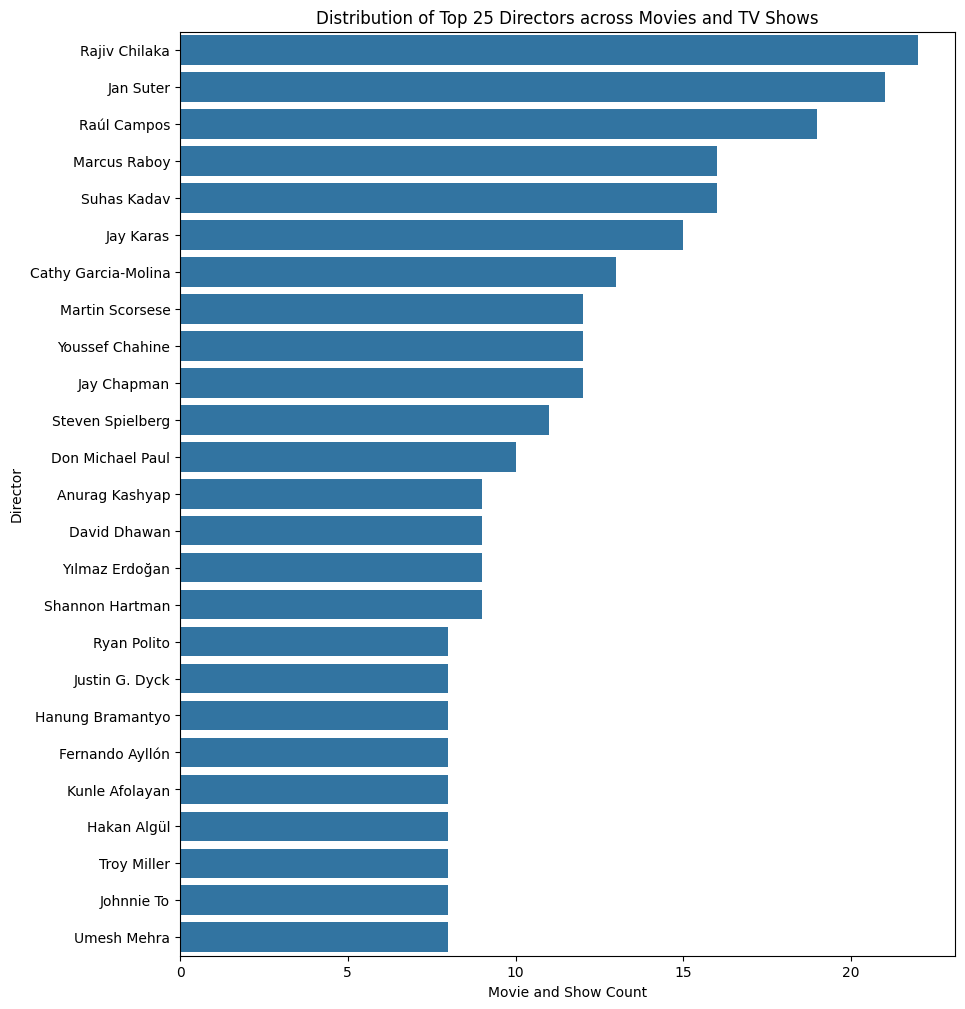

In [72]:
top_25_directors = director_counts[1:26]
print('Top25 Directors are:',top_25_directors)


plt.figure(figsize=(10, 12))
sns.barplot(y= top_25_directors.index, x= top_25_directors.values)
plt.title("Distribution of Top 25 Directors across Movies and TV Shows")
plt.ylabel("Director")
plt.xlabel("Movie and Show Count")
plt.show()

Top 10 directors with their Movie and TV show count

Rajiv Chilaka          22

Jan Suter              21

Raúl Campos            19

Marcus Raboy           16

Suhas Kadav            16

Jay Karas              15

Cathy Garcia-Molina    13

Martin Scorsese        12

Youssef Chahine        12

Jay Chapman            12

Split and analyze cast column for analysis on cast.

In [73]:
df_cast['cast'] = df_cast['cast'].str.split(', ')
df_cast = df_cast.explode('cast')
df_cast.head()

show_id     type                 title         director            cast  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson         Unknown   
1      s2  TV Show         Blood & Water          Unknown      Ama Qamata   
1      s2  TV Show         Blood & Water          Unknown     Khosi Ngema   
1      s2  TV Show         Blood & Water          Unknown   Gail Mabalane   
1      s2  TV Show         Blood & Water          Unknown  Thabang Molaba   

         country date_added  release_year rating  duration  \
0  United States 2021-09-25          2020  PG-13        90   
1   South Africa 2021-09-24          2021  TV-MA         2   
1   South Africa 2021-09-24          2021  TV-MA         2   
1   South Africa 2021-09-24          2021  TV-MA         2   
1   South Africa 2021-09-24          2021  TV-MA         2   

                                         listed_in  year_added  month_added  \
0                                    Documentaries        2021            9   
1  International TV Shows, TV Dramas, TV Mysteries        2021            9   
1  International TV Shows, TV Dramas, TV Mysteries        2021            9   
1  International TV Shows, TV Dramas, TV Mysteries        2021            9   
1  International TV Shows, TV Dramas, TV Mysteries        2021            9   

   week_added  quarter_added  content_addition_year_delay  
0          38              3                            1  
1          38              3                            0  
1          38              3                            0  
1          38              3                            0  
1          38              3                            0

Movie and show count of cast

In [74]:
cast_counts = df_cast['cast'].value_counts()
cast_counts

cast
Unknown                  825
Anupam Kher               43
Shah Rukh Khan            35
Julie Tejwani             33
Takahiro Sakurai          32
                        ... 
Daniel Valenzuela          1
Mónica Ayos                1
Ignacio Quesada            1
Antonio Grimau             1
Chittaranjan Tripathy      1
Name: count, Length: 36429, dtype: int64

Top50 Actors are: cast
Anupam Kher            43
Shah Rukh Khan         35
Julie Tejwani          33
Takahiro Sakurai       32
Naseeruddin Shah       32
Rupa Bhimani           31
Akshay Kumar           30
Om Puri                30
Yuki Kaji              29
Paresh Rawal           28
Amitabh Bachchan       28
Boman Irani            27
Vincent Tong           26
Rajesh Kava            26
Andrea Libman          25
Kareena Kapoor         25
John Cleese            24
Samuel L. Jackson      24
Jigna Bhardwaj         23
Fred Tatasciore        23
Tara Strong            23
Daisuke Ono            22
Ashleigh Ball          21
Nicolas Cage           21
Kay Kay Menon          21
Nawazuddin Siddiqui    21
Junichi Suwabe         21
Ajay Devgn             21
Adam Sandler           20
David Attenborough     20
Salman Khan            20
James Franco           19
Fred Armisen           19
Seth Rogen             19
Morgan Freeman         19
Gulshan Grover         19
Mamoru Miyano          19
Yuichi Nakamura

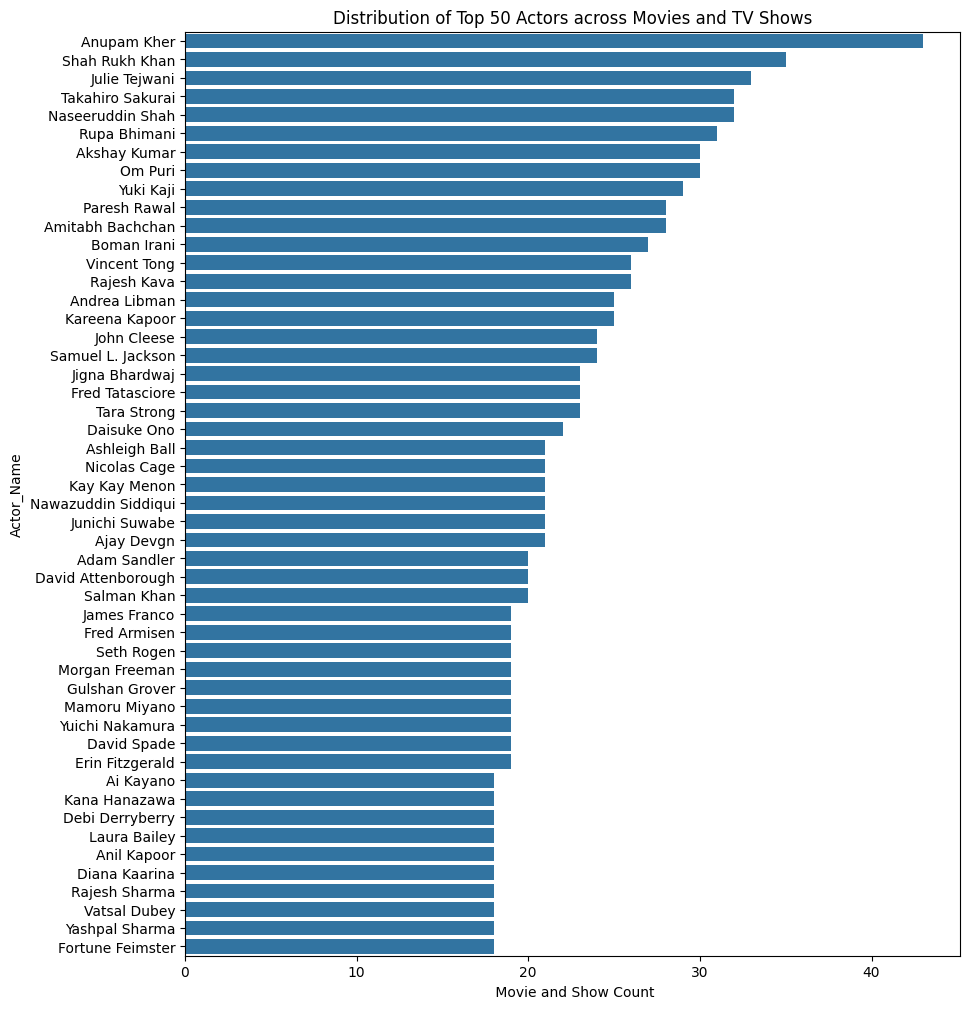

In [75]:
# Top 50 Actors
top_50_cast = cast_counts[1:51]
print('Top50 Actors are:',top_50_cast)


plt.figure(figsize=(10, 12))
sns.barplot(y= top_50_cast.index, x= top_50_cast.values)
plt.title("Distribution of Top 50 Actors across Movies and TV Shows")
plt.ylabel("Actor_Name")
plt.xlabel(" Movie and Show Count")
plt.show()

Top 10 Movie and TV show actors are
Anupam Kher            
Shah Rukh Khan         
Julie Tejwani          
Takahiro Sakurai       
Naseeruddin Shah       
Rupa Bhimani           
Akshay Kumar           
Om Puri                
Yuki Kaji              
Paresh Rawal           

Analysis between Country and Genre.

In [76]:
df_country_listed_in = df_country.copy()
df_country_listed_in['listed_in'] = df_country_listed_in['listed_in'].str.split(', ')
df_country_listed_in = df_country_listed_in.explode('listed_in')
df_country_listed_in.head()

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water          Unknown   
1      s2  TV Show         Blood & Water          Unknown   
1      s2  TV Show         Blood & Water          Unknown   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   

  date_added  release_year rating  duration               listed_in  \
0 2021-09-25          2020  PG-13        90           Documentaries   
1 2021-09-24          2021  TV-MA         2  International TV Shows   
1 2021-09-24          2021  TV-MA         2               TV Dramas   
1 2021-09-24          2021  TV-MA         2            TV Mysteries   
2 2021-09-24          2021  TV-MA         1          Crime TV Shows   

   year_added  month_added  week_added  quarter_added  \
0        2021            9          38              3   
1        2021            9          38              3   
1        2021            9          38              3   
1        2021            9          38              3   
2        2021            9          38              3   

   content_addition_year_delay  
0                            1  
1                            0  
1                            0  
1                            0  
2                            0

Calculation and plotting to find relation between Country and Genre

            country             listed_in  count
526           India  International Movies    864
1351  United States                Dramas    835
1346  United States              Comedies    680
522           India                Dramas    662
1349  United States         Documentaries    511
...             ...                   ...    ...
802        Mongolia  International Movies      1
803      Montenegro                Dramas      1
804      Montenegro  International Movies      1
805         Morocco    Action & Adventure      1
1463       Zimbabwe       Romantic Movies      1

[1464 rows x 3 columns]


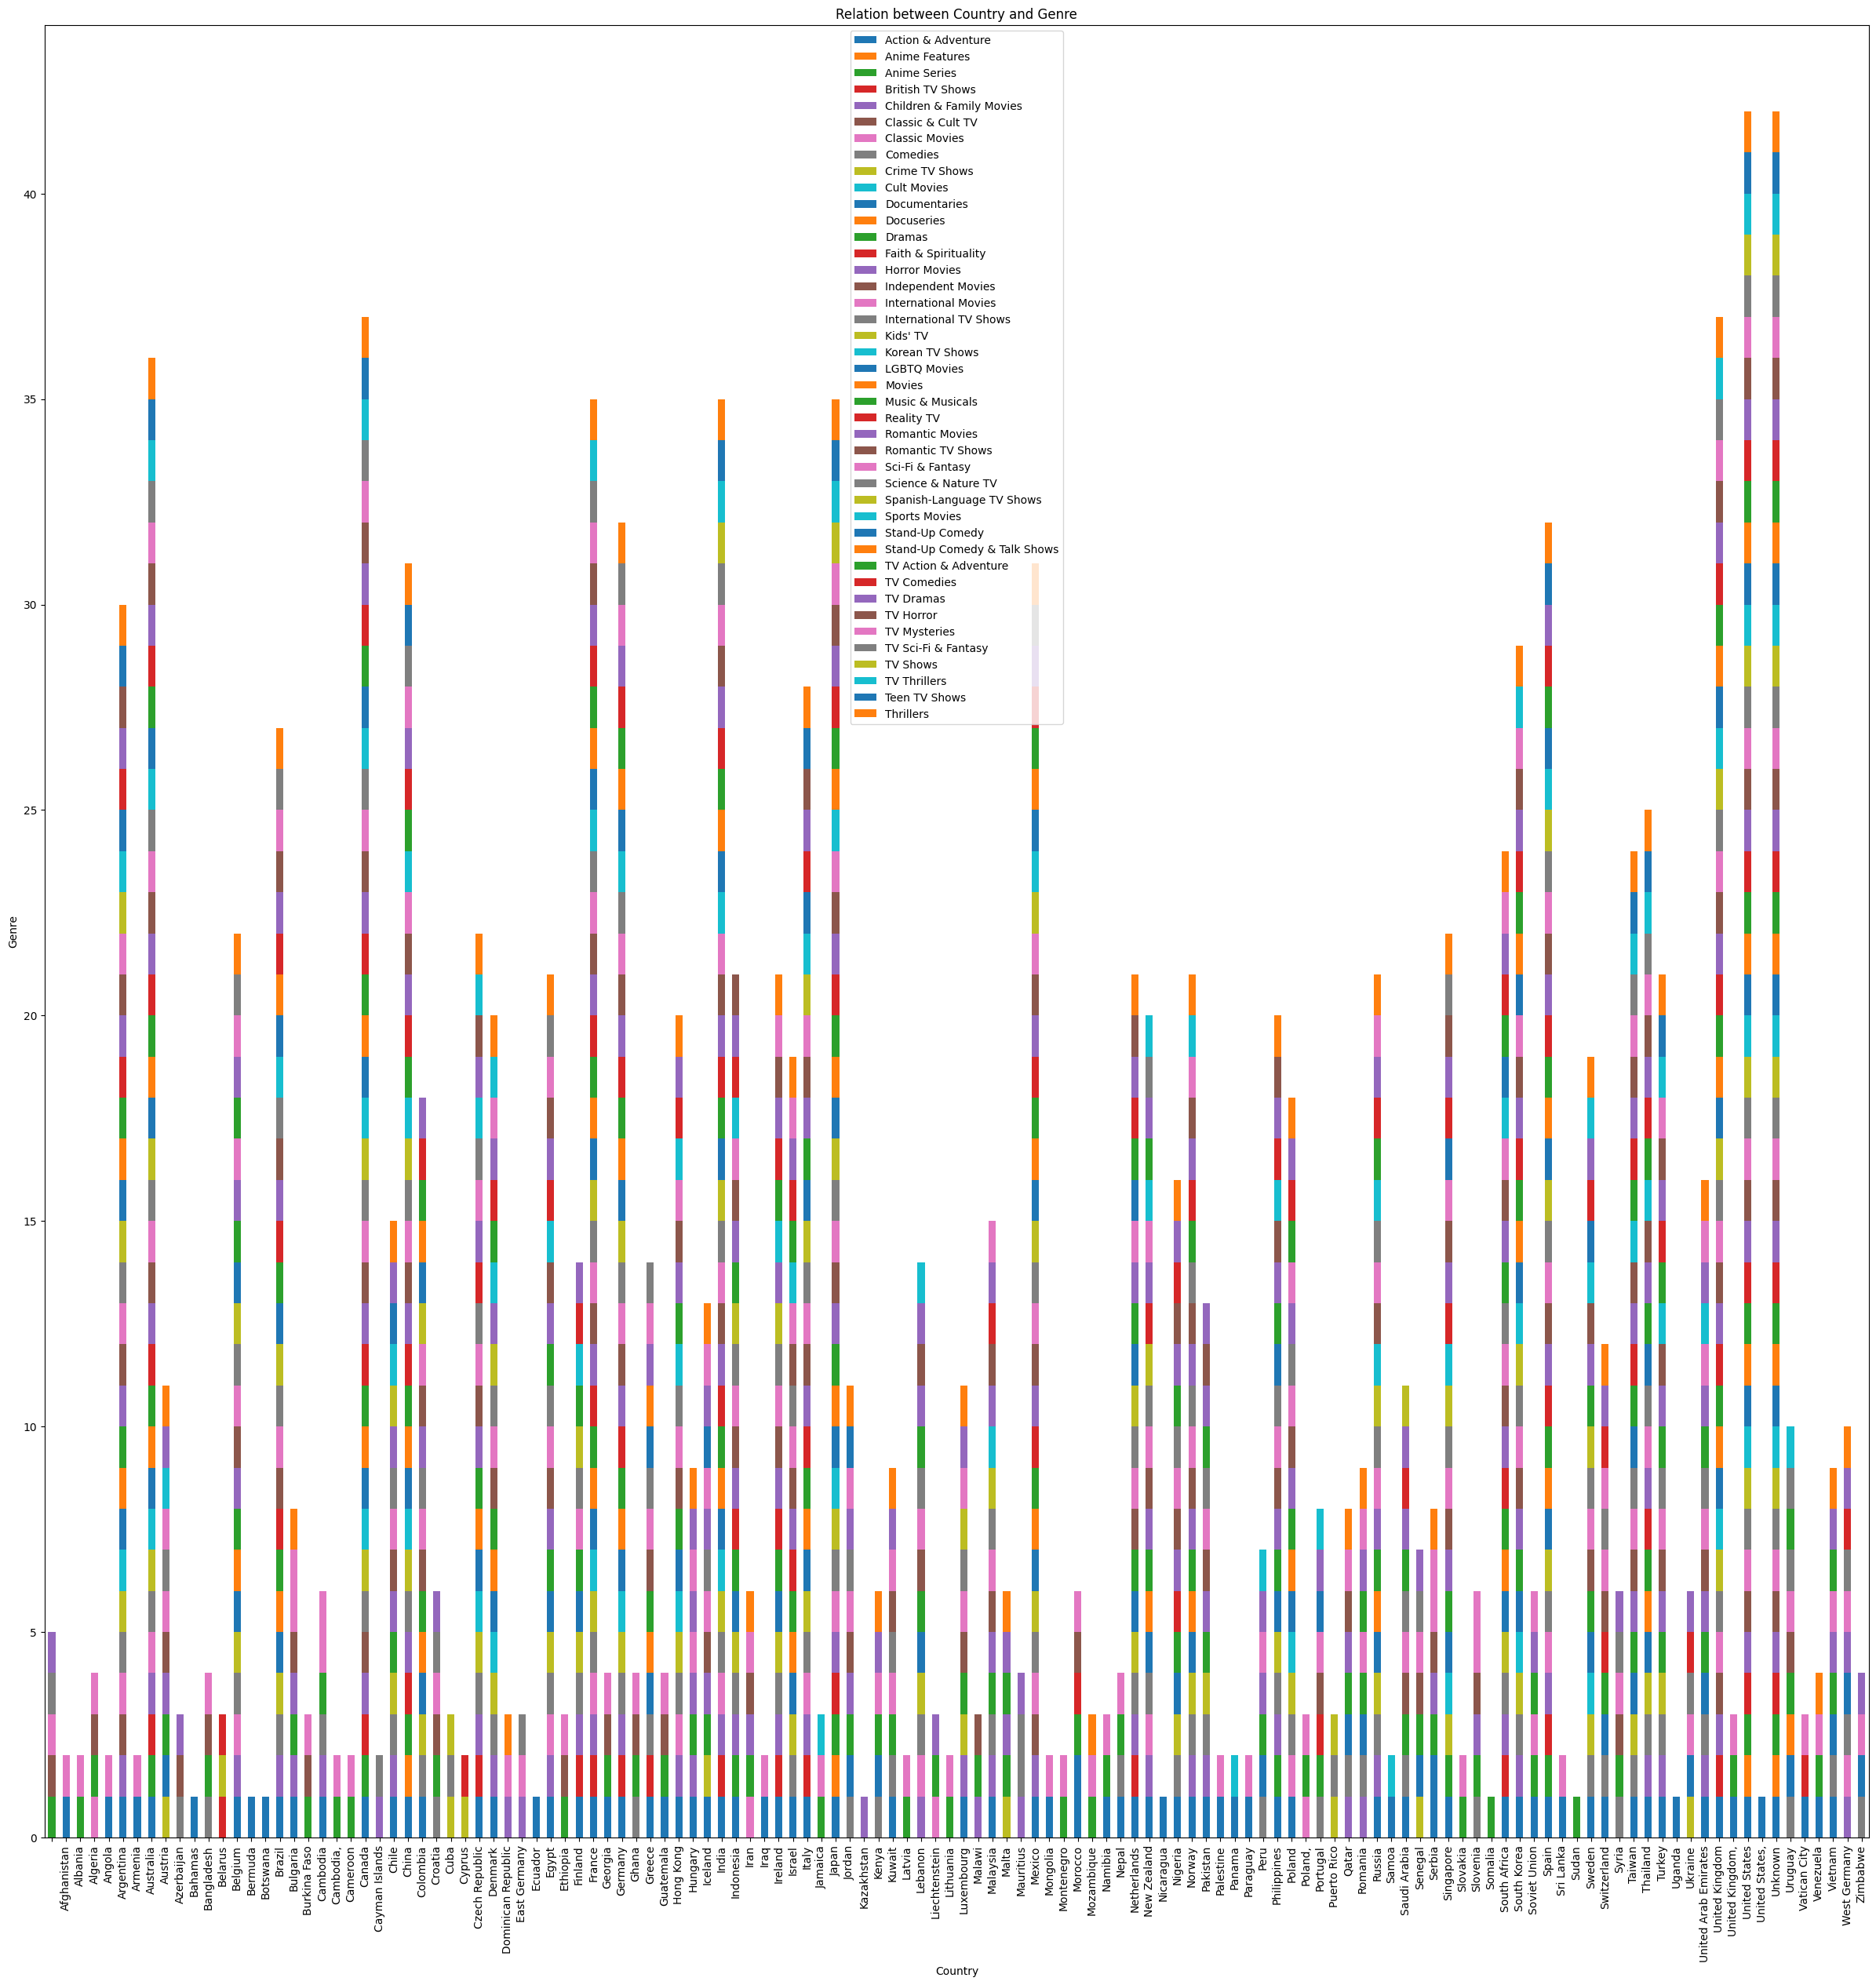

In [77]:
country_genre_counts = df_country_listed_in.groupby(['country', 'listed_in']).size().reset_index(name='count').sort_values('count', ascending=False)
print(country_genre_counts)

df_stacked_plot = pd.crosstab(index=country_genre_counts['country'], columns=country_genre_counts['listed_in'])

df_stacked_plot.plot(kind='bar', stacked=True, figsize=(30, 30))

plt.xticks(rotation=90)
plt.legend(loc='best')
plt.title('Relation between Country and Genre')
plt.xlabel('Country')
plt.ylabel('Genre')
plt.show()

India has produced more International Movies and Dramas and USA has produced more Dramas and Comedies.

Plotting Below is plotted on lesser datapoints than above for a sparser plot.

            country             listed_in  count
526           India  International Movies    864
1351  United States                Dramas    835
1346  United States              Comedies    680
522           India                Dramas    662
1349  United States         Documentaries    511
...             ...                   ...    ...
1375  United States          TV Mysteries     51
382          France              Comedies     51
1405        Unknown            Reality TV     50
932     Philippines                Dramas     50
1390        Unknown        Crime TV Shows     49

[100 rows x 3 columns]


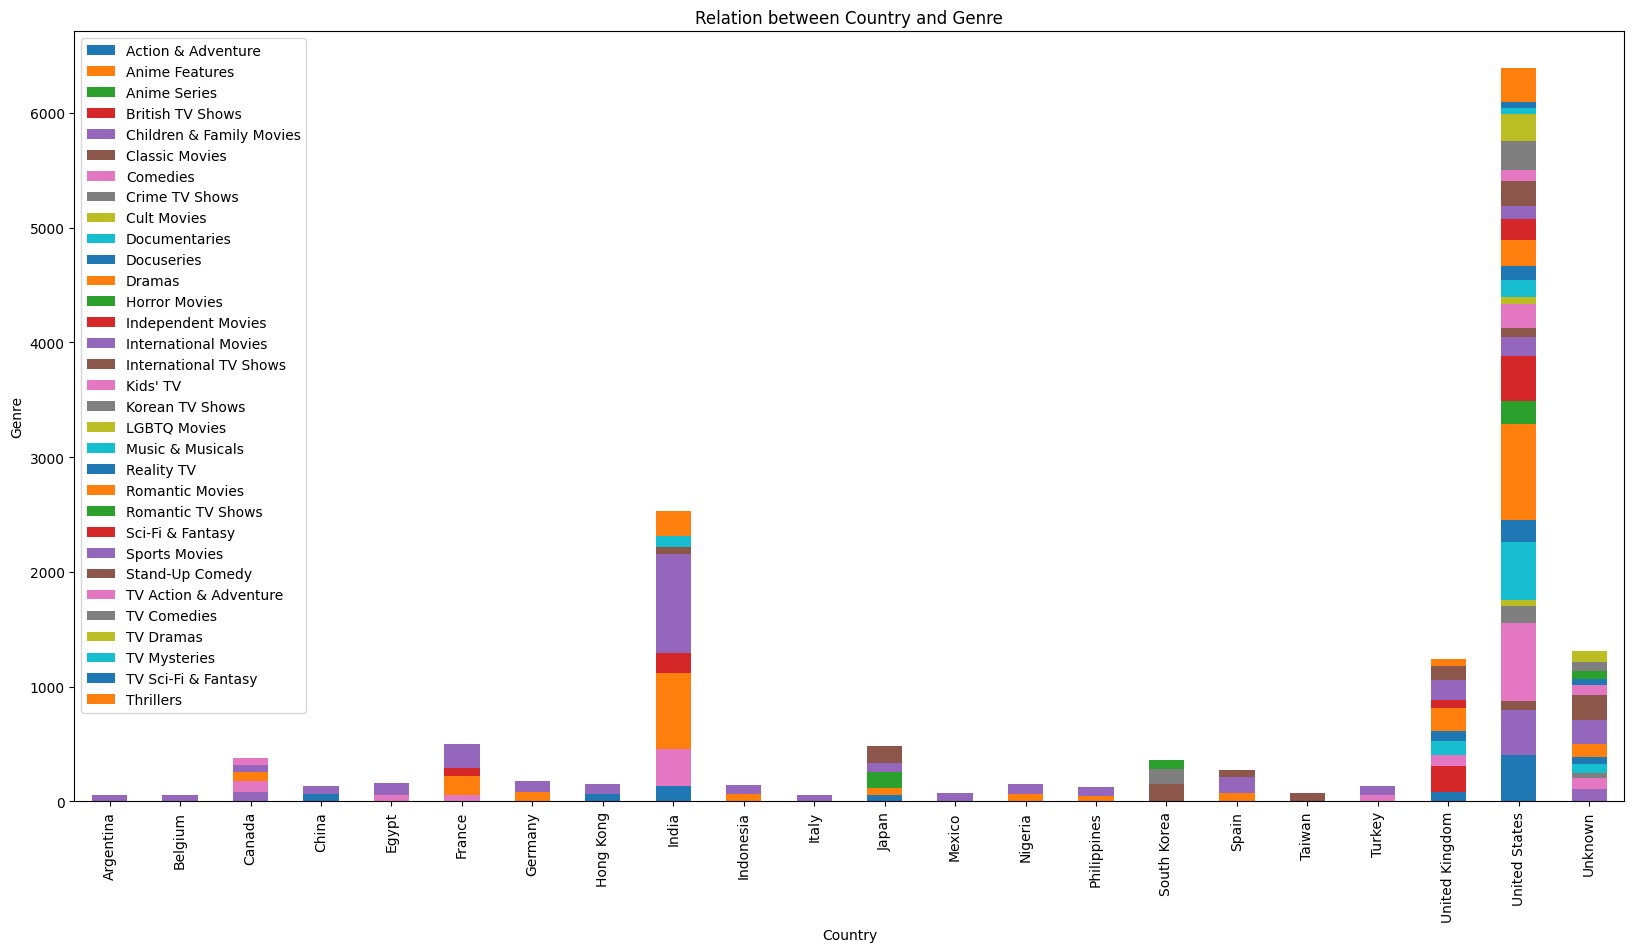

In [78]:
# Calculation and plotting to find relation between country and genre for top 100
country_genre_counts = df_country_listed_in.groupby(['country', 'listed_in']).size().reset_index(name='count').sort_values('count', ascending=False).head(100)
print(country_genre_counts)

pivot_table = country_genre_counts.pivot(index='country', columns='listed_in', values='count')

# Plot the stacked bar plot
pivot_table.plot(kind='bar', stacked=True, figsize=(20, 10))

plt.xticks(rotation=90)
plt.legend(loc='best')
plt.title('Relation between Country and Genre')
plt.xlabel('Country')
plt.ylabel('Genre')
plt.show()

#**Movies/TV shows Individual Analysis**

In [79]:
# creating seprate datasets of movie and TV shows
df_movie = df[df['type'] == 'Movie']
df_tv_show = df[df['type'] == 'TV Show']
df_movie.head()

show_id   type                             title  \
0       s1  Movie              Dick Johnson Is Dead   
6       s7  Movie  My Little Pony: A New Generation   
7       s8  Movie                           Sankofa   
9      s10  Movie                      The Starling   
12     s13  Movie                      Je Suis Karl   

                         director  \
0                 Kirsten Johnson   
6   Robert Cullen, José Luis Ucha   
7                    Haile Gerima   
9                  Theodore Melfi   
12            Christian Schwochow   

                                                 cast  \
0                                             Unknown   
6   Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   

                                              country date_added  \
0                                       United States 2021-09-25   
6                                             Unknown 2021-09-24   
7   United States, Ghana, Burkina Faso, United Kin... 2021-09-24   
9                                       United States 2021-09-24   
12                            Germany, Czech Republic 2021-09-23   

    release_year rating  duration  \
0           2020  PG-13        90   
6           2021     PG        91   
7           1993  TV-MA       125   
9           2021  PG-13       104   
12          2021  TV-MA       127   

                                           listed_in  year_added  month_added  \
0                                      Documentaries        2021            9   
6                           Children & Family Movies        2021            9   
7   Dramas, Independent Movies, International Movies        2021            9   
9                                   Comedies, Dramas        2021            9   
12                      Dramas, International Movies        2021            9   

    week_added  quarter_added  content_addition_year_delay  
0           38              3                            1  
6           38              3                            0  
7           38              3                           28  
9           38              3                            0  
12          38              3                            0

In [80]:
df_movie.shape, df_tv_show.shape

((6126, 16), (2674, 16))

In [81]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6126 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   show_id                      6126 non-null   object        
 1   type                         6126 non-null   category      
 2   title                        6126 non-null   object        
 3   director                     6126 non-null   object        
 4   cast                         6126 non-null   object        
 5   country                      6126 non-null   object        
 6   date_added                   6126 non-null   datetime64[ns]
 7   release_year                 6126 non-null   int64         
 8   rating                       6126 non-null   category      
 9   duration                     6126 non-null   int64         
 10  listed_in                    6126 non-null   object        
 11  year_added                   6126 non-null   int

In [82]:
df_movie.describe()

date_added  release_year     duration   year_added  \
count                           6126   6126.000000  6126.000000  6126.000000   
mean   2019-05-07 20:35:15.572967680   2013.120144    99.584884  2018.851126   
min              2008-01-01 00:00:00   1942.000000     3.000000  2008.000000   
25%              2018-04-01 12:00:00   2012.000000    87.000000  2018.000000   
50%              2019-06-20 00:00:00   2016.000000    98.000000  2019.000000   
75%              2020-07-24 00:00:00   2018.000000   114.000000  2020.000000   
max              2021-09-25 00:00:00   2021.000000   312.000000  2021.000000   
std                              NaN      9.681723    28.283225     1.561173   

       month_added  week_added  quarter_added  content_addition_year_delay  
count  6126.000000      6126.0    6126.000000                  6126.000000  
mean      6.609370    26.22331       2.542932                     5.730983  
min       1.000000         1.0       1.000000                    -1.000000  
25%       4.000000        13.0       2.000000                     0.000000  
50%       7.000000        26.0       3.000000                     2.000000  
75%      10.000000        39.0       4.000000                     7.000000  
max      12.000000        53.0       4.000000                    75.000000  
std       3.452541   15.116616       1.114667                     9.745753

In [83]:
df_tv_show.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2674 entries, 1 to 8803
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   show_id                      2674 non-null   object        
 1   type                         2674 non-null   category      
 2   title                        2674 non-null   object        
 3   director                     2674 non-null   object        
 4   cast                         2674 non-null   object        
 5   country                      2674 non-null   object        
 6   date_added                   2674 non-null   datetime64[ns]
 7   release_year                 2674 non-null   int64         
 8   rating                       2674 non-null   category      
 9   duration                     2674 non-null   int64         
 10  listed_in                    2674 non-null   object        
 11  year_added                   2674 non-null   int

In [84]:
df_tv_show.describe()

date_added  release_year     duration   year_added  \
count                           2674   2674.000000  2674.000000  2674.000000   
mean   2019-05-29 21:28:40.568436992   2016.607704     1.765520  2018.896784   
min              2003-01-01 00:00:00   1925.000000     1.000000  2003.000000   
25%              2018-04-15 12:00:00   2016.000000     1.000000  2018.000000   
50%              2019-08-14 12:00:00   2018.000000     1.000000  2019.000000   
75%              2020-10-01 00:00:00   2020.000000     2.000000  2020.000000   
max              2021-09-24 00:00:00   2021.000000    17.000000  2021.000000   
std                              NaN      5.741777     1.583206     1.691898   

       month_added  week_added  quarter_added  content_addition_year_delay  
count  2674.000000      2674.0    2674.000000                  2674.000000  
mean      6.741212   27.784966       2.571429                     2.289080  
min       1.000000         1.0       1.000000                    -3.000000  
25%       4.000000        15.0       2.000000                     0.000000  
50%       7.000000        28.0       3.000000                     0.000000  
75%      10.000000        40.0       4.000000                     2.000000  
max      12.000000        53.0       4.000000                    93.000000  
std       3.408080   14.849933       1.097366                     5.314485

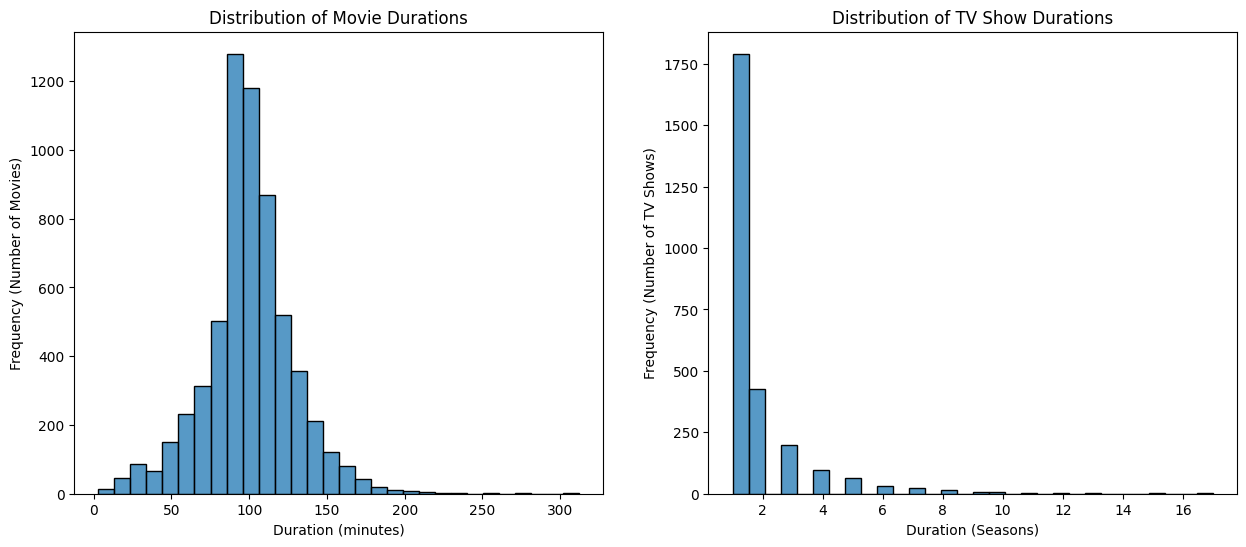

In [85]:
# Analysis of duration column in both movies and tv shows set
plt.figure(figsize=(15, 6))  # Adjust figure size if needed

plt.subplot(1,2,1)
sns.histplot(df_movie['duration'], bins=30, edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency (Number of Movies)')

plt.subplot(1,2,2)
sns.histplot(df_tv_show['duration'], bins=30, edgecolor='black')
plt.title('Distribution of TV Show Durations')
plt.xlabel('Duration (Seasons)')
plt.ylabel('Frequency (Number of TV Shows)')

plt.show()

In [86]:
# Average no of duration in movies and tv shows dataset # Pre outlier removal
avg_movie_duration = df_movie['duration'].mean()
avg_tv_show_duration = df_tv_show['duration'].mean()
print(f"Average duration of movies: {avg_movie_duration} or {int(avg_movie_duration)+1} minutes")
print(f"Average duration of TV shows: {avg_tv_show_duration} or {int(avg_tv_show_duration)+1} seasons")

Average duration of movies: 99.58488410055502 or 100 minutes
Average duration of TV shows: 1.7655198204936424 or 2 seasons


Average duration of movies: 100 minutes

Average duration of TV shows: 2 seasons

In [87]:
# median no of duration in movies and tv shows dataset # Pre outlier removal
median_movie_duration = df_movie['duration'].median()
median_tv_show_duration = df_tv_show['duration'].median()
print(f"Median duration of movies: {median_movie_duration} minutes")
print(f"Median duration of TV shows: {median_tv_show_duration} seasons")

Median duration of movies: 98.0 minutes
Median duration of TV shows: 1.0 seasons


Median duration of movies: 98.0 minutes

Median duration of TV shows: 1.0 seasons

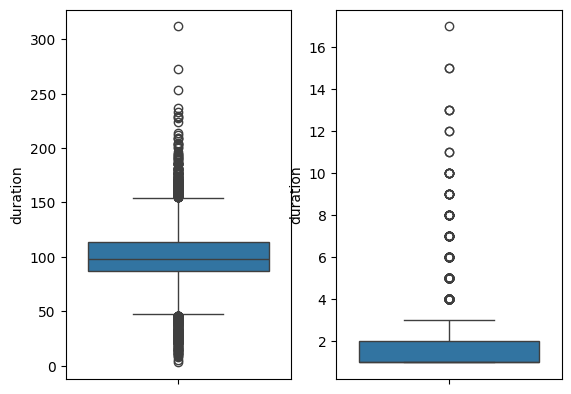

In [88]:
# Analysis of outliers on duration on df_movies and df_tv_show
plt.subplot(1,2,1)
sns.boxplot(y = 'duration', data=df_movie)

plt.subplot(1,2,2)
sns.boxplot(y = 'duration', data=df_tv_show)
plt.show()

In [89]:
# duration column of both datasets have outliers but outliers of tv_shows may
# not be outliers as they are no of seasons, because Tv shows with 4 seasons is
# also considered as a outlier by boxplot where as in df_movie the outliers can
# be actual outliers so we are doing outlier removal only on df_movies. %%
# Removing outliers in duration column of df_movie. Removing outliers in
# duration column of df_movie

In [90]:
# Removing outliers in duration column of df_movie
Q1 = df_movie['duration'].quantile(0.25)
Q3 = df_movie['duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_movie = df_movie[(df_movie['duration'] >= lower_bound) & (df_movie['duration'] <= upper_bound)]

In [91]:
avg_movie_duration = df_movie['duration'].mean()
median_movie_duration = df_movie['duration'].median()
print(f"Average duration of movies: {avg_movie_duration} or {int(avg_movie_duration)+1} minutes")
print(f"Median duration of movies: {median_movie_duration} minutes")

Average duration of movies: 99.9598379425753 or 100 minutes
Median duration of movies: 98.0 minutes


<Axes: ylabel='duration'>

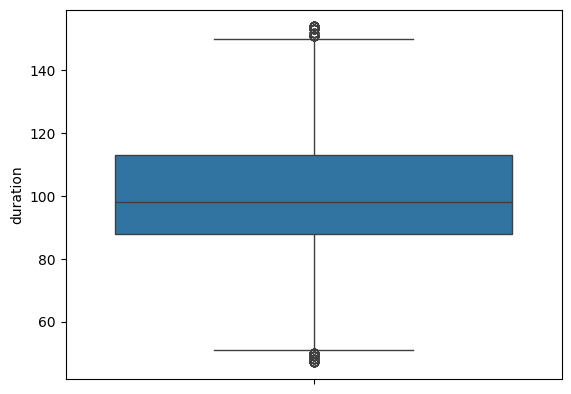

In [92]:
sns.boxplot(y = 'duration', data=df_movie)

In [93]:
# Outlier removal hasn't changed the mean median values of duration of movies that much

<Axes: xlabel='rating', ylabel='duration'>

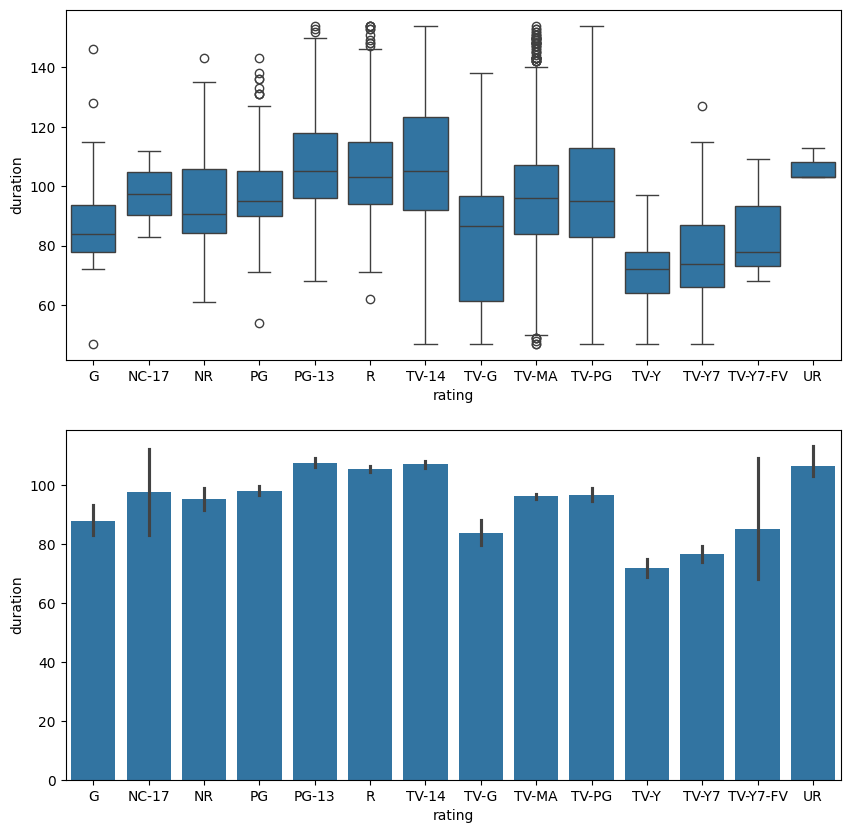

In [94]:
plt.figure(figsize=(10, 10))

plt.subplot(2,1,1)
sns.boxplot(y='duration', x = 'rating', data =df_movie)

plt.subplot(2,1,2)
sns.barplot(y='duration', x = 'rating', data =df_movie)

<Axes: xlabel='rating', ylabel='duration'>

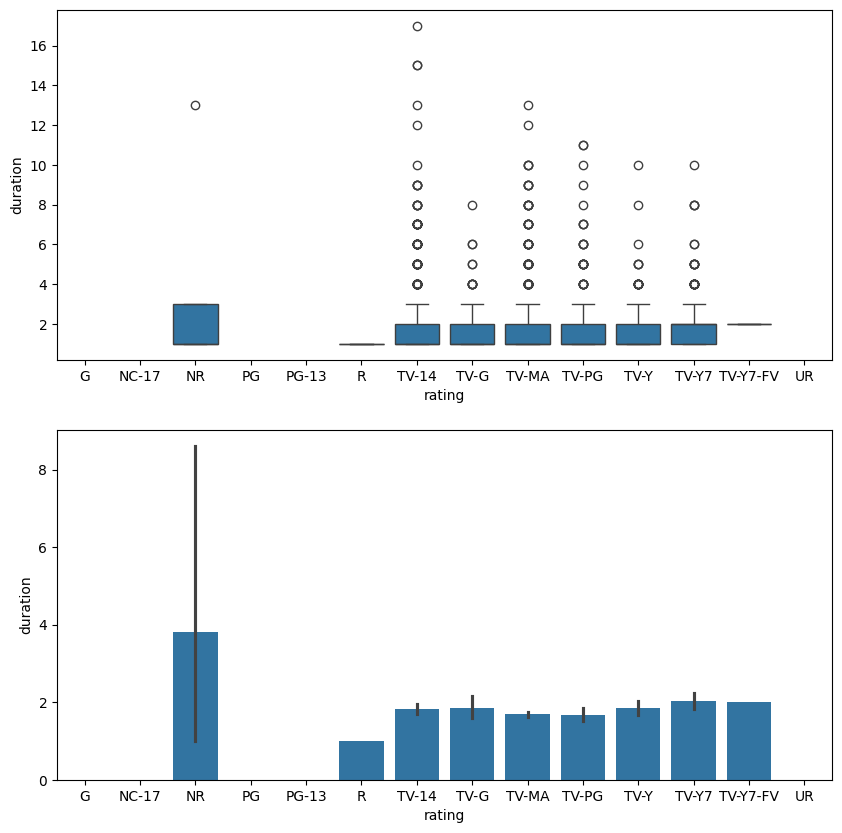

In [95]:
plt.figure(figsize=(10, 10))

plt.subplot(2,1,1)
sns.boxplot(y='duration', x = 'rating', data =df_tv_show)

plt.subplot(2,1,2)
sns.barplot(y='duration', x = 'rating', data =df_tv_show)

Percentage of Ratings rating
TV-MA       35.141800
TV-14       22.476660
R           13.757266
PG-13        8.437555
TV-PG        8.331865
PG           4.967412
TV-Y7        1.884798
TV-G         1.867183
NR           1.303505
TV-Y         1.021666
G            0.669368
TV-Y7-FV     0.052845
UR           0.052845
NC-17        0.035230
Name: count, dtype: float64 



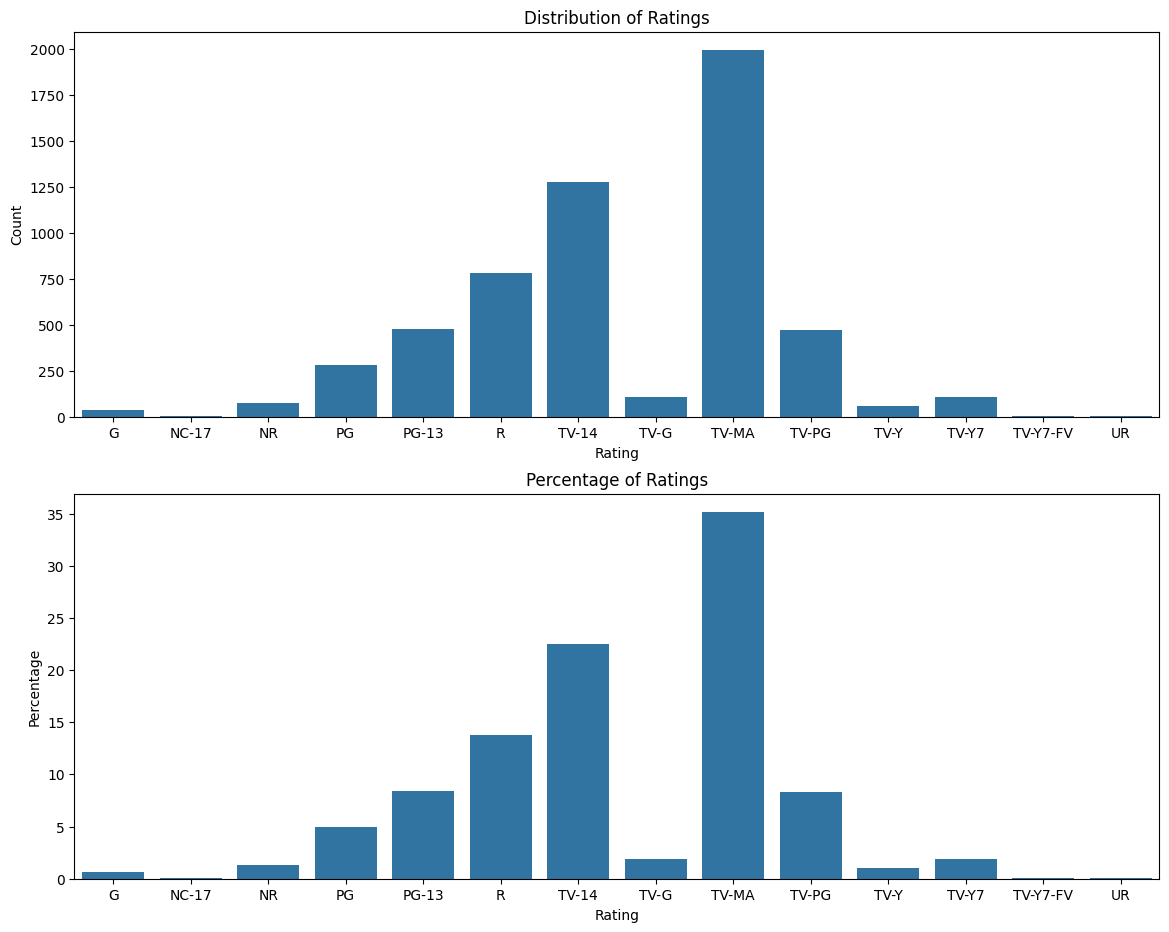

Top5 Ratings- Movie are: rating
TV-MA    1995
TV-14    1276
R         781
PG-13     479
TV-PG     473
Name: count, dtype: int64


In [96]:
rating_count = df_movie['rating'].value_counts()
rating_count

rating_count_percentage = rating_count/len(df_movie) *100
print("Percentage of Ratings", rating_count_percentage,'\n')

# A bar plot to compare ratings
plt.figure(figsize=(14, 11))

plt.subplot(2,1,1)
sns.barplot(x=rating_count.index, y=rating_count.values)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")

plt.subplot(2,1,2)
sns.barplot(x=rating_count_percentage.index, y=rating_count_percentage.values)
plt.title("Percentage of Ratings")
plt.xlabel("Rating")
plt.ylabel("Percentage")

plt.show()

# Top5 ratings
top_5_ratings = rating_count.head(5)
print('Top5 Ratings- Movie are:',top_5_ratings)

In Movies TV-MA holds the higher percentage of ratings - 35%, Next is TV-14 with 23%

Percentage of Ratings rating
TV-MA       42.819746
TV-14       27.412117
TV-PG       12.079282
TV-Y7        7.292446
TV-Y         6.581900
TV-G         3.515333
NR           0.186986
R            0.074794
TV-Y7-FV     0.037397
G            0.000000
NC-17        0.000000
PG           0.000000
PG-13        0.000000
UR           0.000000
Name: count, dtype: float64 



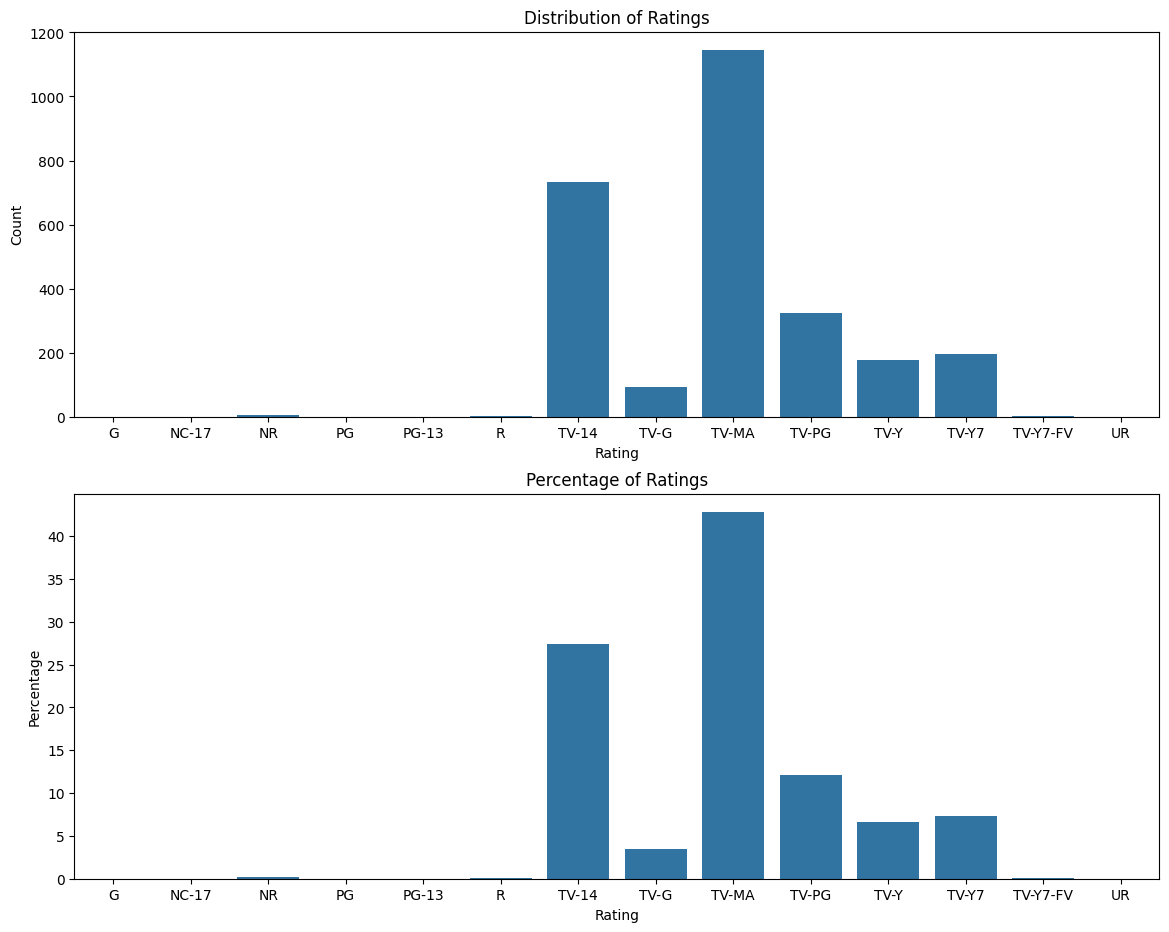

Top5 Ratings- TV Show are: rating
TV-MA    1145
TV-14     733
TV-PG     323
TV-Y7     195
TV-Y      176
Name: count, dtype: int64


In [97]:
rating_count = df_tv_show['rating'].value_counts()
rating_count

rating_count_percentage = rating_count/len(df_tv_show) *100
print("Percentage of Ratings", rating_count_percentage,'\n')

# A bar plot to compare ratings
plt.figure(figsize=(14, 11))

plt.subplot(2,1,1)
sns.barplot(x=rating_count.index, y=rating_count.values)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")

plt.subplot(2,1,2)
sns.barplot(x=rating_count_percentage.index, y=rating_count_percentage.values)
plt.title("Percentage of Ratings")
plt.xlabel("Rating")
plt.ylabel("Percentage")

plt.show()

# Top5 ratings
top_5_ratings = rating_count.head(5)
print('Top5 Ratings- TV Show are:',top_5_ratings)

In TV Shows TV-MA holds the higher percentage of ratings - 42%, Next is TV-14 with 27%

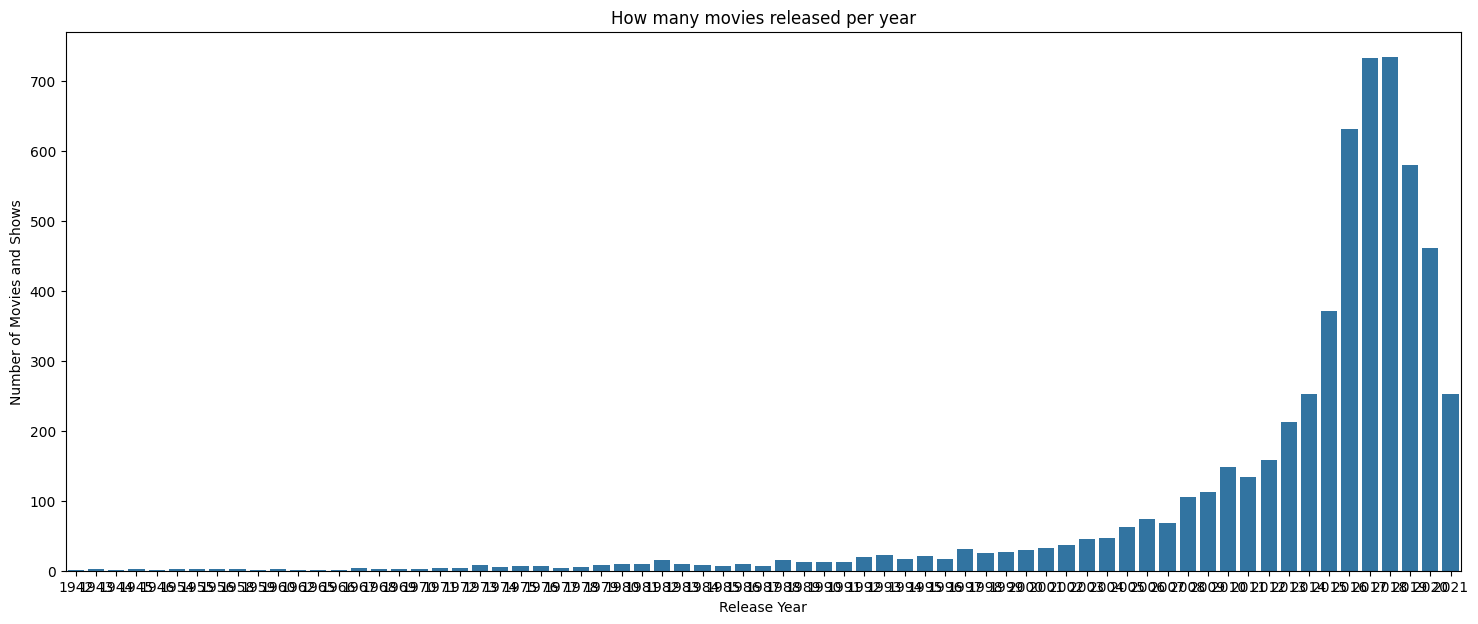

release_year
2018    734
2017    733
2016    631
2019    580
2020    461
Name: release_year, dtype: int64

In [98]:
plt.figure(figsize=(18,7))
sns.countplot(x= 'release_year', data = df_movie)
plt.title('How many movies released per year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies and Shows')
plt.show()

df_movie.groupby('release_year')['release_year'].count().sort_values(ascending=False).head() # Shows Top5 years most movies released

Highest no of movies were released in 2018.

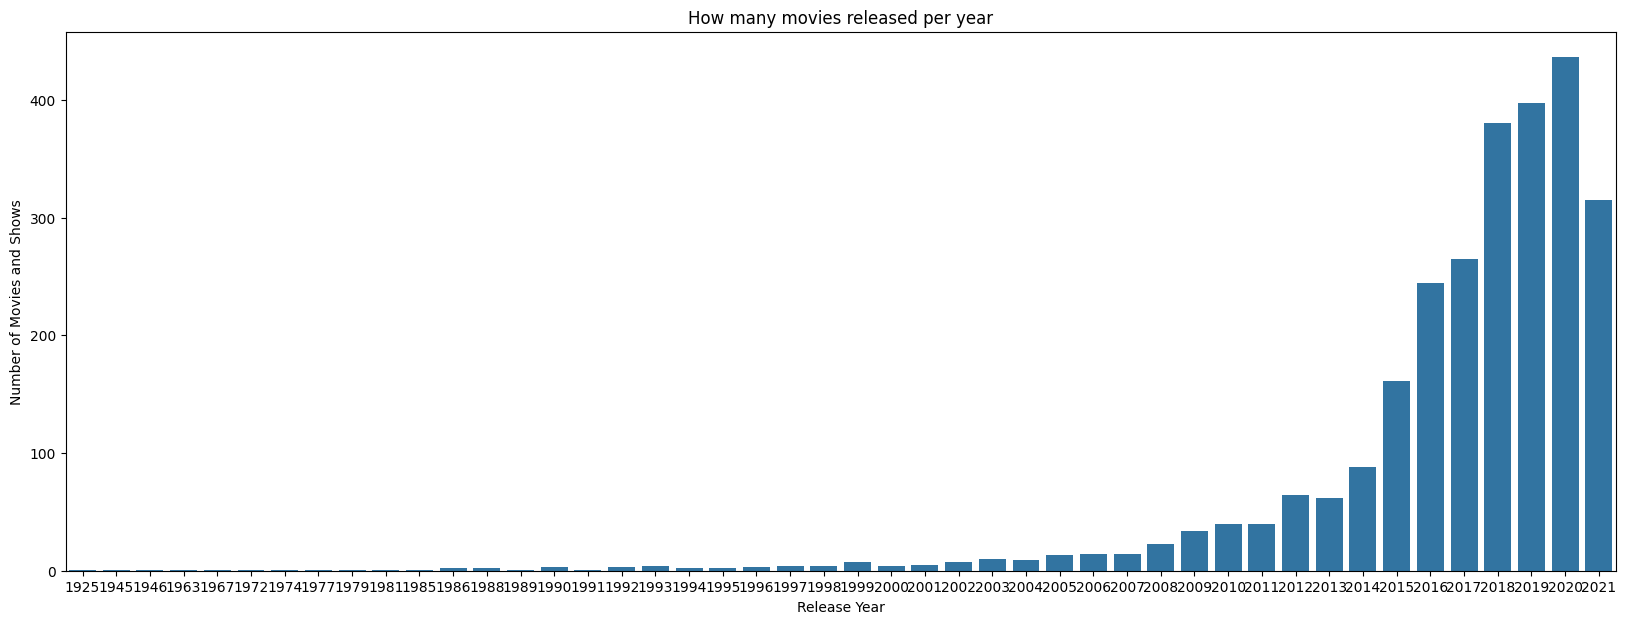

release_year
2020    436
2019    397
2018    380
2021    315
2017    265
Name: release_year, dtype: int64

In [99]:
plt.figure(figsize=(20,7))
sns.countplot(x= 'release_year', data = df_tv_show)
plt.title('How many movies released per year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies and Shows')
plt.show()

df_tv_show.groupby('release_year')['release_year'].count().sort_values(ascending=False).head() # Shows Top5 years most movies released

highest no of TV shows were released in 2020.

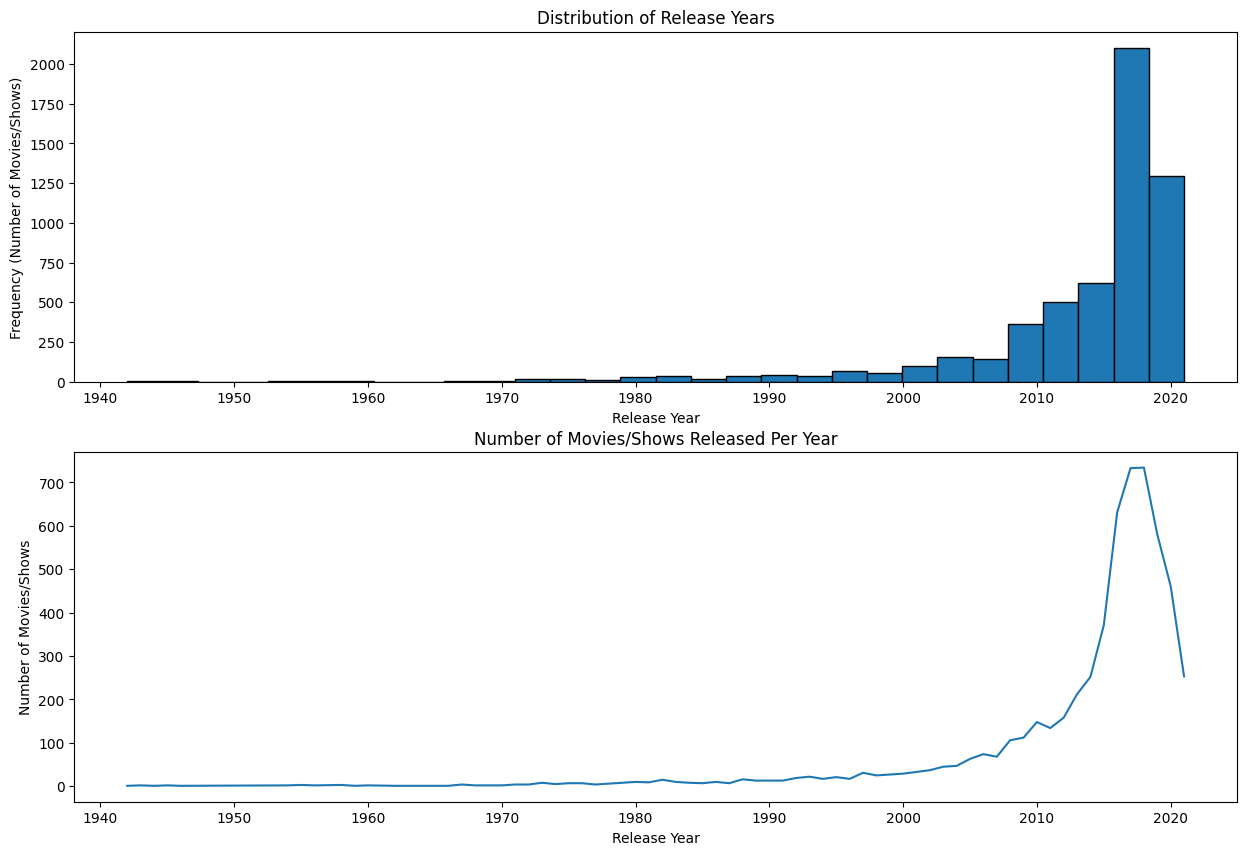

release_year  count
65          2018    734
64          2017    733
63          2016    631
66          2019    580
67          2020    461

In [100]:
# How many movies released per year.
yearly_movie_releases = df_movie.groupby('release_year')['release_year'].count().reset_index(name='count')


plt.figure(figsize=(15, 10))  # Adjust figure size if needed
plt.subplot(2,1,1)
plt.hist(df_movie['release_year'], bins=30, edgecolor='black')  # 'bins' controls bar width
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency (Number of Movies/Shows)')

plt.subplot(2,1,2)
sns.lineplot(x= 'release_year', y='count', data=yearly_movie_releases)
plt.title('Number of Movies/Shows Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/Shows')
plt.show()

yearly_movie_releases.sort_values('count', ascending =False).head()

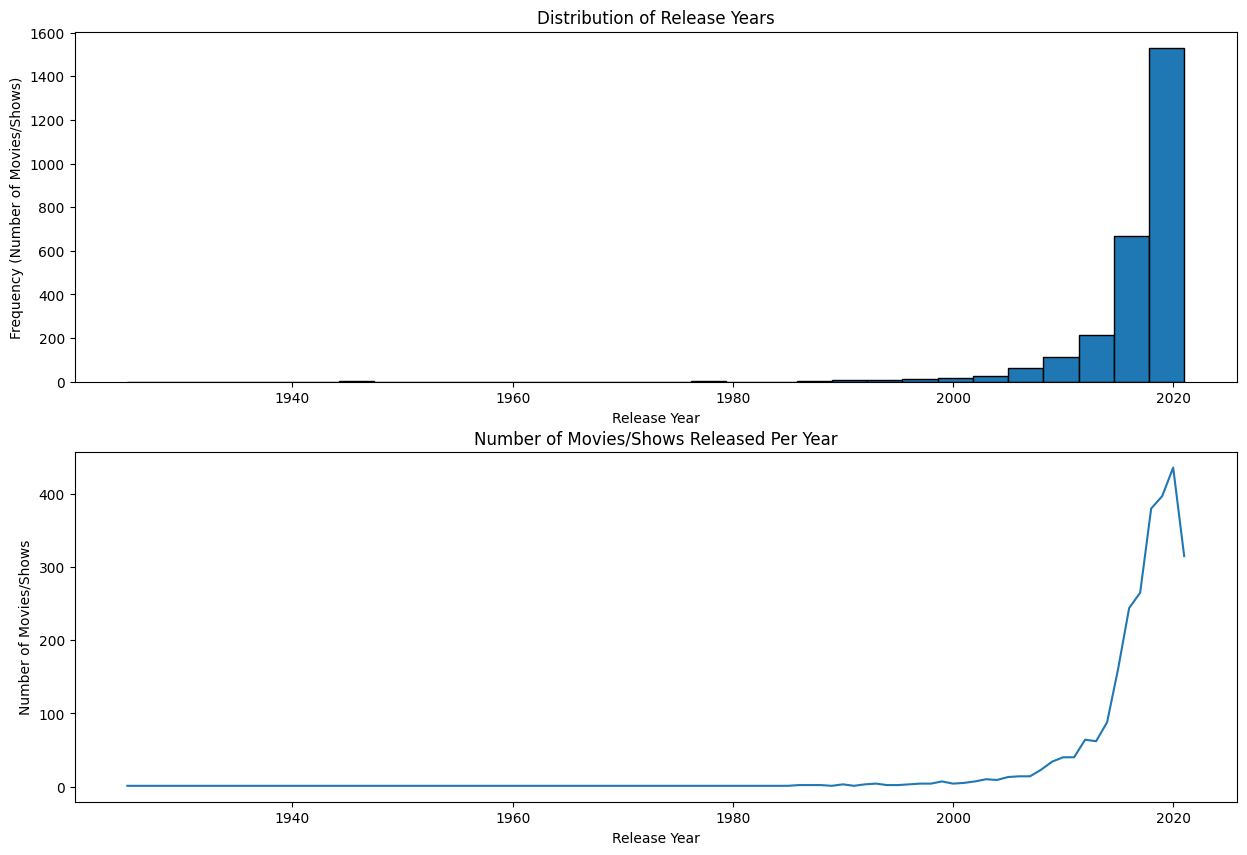

release_year  count
44          2020    436
43          2019    397
42          2018    380
45          2021    315
41          2017    265

In [101]:
# How many tv shows released per year.
yearly_tv_show_releases = df_tv_show.groupby('release_year')['release_year'].count().reset_index(name='count')


plt.figure(figsize=(15, 10))  # Adjust figure size if needed
plt.subplot(2,1,1)
plt.hist(df_tv_show['release_year'], bins=30, edgecolor='black')  # 'bins' controls bar width
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency (Number of Movies/Shows)')

plt.subplot(2,1,2)
sns.lineplot(x= 'release_year', y='count', data=yearly_tv_show_releases)
plt.title('Number of Movies/Shows Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/Shows')
plt.show()

yearly_tv_show_releases.sort_values('count', ascending =False).head()

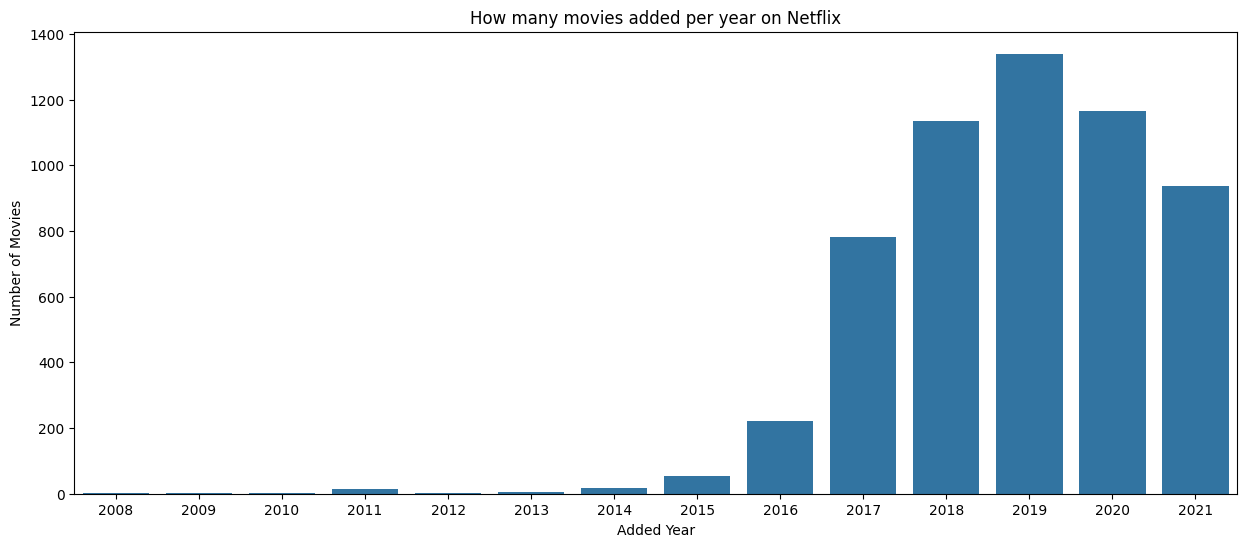

For Movies - Top 5 most added years on Netflix are:
     year_added  count
11        2019   1340
12        2020   1167
10        2018   1135
13        2021    938
9         2017    782


In [102]:
# How many movies added per year on Netflix.
added_movie_year = df_movie.groupby('year_added')['year_added'].count().reset_index(name='count').sort_values('count', ascending=False)


plt.figure(figsize=(15, 6))  # Adjust figure size if needed

sns.countplot(x= 'year_added', data=df_movie)
plt.title('How many movies added per year on Netflix')
plt.xlabel('Added Year')
plt.ylabel('Number of Movies')
plt.show()

print("For Movies - Top 5 most added years on Netflix are:\n",added_movie_year.head())

The year with highest of movies added on Netflix is 2019

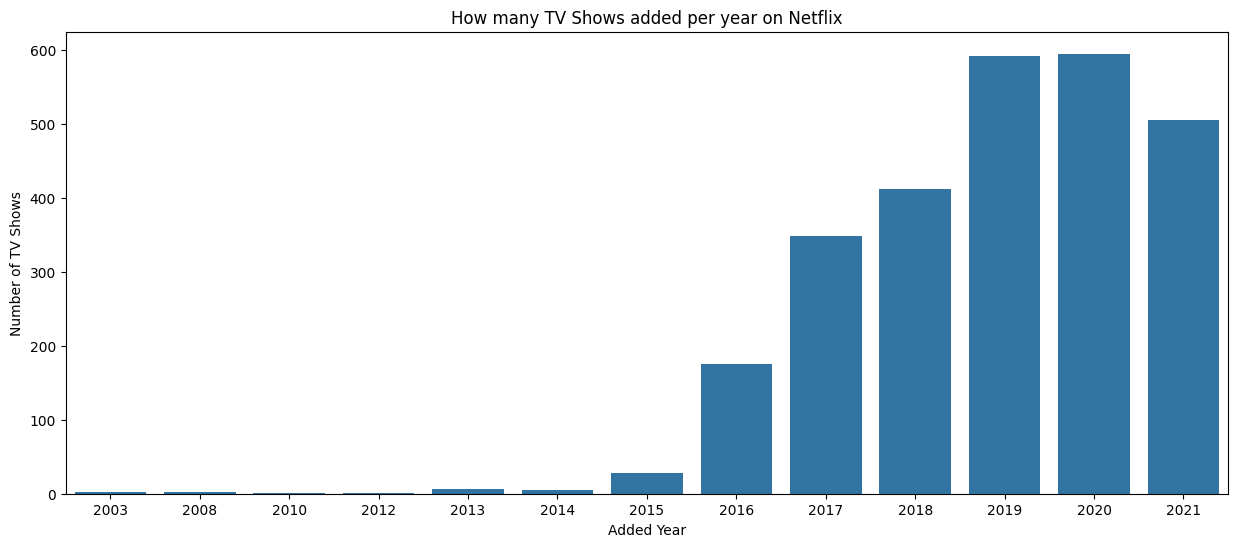

For TV Shows - Top 5 most added years on Netflix are:
     year_added  count
11        2020    595
10        2019    592
12        2021    505
9         2018    412
8         2017    349


In [103]:
# How many tv shows added per year on Netflix.
added_tv_show_year = df_tv_show.groupby('year_added')['year_added'].count().reset_index(name='count').sort_values('count', ascending=False)


plt.figure(figsize=(15, 6))  # Adjust figure size if needed

sns.countplot(x= 'year_added', data=df_tv_show)
plt.title('How many TV Shows added per year on Netflix')
plt.xlabel('Added Year')
plt.ylabel('Number of TV Shows')
plt.show()

print("For TV Shows - Top 5 most added years on Netflix are:\n",added_tv_show_year.head())

The year with highest of TV Shows added on Netflix is 2019

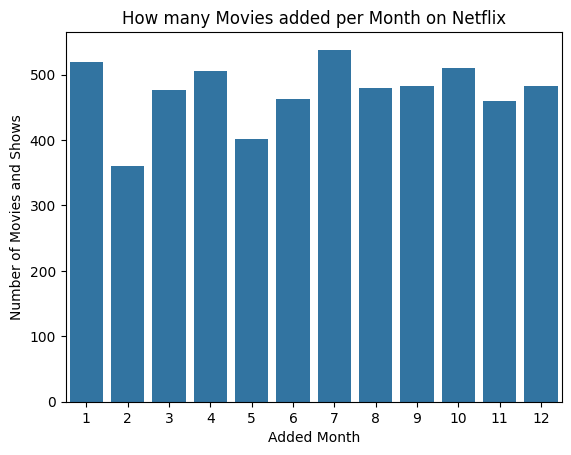

The month with the highest number of Movies added is: 7


<ipython-input-104-f0a30a9686be>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_movie_month = df_movie.groupby(['month_added','type'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False).iloc[0]['month_added']


In [104]:

sns.countplot(x= 'month_added', data=df_movie)
plt.title('How many Movies added per Month on Netflix')
plt.xlabel('Added Month')
plt.ylabel('Number of Movies and Shows')

plt.show()

max_movie_month = df_movie.groupby(['month_added','type'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False).iloc[0]['month_added']
print(f"The month with the highest number of Movies added is: {max_movie_month}") # July

The month with the highest number of Movies added is: 7 or July

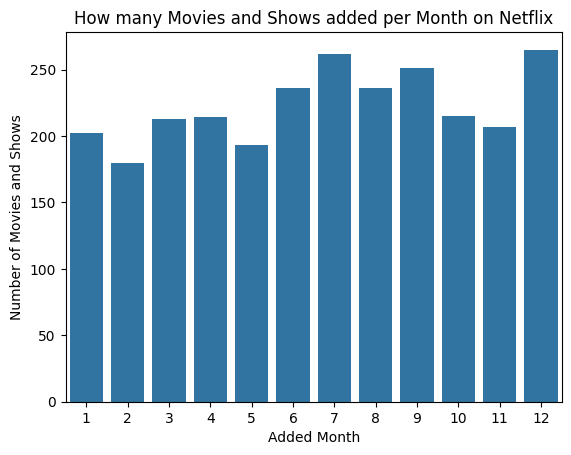

The month with the highest number of TV Shows added is: 12


<ipython-input-105-d15d917a246f>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_tv_show_month = df_tv_show.groupby(['month_added','type'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False).iloc[0]['month_added']


In [105]:
sns.countplot(x= 'month_added', data=df_tv_show)
plt.title('How many Movies and Shows added per Month on Netflix')
plt.xlabel('Added Month')
plt.ylabel('Number of Movies and Shows')

plt.show()

max_tv_show_month = df_tv_show.groupby(['month_added','type'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False).iloc[0]['month_added']
print(f"The month with the highest number of TV Shows added is: {max_tv_show_month}") # December

The month with the highest number of TV Shows added is: 12 or December

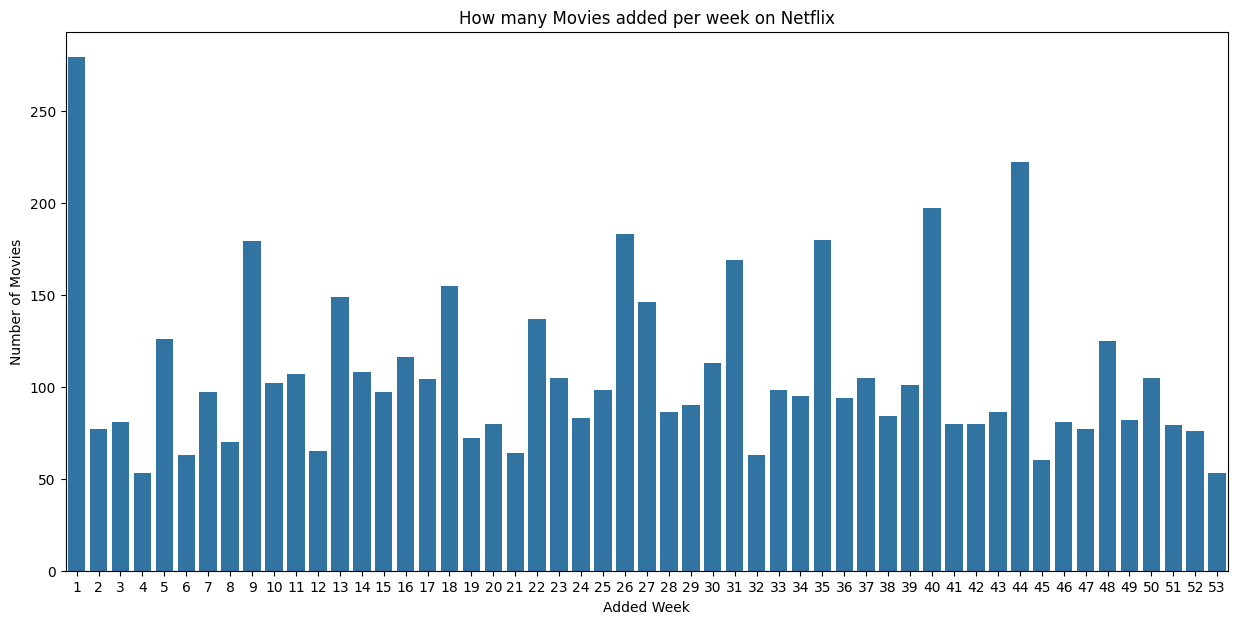

In [106]:
plt.figure(figsize=(15,7))
sns.countplot(x= 'week_added', data=df_movie)
plt.title('How many Movies added per week on Netflix')
plt.xlabel('Added Week')
plt.ylabel('Number of Movies')
plt.show()

For Movies - many movies are added in 1st week than any other week

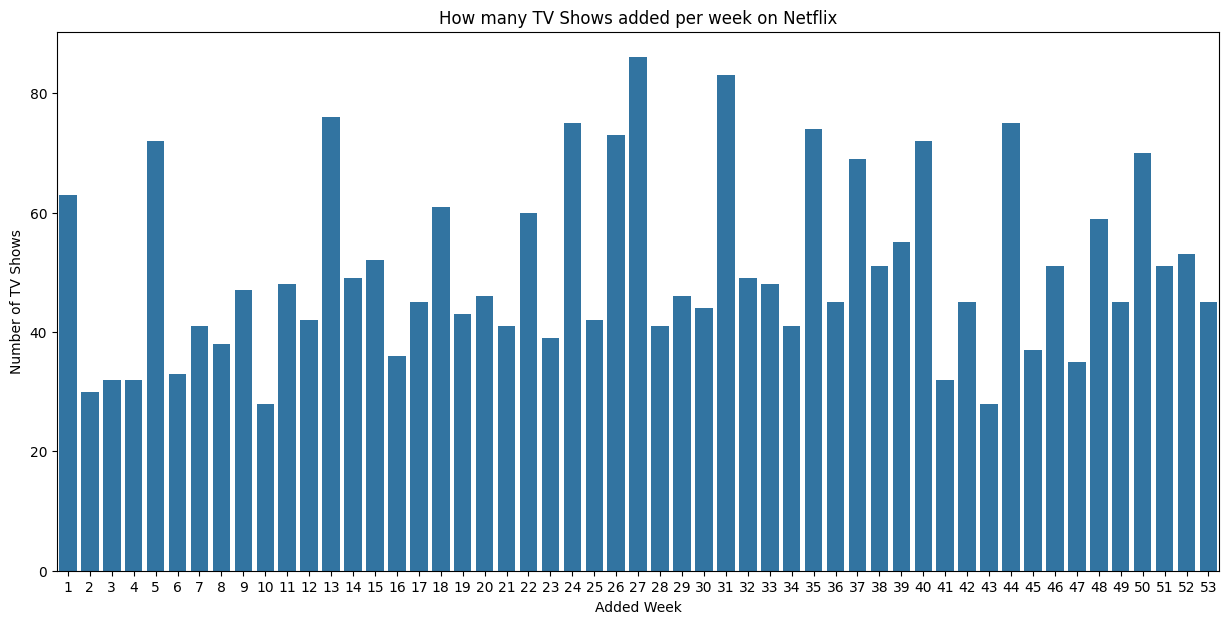

In [107]:
plt.figure(figsize=(15,7))
sns.countplot(x= 'week_added', data=df_tv_show)
plt.title('How many TV Shows added per week on Netflix')
plt.xlabel('Added Week')
plt.ylabel('Number of TV Shows')
plt.show()

For TV Shows- most of them are added in 27th week.

quarter_added
3    1500
4    1452
2    1369
1    1356
Name: count, dtype: int64 



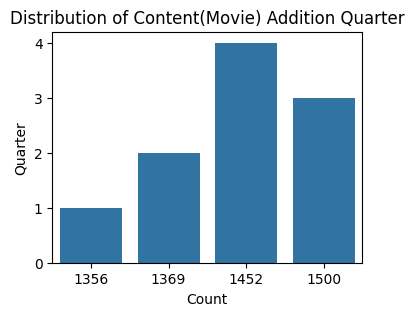


Best Quarter to release Movies is: 3


In [108]:
# Best quarter of the year for content(movie) addition based on frequency of a quarter
quarter_counts_movie  = df_movie['quarter_added'].value_counts()
print(quarter_counts_movie,'\n')

plt.figure(figsize=(4, 3))
sns.barplot(y= quarter_counts_movie.index, x= quarter_counts_movie.values)
plt.title("Distribution of Content(Movie) Addition Quarter")
plt.ylabel("Quarter")
plt.xlabel("Count")
plt.show()

print('\nBest Quarter to release Movies is:',quarter_counts.idxmax())

Best Quarter to release Movies is: 3, {July, August, September}

quarter_added
3    749
4    687
2    643
1    595
Name: count, dtype: int64 



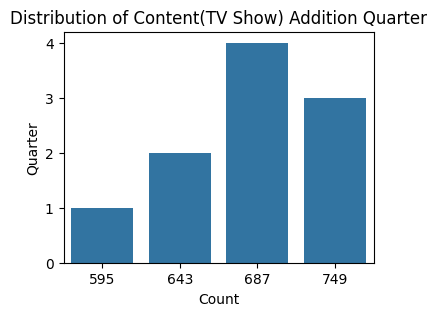


Best Quarter to release TV Shows is: 3


In [109]:
# Best quarter of the year for content(tv shows) addition based on frequency of a quarter
quarter_counts_tv_show  = df_tv_show['quarter_added'].value_counts()
print(quarter_counts_tv_show,'\n')

plt.figure(figsize=(4, 3))
sns.barplot(y= quarter_counts_tv_show.index, x= quarter_counts_tv_show.values)
plt.title("Distribution of Content(TV Show) Addition Quarter")
plt.ylabel("Quarter")
plt.xlabel("Count")
plt.show()

print('\nBest Quarter to release TV Shows is:',quarter_counts.idxmax())

Best Quarter to release TV Shows is: 3, {July, August, September}

Mean content addition delay - Movie: 5.428923727320768 years or 6 years
Median content addition delay - Movie: 2.0 years


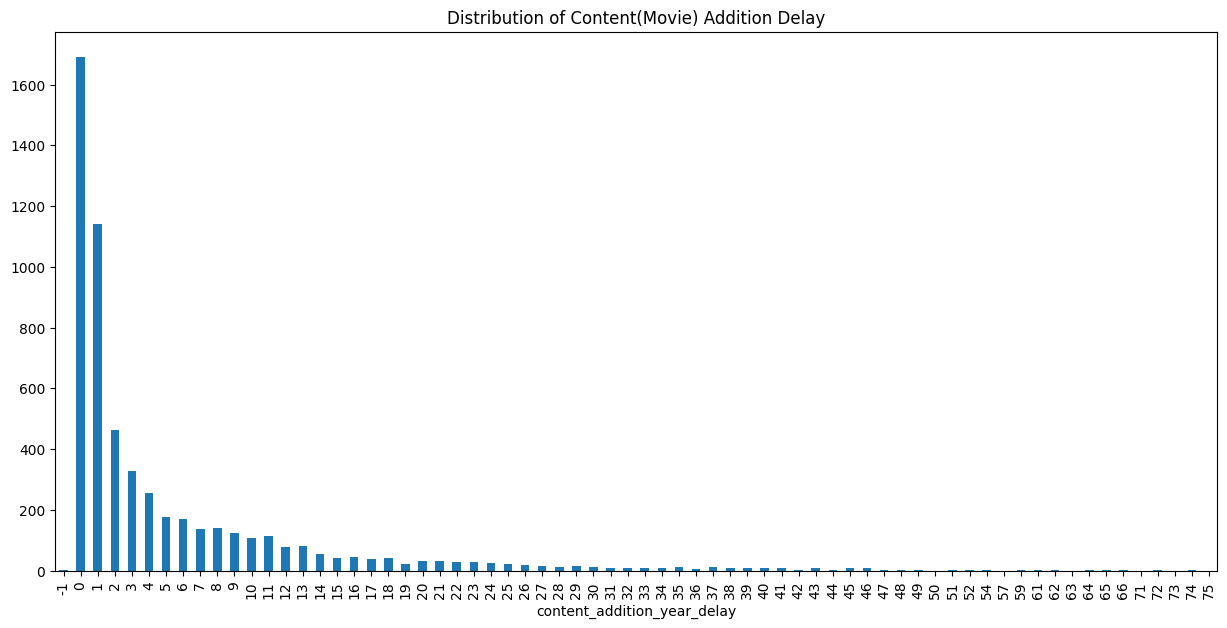

In [110]:
# Content movie addition delay value counts of years
x_movie = df_movie['content_addition_year_delay'].value_counts()
x_movie.sort_index().plot(kind='bar', title="Distribution of Content(Movie) Addition Delay", figsize=(15,7))
# caluclate the mean/median of content_addition_year_delay
mean_content_addition_delay_movie = df_movie['content_addition_year_delay'].mean()
median_content_addition_delay_movie = df_movie['content_addition_year_delay'].median()
print(f"Mean content addition delay - Movie: {mean_content_addition_delay_movie} years or {int(mean_content_addition_delay_movie)+1} years")
print(f"Median content addition delay - Movie: {median_content_addition_delay_movie} years")

Mean content addition delay - Movie: 5.42 years or 6 years
Median content addition delay - Movie: 2.0 years

Mean content addition delay - TV Show: 2.2890800299177263 years or 3 years
Median content addition delay - TV Show: 0.0 years


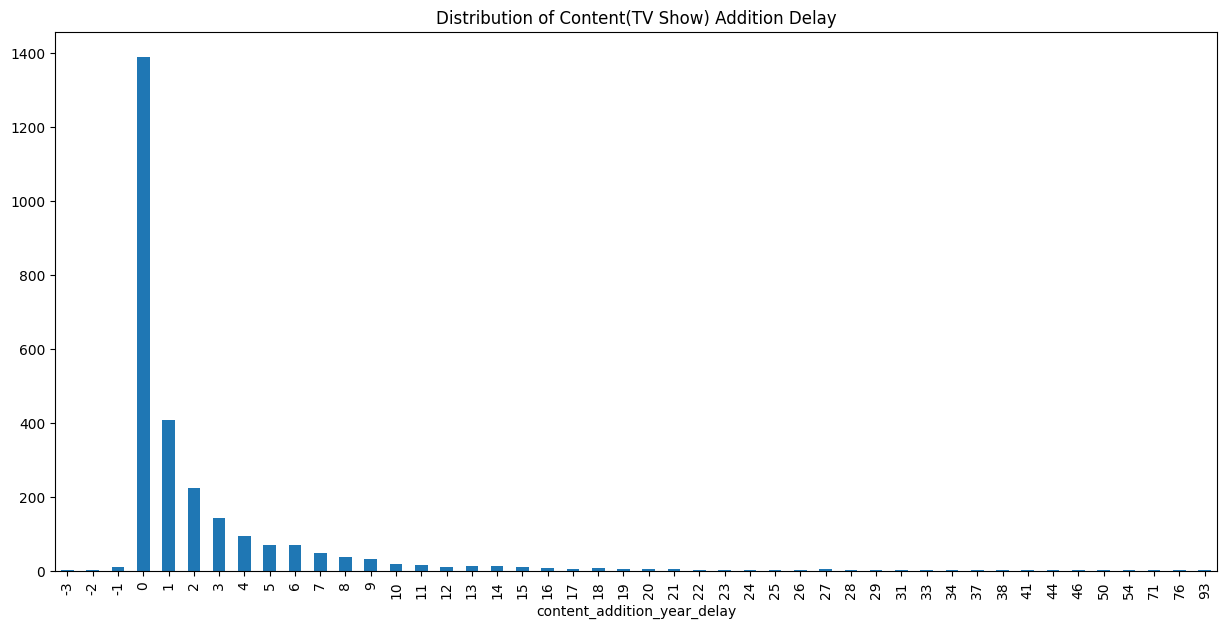

In [111]:
# Content tv show movie addition delay value counts of years
x_tv_show = df_tv_show['content_addition_year_delay'].value_counts()
x_tv_show.sort_index().plot(kind='bar', title="Distribution of Content(TV Show) Addition Delay", figsize=(15,7))
# caluclate the mean/median of content_addition_year_delay
mean_content_addition_delay_tv_show = df_tv_show['content_addition_year_delay'].mean()
median_content_addition_delay_tv_show = df_tv_show['content_addition_year_delay'].median()
print(f"Mean content addition delay - TV Show: {mean_content_addition_delay_tv_show} years or {int(mean_content_addition_delay_tv_show)+1} years")
print(f"Median content addition delay - TV Show: {median_content_addition_delay_tv_show} years")

Mean content addition delay - TV Show: 2.29 years or 3 years
Median content addition delay - TV Show: 0.0 years

                             release_year  duration  year_added  month_added  \
release_year                     1.000000 -0.133333    0.032886    -0.063150   
duration                        -0.133333  1.000000    0.141603     0.031352   
year_added                       0.032886  0.141603    1.000000    -0.162904   
month_added                     -0.063150  0.031352   -0.162904     1.000000   
quarter_added                   -0.070406  0.030432   -0.158791     0.970061   
content_addition_year_delay     -0.985379  0.156270    0.137880     0.034810   

                             quarter_added  content_addition_year_delay  
release_year                     -0.070406                    -0.985379  
duration                          0.030432                     0.156270  
year_added                       -0.158791                     0.137880  
month_added                       0.970061                     0.034810  
quarter_added                     1.000000                     0.0427

<Axes: >

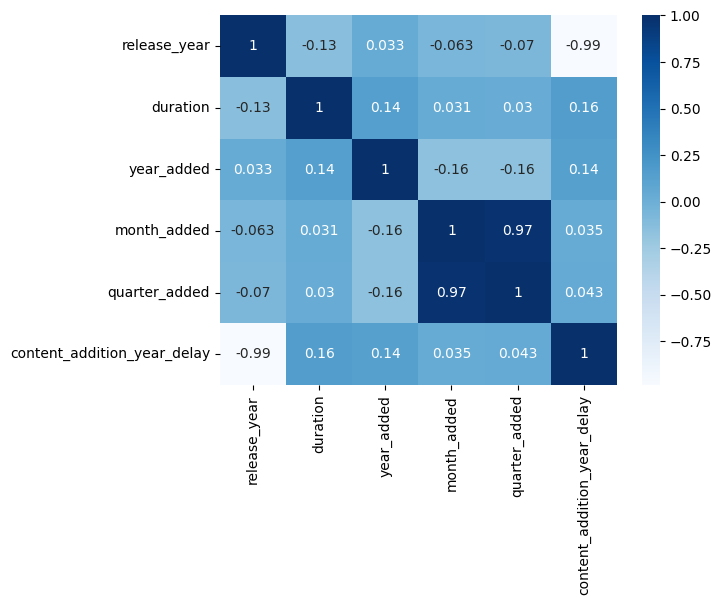

In [112]:
# Plot Correlation Heat map for Combined dataset of movies and tv shows.
num_df_movie = df_movie.select_dtypes(include=[float,int])
print(num_df_movie.corr())
sns.heatmap(num_df_movie.corr(), cmap='Blues',annot = True)

                             release_year  duration  year_added  month_added  \
release_year                     1.000000 -0.090374    0.390487    -0.015953   
duration                        -0.090374  1.000000   -0.009877    -0.016589   
year_added                       0.390487 -0.009877    1.000000    -0.123756   
month_added                     -0.015953 -0.016589   -0.123756     1.000000   
quarter_added                   -0.022062 -0.014151   -0.125995     0.969655   
content_addition_year_delay     -0.956088  0.094496   -0.103527    -0.022162   

                             quarter_added  content_addition_year_delay  
release_year                     -0.022062                    -0.956088  
duration                         -0.014151                     0.094496  
year_added                       -0.125995                    -0.103527  
month_added                       0.969655                    -0.022162  
quarter_added                     1.000000                    -0.0162

<Axes: >

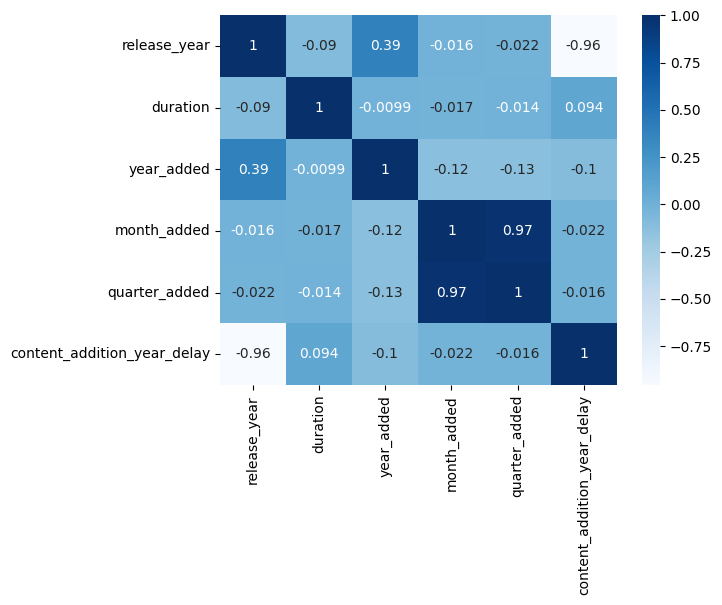

In [113]:
# Plot Correlation Heat map for Combined dataset of movies and tv shows.
num_df_tv_show = df_tv_show.select_dtypes(include=[float,int])
print(num_df_tv_show.corr())
sns.heatmap(num_df_tv_show.corr(), cmap='Blues',annot = True)

Correlations for movies and tv shows dataset are nearly same as combined dataset, only quarter added and month_added are strongly correlated, they also cause eachother.

Now we will Split and Explode on columns like country, listed_in, cast, director in different datasets.

In [114]:
df_movie_listed_in = df_movie.copy()
df_movie_country = df_movie.copy()
df_movie_director = df_movie.copy()
df_movie_cast = df_movie.copy()

df_tv_show_listed_in = df_tv_show.copy()
df_tv_show_country = df_tv_show.copy()
df_tv_show_director = df_tv_show.copy()
df_tv_show_cast = df_tv_show.copy()

Split and analyze listed_in for multi-genre analysis.

In [115]:

df_movie_listed_in['listed_in'] = df_movie_listed_in['listed_in'].str.split(', ')
df_movie_listed_in = df_movie_listed_in.explode('listed_in')
df_movie_listed_in.head()

show_id   type                             title  \
0      s1  Movie              Dick Johnson Is Dead   
6      s7  Movie  My Little Pony: A New Generation   
7      s8  Movie                           Sankofa   
7      s8  Movie                           Sankofa   
7      s8  Movie                           Sankofa   

                        director  \
0                Kirsten Johnson   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   
7                   Haile Gerima   
7                   Haile Gerima   

                                                cast  \
0                                            Unknown   
6  Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   

                                             country date_added  release_year  \
0                                      United States 2021-09-25          2020   
6                                            Unknown 2021-09-24          2021   
7  United States, Ghana, Burkina Faso, United Kin... 2021-09-24          1993   
7  United States, Ghana, Burkina Faso, United Kin... 2021-09-24          1993   
7  United States, Ghana, Burkina Faso, United Kin... 2021-09-24          1993   

  rating  duration                 listed_in  year_added  month_added  \
0  PG-13        90             Documentaries        2021            9   
6     PG        91  Children & Family Movies        2021            9   
7  TV-MA       125                    Dramas        2021            9   
7  TV-MA       125        Independent Movies        2021            9   
7  TV-MA       125      International Movies        2021            9   

   week_added  quarter_added  content_addition_year_delay  
0          38              3                            1  
6          38              3                            0  
7          38              3                           28  
7          38              3                           28  
7          38              3                           28

In [116]:
df_tv_show_listed_in['listed_in'] = df_tv_show_listed_in['listed_in'].str.split(', ')
df_tv_show_listed_in = df_tv_show_listed_in.explode('listed_in')
df_tv_show_listed_in.head()

show_id     type          title         director  \
1      s2  TV Show  Blood & Water          Unknown   
1      s2  TV Show  Blood & Water          Unknown   
1      s2  TV Show  Blood & Water          Unknown   
2      s3  TV Show      Ganglands  Julien Leclercq   
2      s3  TV Show      Ganglands  Julien Leclercq   

                                                cast       country date_added  \
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  South Africa 2021-09-24   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  South Africa 2021-09-24   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  South Africa 2021-09-24   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...       Unknown 2021-09-24   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...       Unknown 2021-09-24   

   release_year rating  duration               listed_in  year_added  \
1          2021  TV-MA         2  International TV Shows        2021   
1          2021  TV-MA         2               TV Dramas        2021   
1          2021  TV-MA         2            TV Mysteries        2021   
2          2021  TV-MA         1          Crime TV Shows        2021   
2          2021  TV-MA         1  International TV Shows        2021   

   month_added  week_added  quarter_added  content_addition_year_delay  
1            9          38              3                            0  
1            9          38              3                            0  
1            9          38              3                            0  
2            9          38              3                            0  
2            9          38              3                            0

listed_in
International Movies        2562
Dramas                      2251
Comedies                    1582
Documentaries                788
Action & Adventure           781
Independent Movies           741
Romantic Movies              591
Thrillers                    567
Children & Family Movies     544
Horror Movies                354
Music & Musicals             343
Stand-Up Comedy              333
Sci-Fi & Fantasy             232
Sports Movies                208
LGBTQ Movies                  96
Classic Movies                94
Anime Features                67
Cult Movies                   67
Faith & Spirituality          60
Movies                        23
Name: count, dtype: int64


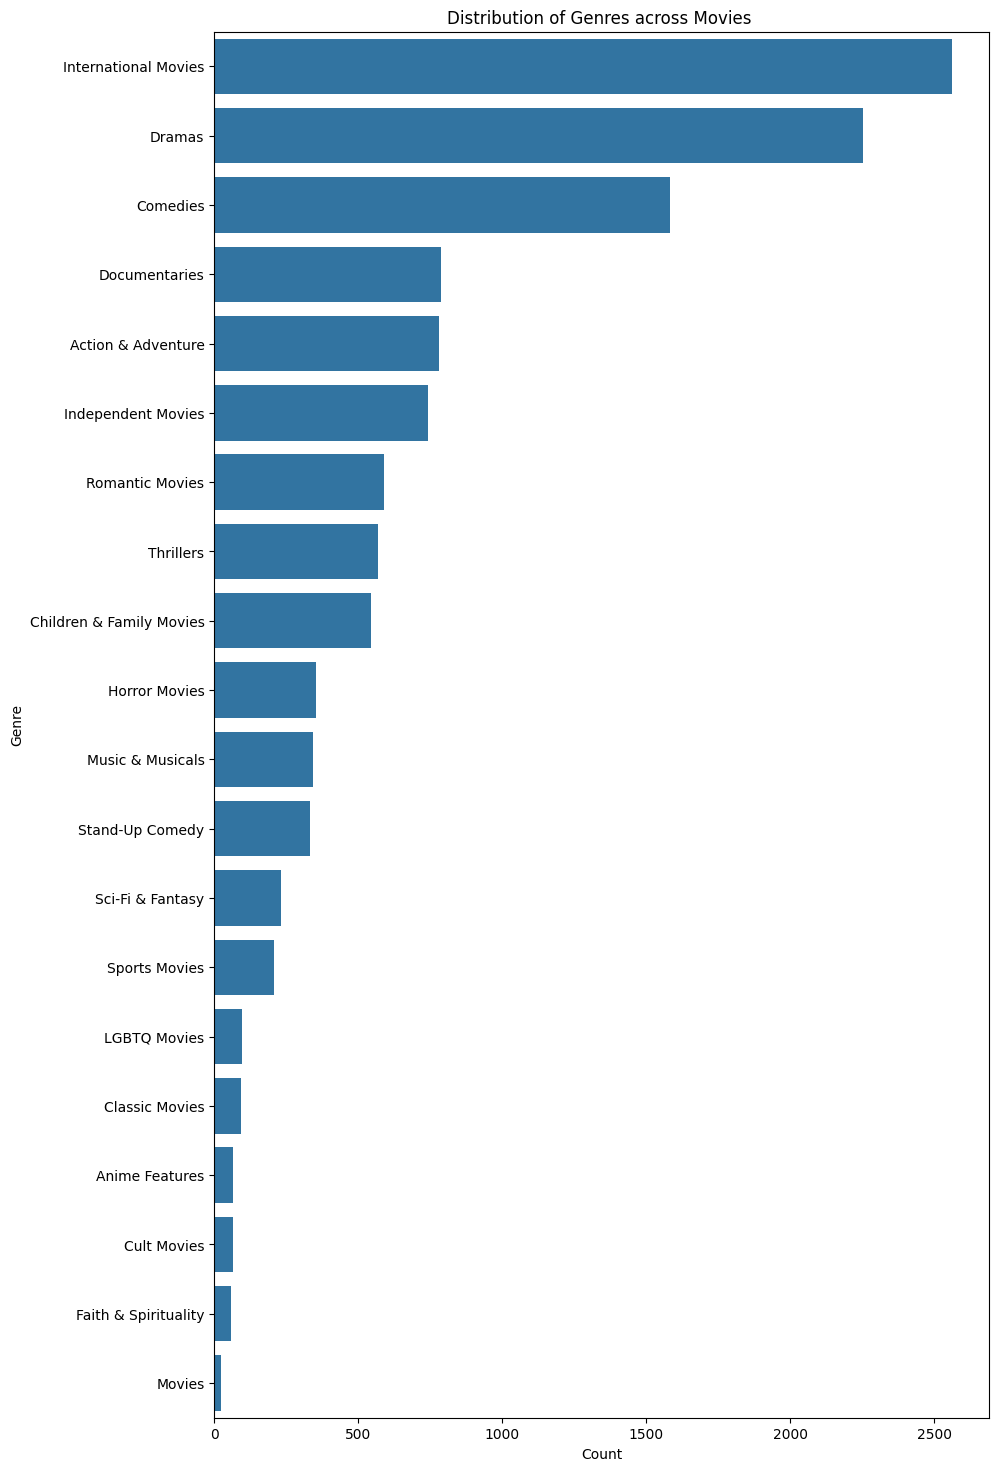

Top 10 Movie Genres are: listed_in
International Movies        2562
Dramas                      2251
Comedies                    1582
Documentaries                788
Action & Adventure           781
Independent Movies           741
Romantic Movies              591
Thrillers                    567
Children & Family Movies     544
Horror Movies                354
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Popular Movie Genres'}, xlabel='listed_in'>

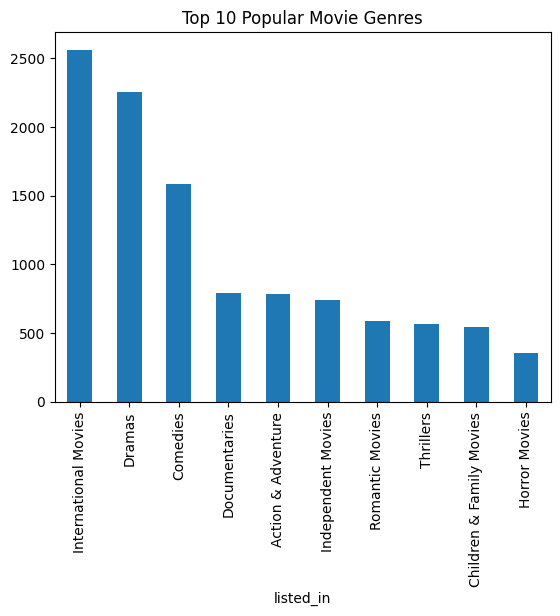

In [117]:
# caluclating frequency of genres and plotting them
genre_counts_movie = df_movie_listed_in['listed_in'].value_counts()
print(genre_counts_movie)

plt.figure(figsize=(10, 18))
sns.barplot(y= genre_counts_movie.index, x= genre_counts_movie.values)
plt.title("Distribution of Genres across Movies ")
plt.ylabel("Genre")
plt.xlabel("Count")
plt.show()

# Top 5 Genres
top_10_genres_movie = genre_counts_movie.head(10)
print('Top 10 Movie Genres are:',top_10_genres_movie)
top_10_genres_movie.plot(kind='bar', title="Top 10 Popular Movie Genres")

Top5 Movie genres are International Movies, Dramas, Comedies, Documentaries, Action & Adventure.

listed_in
International TV Shows          1350
TV Dramas                        763
TV Comedies                      580
Crime TV Shows                   470
Kids' TV                         450
Docuseries                       395
Romantic TV Shows                370
Reality TV                       255
British TV Shows                 253
Anime Series                     175
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
TV Mysteries                      98
Science & Nature TV               92
TV Sci-Fi & Fantasy               84
TV Horror                         75
Teen TV Shows                     69
TV Thrillers                      57
Stand-Up Comedy & Talk Shows      56
Classic & Cult TV                 28
TV Shows                          16
Name: count, dtype: int64


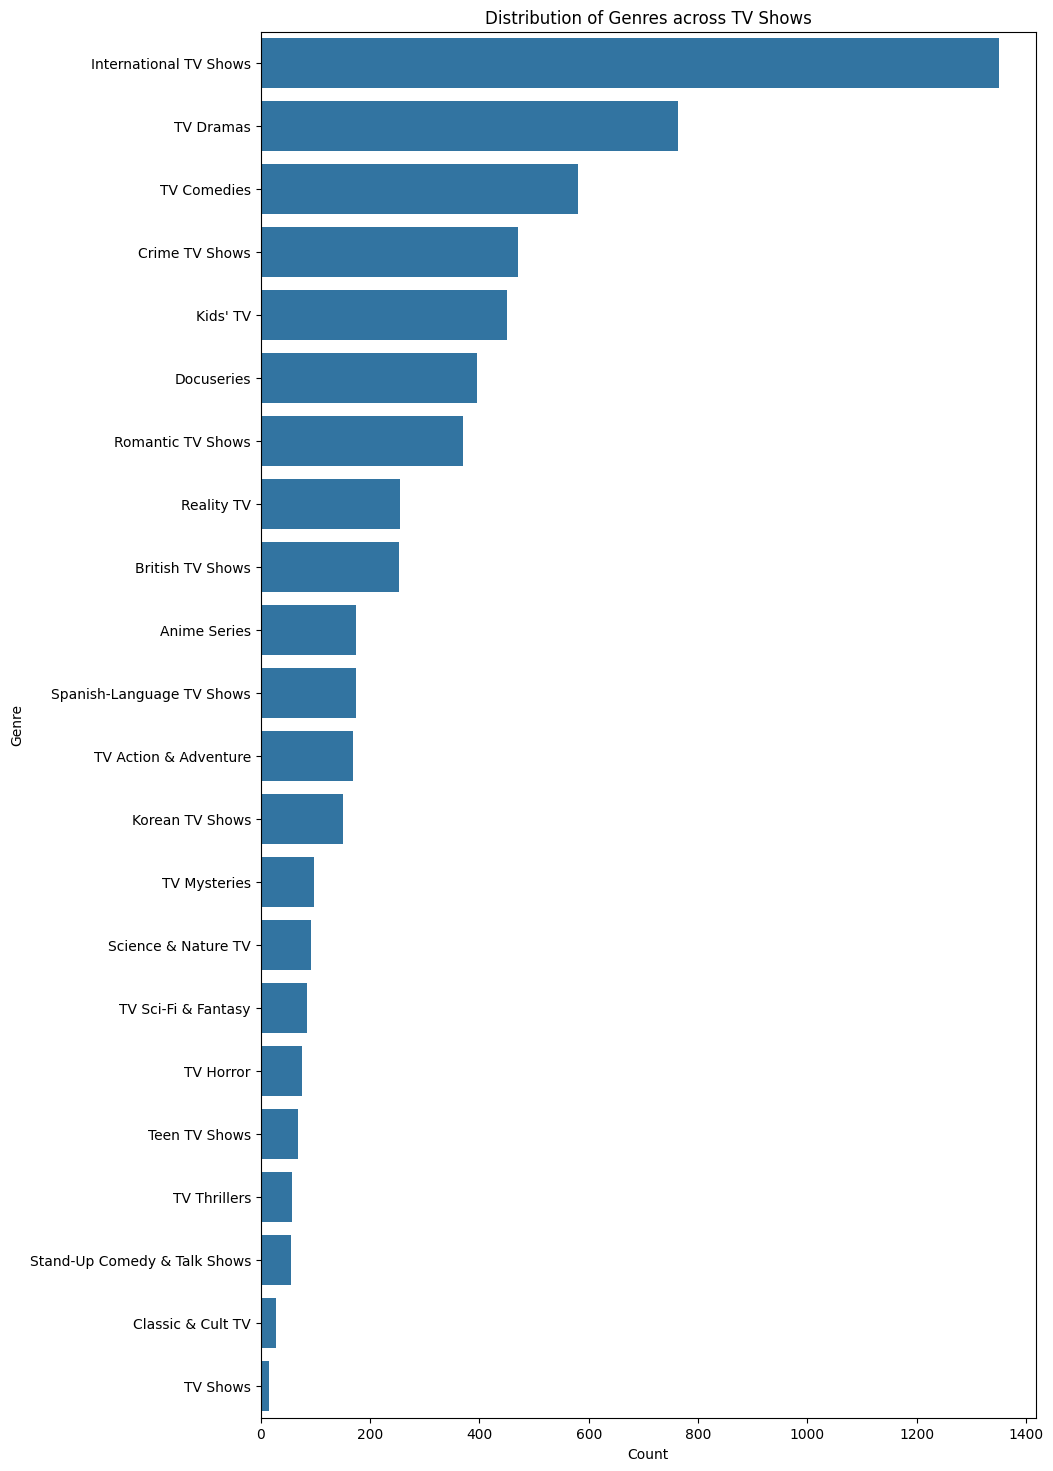

Top 10 TV Show Genres are: listed_in
International TV Shows    1350
TV Dramas                  763
TV Comedies                580
Crime TV Shows             470
Kids' TV                   450
Docuseries                 395
Romantic TV Shows          370
Reality TV                 255
British TV Shows           253
Anime Series               175
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Popular TV Show Genres'}, xlabel='listed_in'>

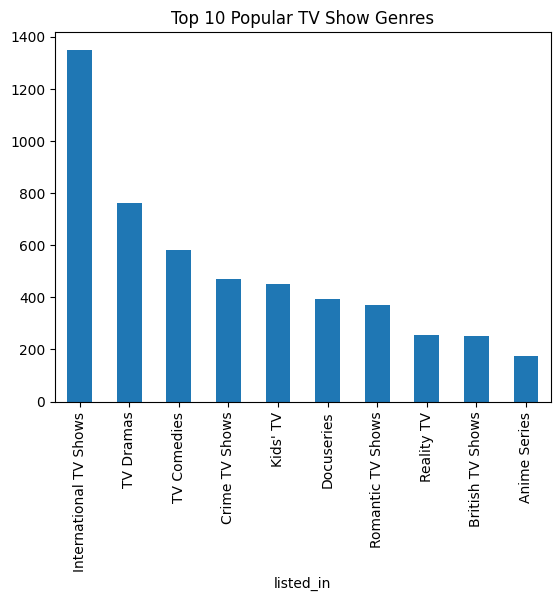

In [118]:
# caluclating frequency of genres and plotting them
genre_counts_tv_show = df_tv_show_listed_in['listed_in'].value_counts()
print(genre_counts_tv_show)

plt.figure(figsize=(10, 18))
sns.barplot(y= genre_counts_tv_show.index, x= genre_counts_tv_show.values)
plt.title("Distribution of Genres across TV Shows")
plt.ylabel("Genre")
plt.xlabel("Count")
plt.show()

# Top 5 Genres
top_10_genres_tv_show = genre_counts_tv_show.head(10)
print('Top 10 TV Show Genres are:',top_10_genres_tv_show)
top_10_genres_tv_show.plot(kind='bar', title="Top 10 Popular TV Show Genres")

Top5 TV Show Genres are International TV Shows, TV Dramas, TV Comedies, Crime Tv Shows, Kids TV.

<ipython-input-119-31422fdb9309>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_movie_listed_in_rating = df_movie_listed_in.groupby(['rating', 'listed_in'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)



Movie - Genre and Rating Count
    rating             listed_in  count
171  TV-MA  International Movies   1097
131  TV-14  International Movies    960
167  TV-MA                Dramas    801
127  TV-14                Dramas    598
164  TV-MA              Comedies    422
..     ...                   ...    ...
73      PG                Movies      0
72      PG          LGBTQ Movies      0
56      NR      Sci-Fi & Fantasy      0
53      NR                Movies      0
279     UR             Thrillers      0

[280 rows x 3 columns]


Text(0, 0.5, 'Rating Count')

<Figure size 1500x600 with 0 Axes>

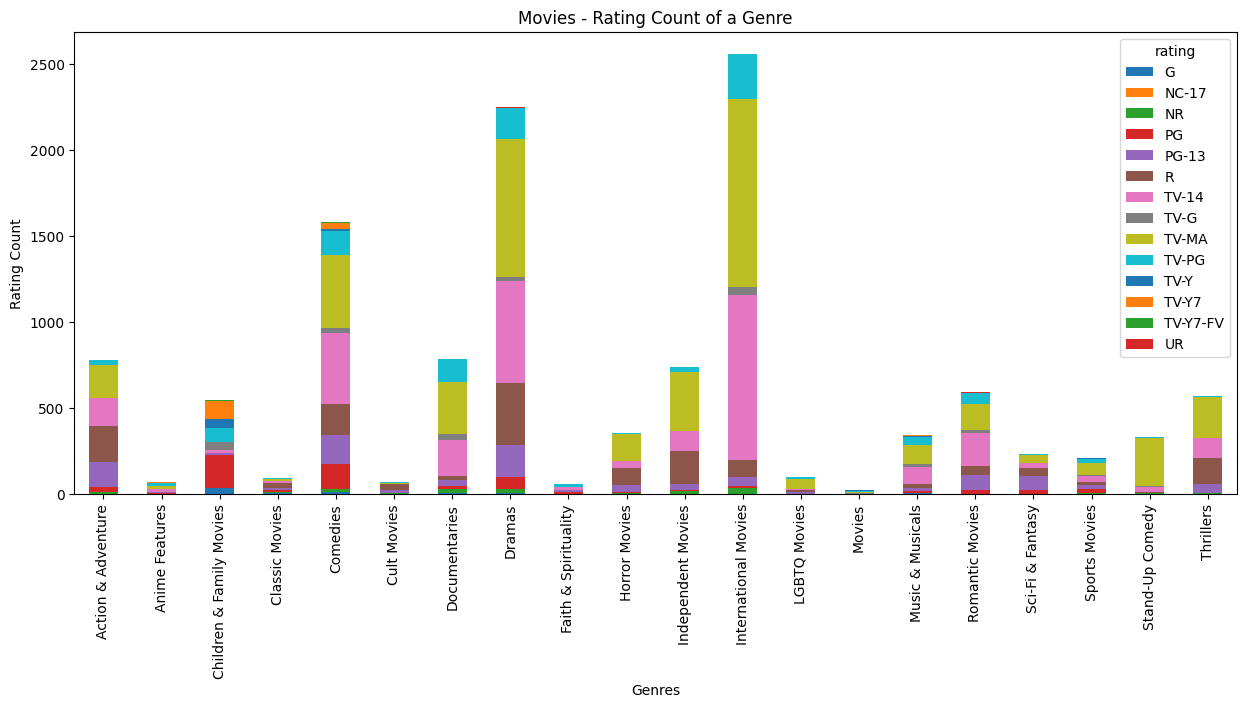

In [119]:
# plotting for relation between rating and listed_in
df_movie_listed_in_rating = df_movie_listed_in.groupby(['rating', 'listed_in'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)
print("\nMovie - Genre and Rating Count")
print(df_movie_listed_in_rating)

plt.figure(figsize=(15, 6))
df_movie_stacked_plot = pd.crosstab(index=df_movie_listed_in['listed_in'], columns=df_movie_listed_in['rating'])
df_movie_stacked_plot.plot(kind='bar', stacked=True, figsize=(15, 6))

plt.title('Movies - Rating Count of a Genre')
plt.xlabel('Genres')
plt.ylabel('Rating Count')

From the above cell, TV-MA, TV-14 are the top2 Ratings and International Movies, Dramas are the top2 movie Genres.

<ipython-input-120-84fd38955275>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tv_show_listed_in_rating = df_tv_show_listed_in.groupby(['rating', 'listed_in'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)



TV Show - Genre and Rating Count
    rating                  listed_in  count
181  TV-MA     International TV Shows    714
137  TV-14     International TV Shows    472
191  TV-MA                  TV Dramas    434
179  TV-MA             Crime TV Shows    350
190  TV-MA                TV Comedies    269
..     ...                        ...    ...
96   PG-13                 Reality TV      0
97   PG-13          Romantic TV Shows      0
98   PG-13        Science & Nature TV      0
99   PG-13  Spanish-Language TV Shows      0
307     UR              Teen TV Shows      0

[308 rows x 3 columns]


Text(0, 0.5, 'Rating Count')

<Figure size 1500x600 with 0 Axes>

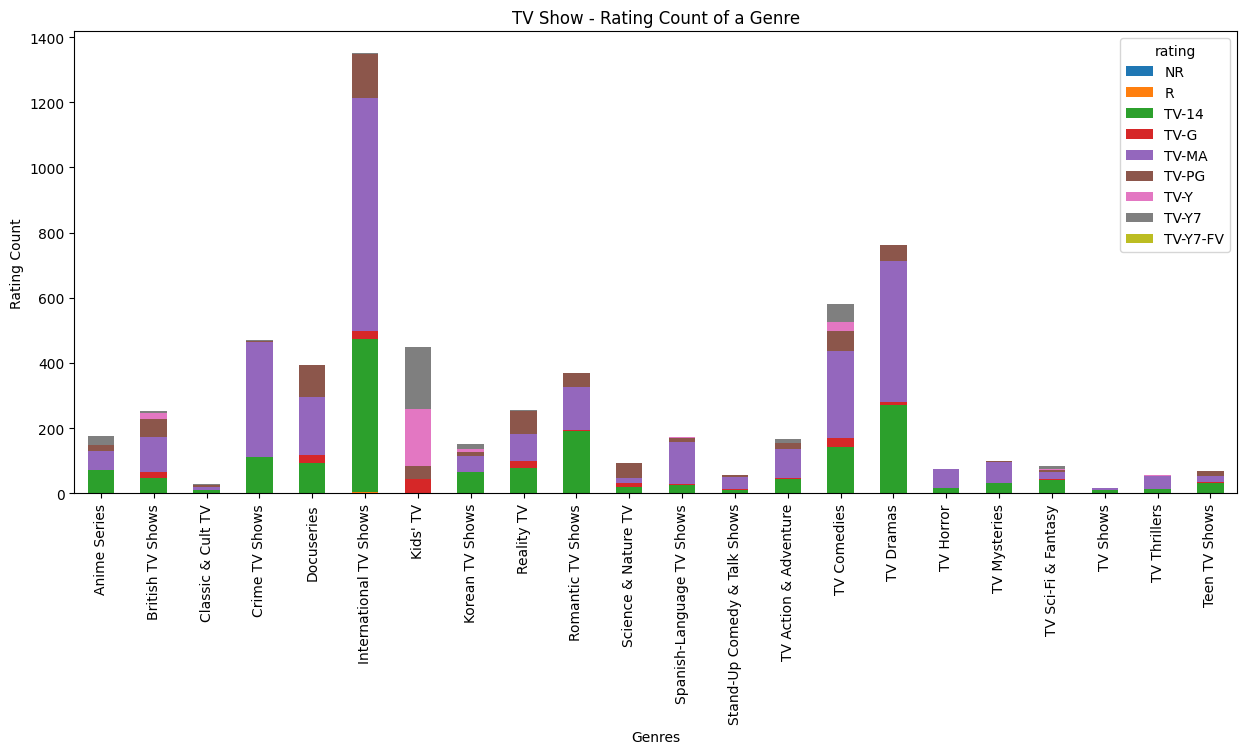

In [120]:
# plotting for relation between rating and listed_in
df_tv_show_listed_in_rating = df_tv_show_listed_in.groupby(['rating', 'listed_in'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)
print("\nTV Show - Genre and Rating Count")
print(df_tv_show_listed_in_rating)

plt.figure(figsize=(15, 6))
df_tv_show_stacked_plot = pd.crosstab(index=df_tv_show_listed_in['listed_in'], columns=df_tv_show_listed_in['rating'])
df_tv_show_stacked_plot.plot(kind='bar', stacked=True, figsize=(15, 6))

plt.title('TV Show - Rating Count of a Genre')
plt.xlabel('Genres')
plt.ylabel('Rating Count')

From the above cell, TV-MA, TV-14 are the top2 Ratings and International TV Shows, TV Dramas are the top2 Genres.


Movie - Genre and Release year counts
     release_year             listed_in  count
671          2018  International Movies    325
651          2017  International Movies    314
633          2016  International Movies    299
667          2018                Dramas    294
647          2017                Dramas    274
..            ...                   ...    ...
241          1990         Horror Movies      1
234          1989       Stand-Up Comedy      1
233          1989         Sports Movies      1
226          1988         Sports Movies      1
365          2000  Faith & Spirituality      1

[731 rows x 3 columns]


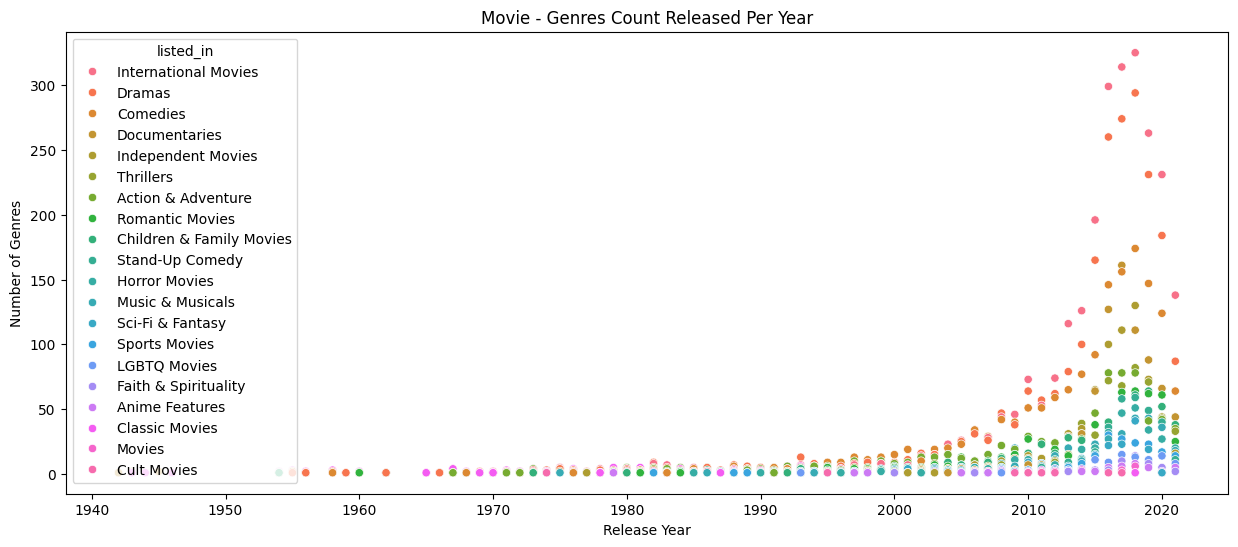

In [121]:
# plotting for relation between release_year and listed_in
df_movie_listed_in_release_year = df_movie_listed_in.groupby(['release_year', 'listed_in'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)
print("\nMovie - Genre and Release year counts")
print(df_movie_listed_in_release_year)

plt.figure(figsize=(15, 6))

sns.scatterplot(x= 'release_year', y='count', data=df_movie_listed_in_release_year, hue = 'listed_in')
plt.title('Movie - Genres Count Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Genres')
plt.show()

From the above cell, the top  movie Genre released in the year 2018 is International Movies and then Dramas.

As the year increases released movies increases, exponentially after the year 2000.


TV Show - Genre and Release year counts
     release_year               listed_in  count
381          2020  International TV Shows    214
359          2019  International TV Shows    201
338          2018  International TV Shows    190
402          2021  International TV Shows    149
316          2017  International TV Shows    136
..            ...                     ...    ...
108          2004             TV Comedies      1
107          2004   TV Action & Adventure      1
287          2015                TV Shows      1
102          2004          Crime TV Shows      1
0            1925                TV Shows      1

[419 rows x 3 columns]


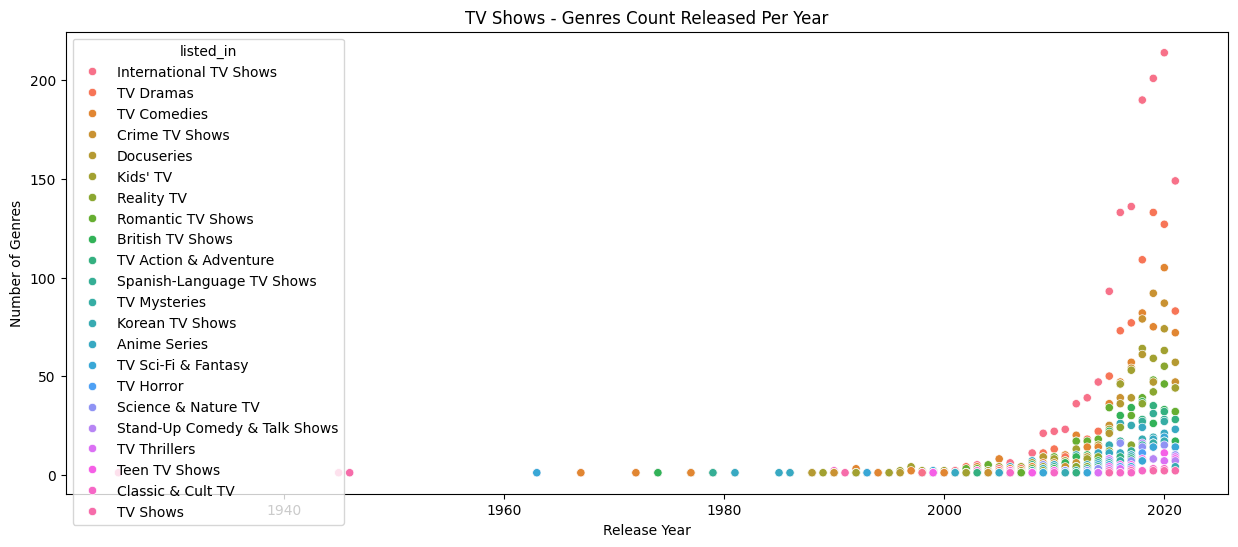

In [122]:
# plotting for relation between release_year and listed_in
df_tv_show_listed_in_release_year = df_tv_show_listed_in.groupby(['release_year', 'listed_in'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)
print("\nTV Show - Genre and Release year counts")
print(df_tv_show_listed_in_release_year)

plt.figure(figsize=(15, 6))

sns.scatterplot(x= 'release_year', y='count', data=df_tv_show_listed_in_release_year, hue = 'listed_in')
plt.title('TV Shows - Genres Count Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Genres')
plt.show()

From the above cell, the top TV Genre released in the year 2018 is International Movies.

As the year increases released movies increases, exponentially after the year 2000.


Movie - Genre and Added year counts
     year_added             listed_in  count
96         2018  International Movies    616
116        2019  International Movies    573
112        2019                Dramas    533
136        2020  International Movies    527
92         2018                Dramas    490
..          ...                   ...    ...
38         2015          LGBTQ Movies      1
26         2014                Movies      1
28         2014         Sports Movies      1
30         2015    Action & Adventure      1
0          2008                Dramas      1

[165 rows x 3 columns]


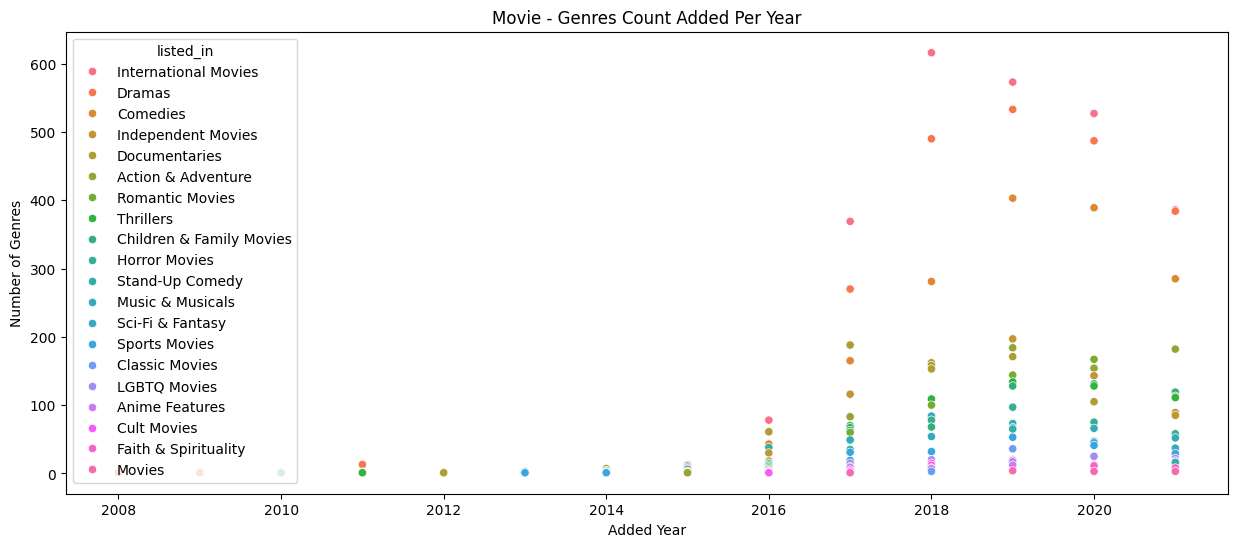

In [123]:
# plotting for relation between year_added and listed_in
df_movie_listed_in_year_added = df_movie_listed_in.groupby(['year_added', 'listed_in'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)
print("\nMovie - Genre and Added year counts")
print(df_movie_listed_in_year_added)

plt.figure(figsize=(15, 6))

sns.scatterplot(x= 'year_added', y='count', data=df_movie_listed_in_year_added, hue = 'listed_in')
plt.title('Movie - Genres Count Added Per Year')
plt.xlabel('Added Year')
plt.ylabel('Number of Genres')
plt.show()



From the above cell, the top Genre added in the year 2018, 2019 & 2020 is International Movies and then Dramas.

As the year increases released movies increases, exponentially after the year 2000.



TV Show - Genre and Added year counts
     year_added               listed_in  count
112        2019  International TV Shows    335
134        2020  International TV Shows    277
156        2021  International TV Shows    229
90         2018  International TV Shows    214
68         2017  International TV Shows    205
..          ...                     ...    ...
40         2015            TV Thrillers      1
25         2014            TV Thrillers      1
27         2015       Classic & Cult TV      1
28         2015          Crime TV Shows      1
14         2013             TV Comedies      1

[173 rows x 3 columns]


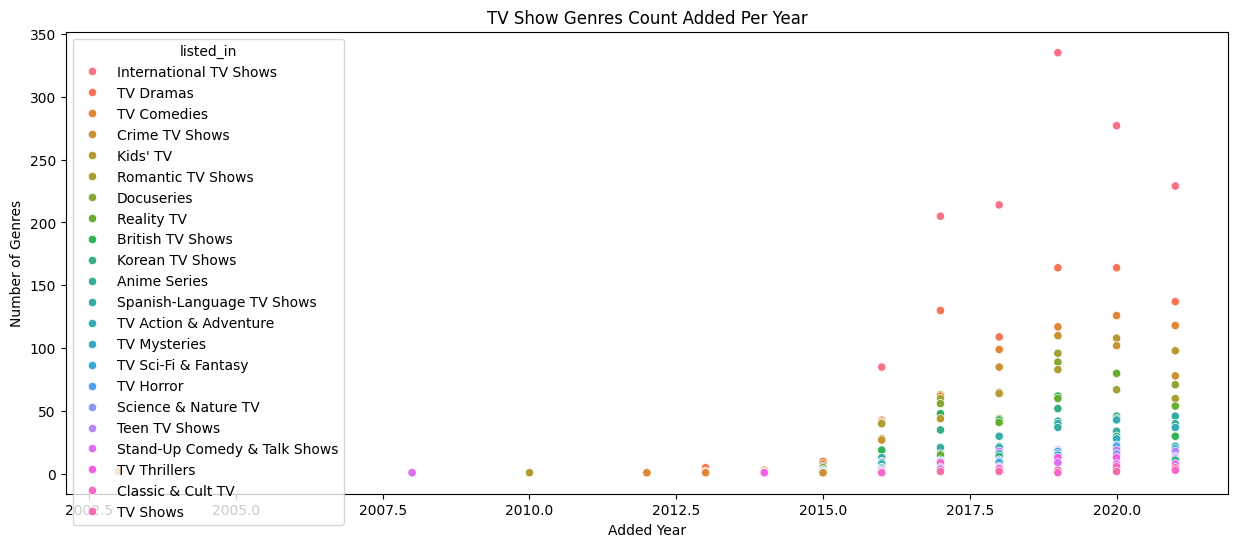

In [124]:
# plotting for relation between year_added and listed_in
df_tv_show_listed_in_year_added = df_tv_show_listed_in.groupby(['year_added', 'listed_in'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)
print("\nTV Show - Genre and Added year counts")

print(df_tv_show_listed_in_year_added)

plt.figure(figsize=(15, 6))

sns.scatterplot(x= 'year_added', y='count', data=df_tv_show_listed_in_year_added, hue = 'listed_in')
plt.title('TV Show Genres Count Added Per Year')
plt.xlabel('Added Year')
plt.ylabel('Number of Genres')
plt.show()



From the above cell, the top Genre added in the year 2018, 2019 & 2020 is International TV Shows.

As the year increases released movies increases, exponentially.

In [125]:
# Split and analyze country for region analysis.
df_movie_country['country'] = df_movie_country['country'].str.split(', ')
df_movie_country = df_movie_country.explode('country')
df_movie_country.head()

show_id   type                             title  \
0      s1  Movie              Dick Johnson Is Dead   
6      s7  Movie  My Little Pony: A New Generation   
7      s8  Movie                           Sankofa   
7      s8  Movie                           Sankofa   
7      s8  Movie                           Sankofa   

                        director  \
0                Kirsten Johnson   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   
7                   Haile Gerima   
7                   Haile Gerima   

                                                cast        country  \
0                                            Unknown  United States   
6  Vanessa Hudgens, Kimiko Glenn, James Marsden, ...        Unknown   
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...  United States   
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...          Ghana   
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   Burkina Faso   

  date_added  release_year rating  duration  \
0 2021-09-25          2020  PG-13        90   
6 2021-09-24          2021     PG        91   
7 2021-09-24          1993  TV-MA       125   
7 2021-09-24          1993  TV-MA       125   
7 2021-09-24          1993  TV-MA       125   

                                          listed_in  year_added  month_added  \
0                                     Documentaries        2021            9   
6                          Children & Family Movies        2021            9   
7  Dramas, Independent Movies, International Movies        2021            9   
7  Dramas, Independent Movies, International Movies        2021            9   
7  Dramas, Independent Movies, International Movies        2021            9   

   week_added  quarter_added  content_addition_year_delay  
0          38              3                            1  
6          38              3                            0  
7          38              3                           28  
7          38              3                           28  
7          38              3                           28

In [126]:
df_tv_show_country['country'] = df_tv_show_country['country'].str.split(', ')
df_tv_show_country = df_tv_show_country.explode('country')
df_tv_show_country.head()

show_id     type                  title         director  \
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   
5      s6  TV Show          Midnight Mass    Mike Flanagan   

                                                cast       country date_added  \
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  South Africa 2021-09-24   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...       Unknown 2021-09-24   
3                                            Unknown       Unknown 2021-09-24   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...         India 2021-09-24   
5  Kate Siegel, Zach Gilford, Hamish Linklater, H...       Unknown 2021-09-24   

   release_year rating  duration  \
1          2021  TV-MA         2   
2          2021  TV-MA         1   
3          2021  TV-MA         1   
4          2021  TV-MA         2   
5          2021  TV-MA         1   

                                           listed_in  year_added  month_added  \
1    International TV Shows, TV Dramas, TV Mysteries        2021            9   
2  Crime TV Shows, International TV Shows, TV Act...        2021            9   
3                             Docuseries, Reality TV        2021            9   
4  International TV Shows, Romantic TV Shows, TV ...        2021            9   
5                 TV Dramas, TV Horror, TV Mysteries        2021            9   

   week_added  quarter_added  content_addition_year_delay  
1          38              3                            0  
2          38              3                            0  
3          38              3                            0  
4          38              3                            0  
5          38              3                            0


Movie - Country counts
country
United States      2584
India               831
United Kingdom      505
Unknown             360
France              300
                   ... 
Slovakia              1
Ukraine               1
United Kingdom,       1
Bermuda               1
East Germany          1
Name: count, Length: 121, dtype: int64


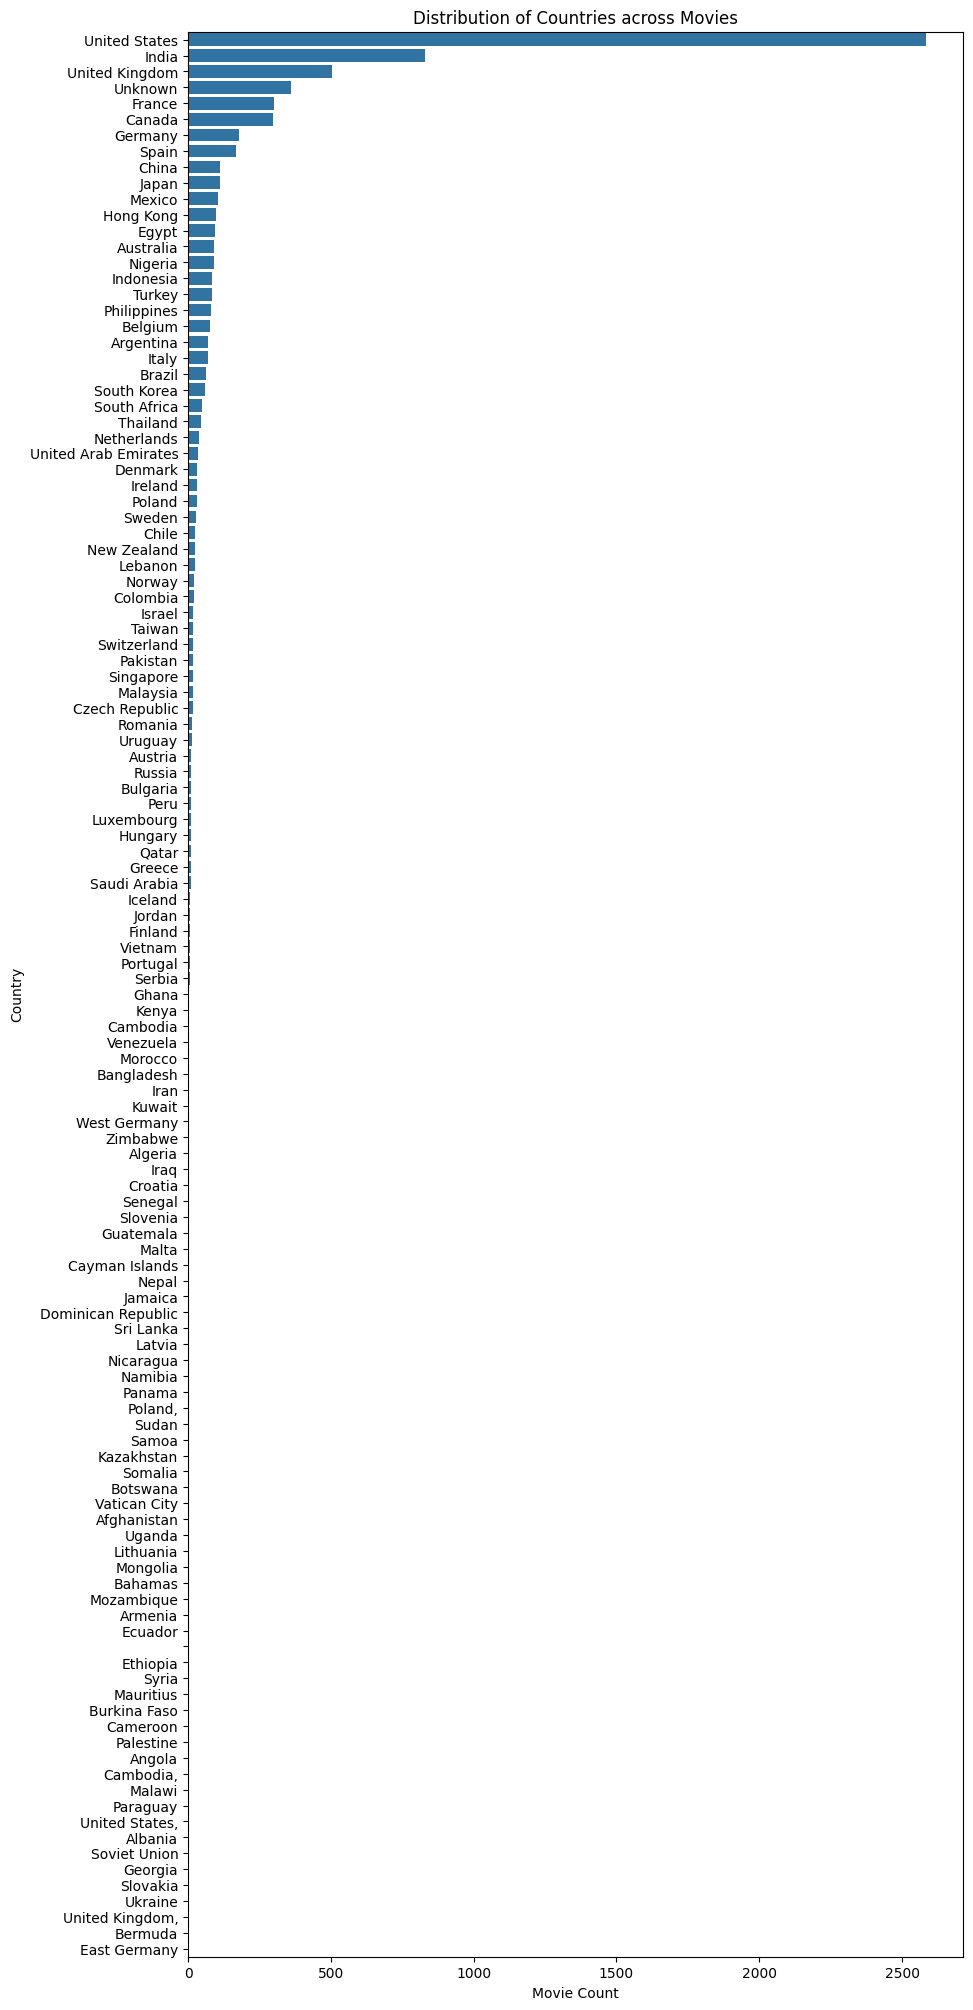

In [127]:
# caluclating frequency of Countries and plotting them
country_counts_movie = df_movie_country['country'].value_counts()
print("\nMovie - Country counts")
print(country_counts_movie)

plt.figure(figsize=(10, 25))
sns.barplot(y= country_counts_movie.index, x= country_counts_movie.values)
plt.title("Distribution of Countries across Movies")
plt.ylabel("Country")
plt.xlabel("Movie Count")
plt.show()

From the above cell Top 5 Movie producing countries are United States, India, United Kingdom, France, Canada.


TV Show - Country counts
country
United States           938
Unknown                 391
United Kingdom          272
Japan                   198
South Korea             170
                       ... 
Malta                     1
United Arab Emirates      1
Belarus                   1
Uruguay                   1
Switzerland               1
Name: count, Length: 67, dtype: int64


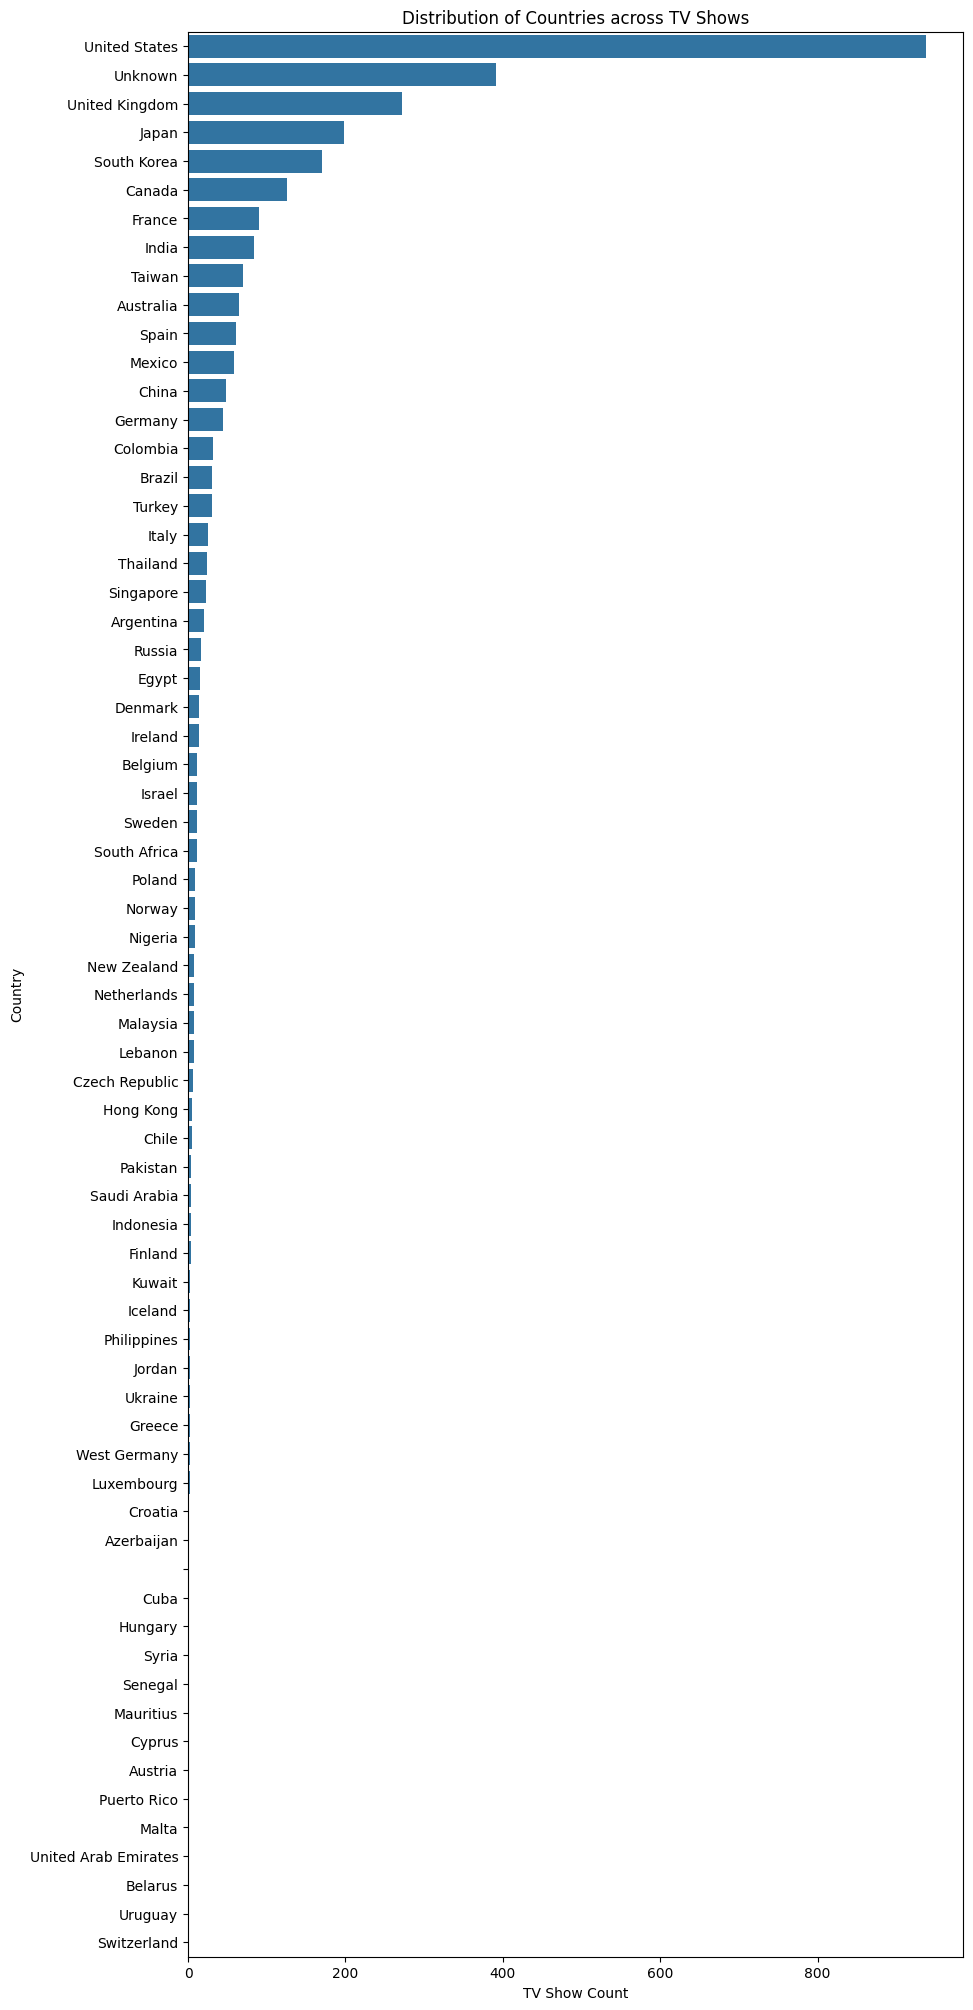

In [128]:
# caluclating frequency of Countries and plotting them
country_counts_tv_show = df_tv_show_country['country'].value_counts()
print("\nTV Show - Country counts")

print(country_counts_tv_show)

plt.figure(figsize=(10, 25))
sns.barplot(y= country_counts_tv_show.index, x= country_counts_tv_show.values)
plt.title("Distribution of Countries across TV Shows")
plt.ylabel("Country")
plt.xlabel("TV Show Count")
plt.show()

From the above cell Top 5 TV Show producing countries are United States, United Kingdom, Japan, South Korea, Canada.

Movie - Top 10 Countries are: country
United States     2584
India              831
United Kingdom     505
Unknown            360
France             300
Canada             298
Germany            177
Spain              168
China              113
Japan              112
Name: count, dtype: int64


<Axes: title={'center': 'Movie - Top 10 Content-Producing Countries'}, xlabel='country'>

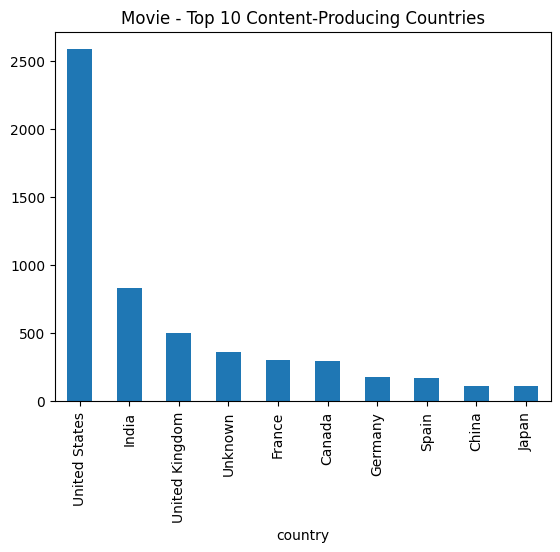

In [129]:
# Movie - Top 10 Countries
top_10_countries_movie = country_counts_movie.head(10)
print('Movie - Top 10 Countries are:',top_10_countries_movie)

top_10_countries_movie.plot(kind='bar', title="Movie - Top 10 Content-Producing Countries")

TV Show - Top 10 Countries are: country
United States     938
Unknown           391
United Kingdom    272
Japan             198
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          65
Name: count, dtype: int64


<Axes: title={'center': 'TV Show - Top 10 Content-Producing Countries'}, xlabel='country'>

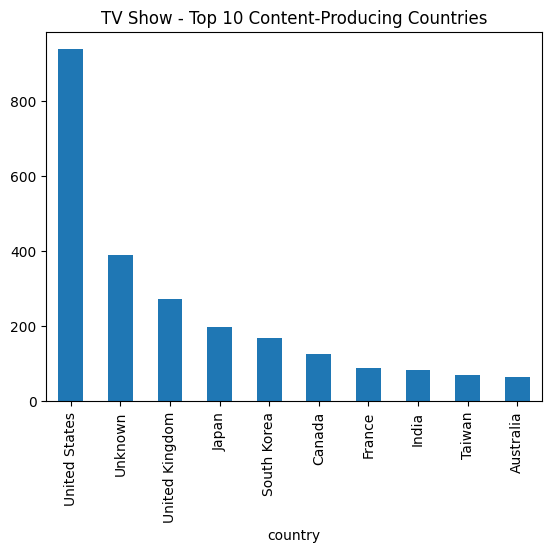

In [130]:
# TV Show - Top 10 Countries
top_10_countries_tv_show = country_counts_tv_show.head(10)
print('TV Show - Top 10 Countries are:',top_10_countries_tv_show)

top_10_countries_tv_show.plot(kind='bar', title="TV Show - Top 10 Content-Producing Countries")

<ipython-input-131-22f8c8dd415b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_movie_country_rating = df_movie_country.groupby(['rating', 'country'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)



Movie - Country and Rating counts
     rating        country  count
1080  TV-MA  United States    698
717       R  United States    646
769   TV-14          India    456
596   PG-13  United States    424
838   TV-14  United States    251
...     ...            ...    ...
578   PG-13        Somalia      0
577   PG-13       Slovenia      0
576   PG-13       Slovakia      0
575   PG-13      Singapore      0
1693     UR       Zimbabwe      0

[1694 rows x 3 columns]


Text(0, 0.5, 'Number of Ratings')

<Figure size 2500x600 with 0 Axes>

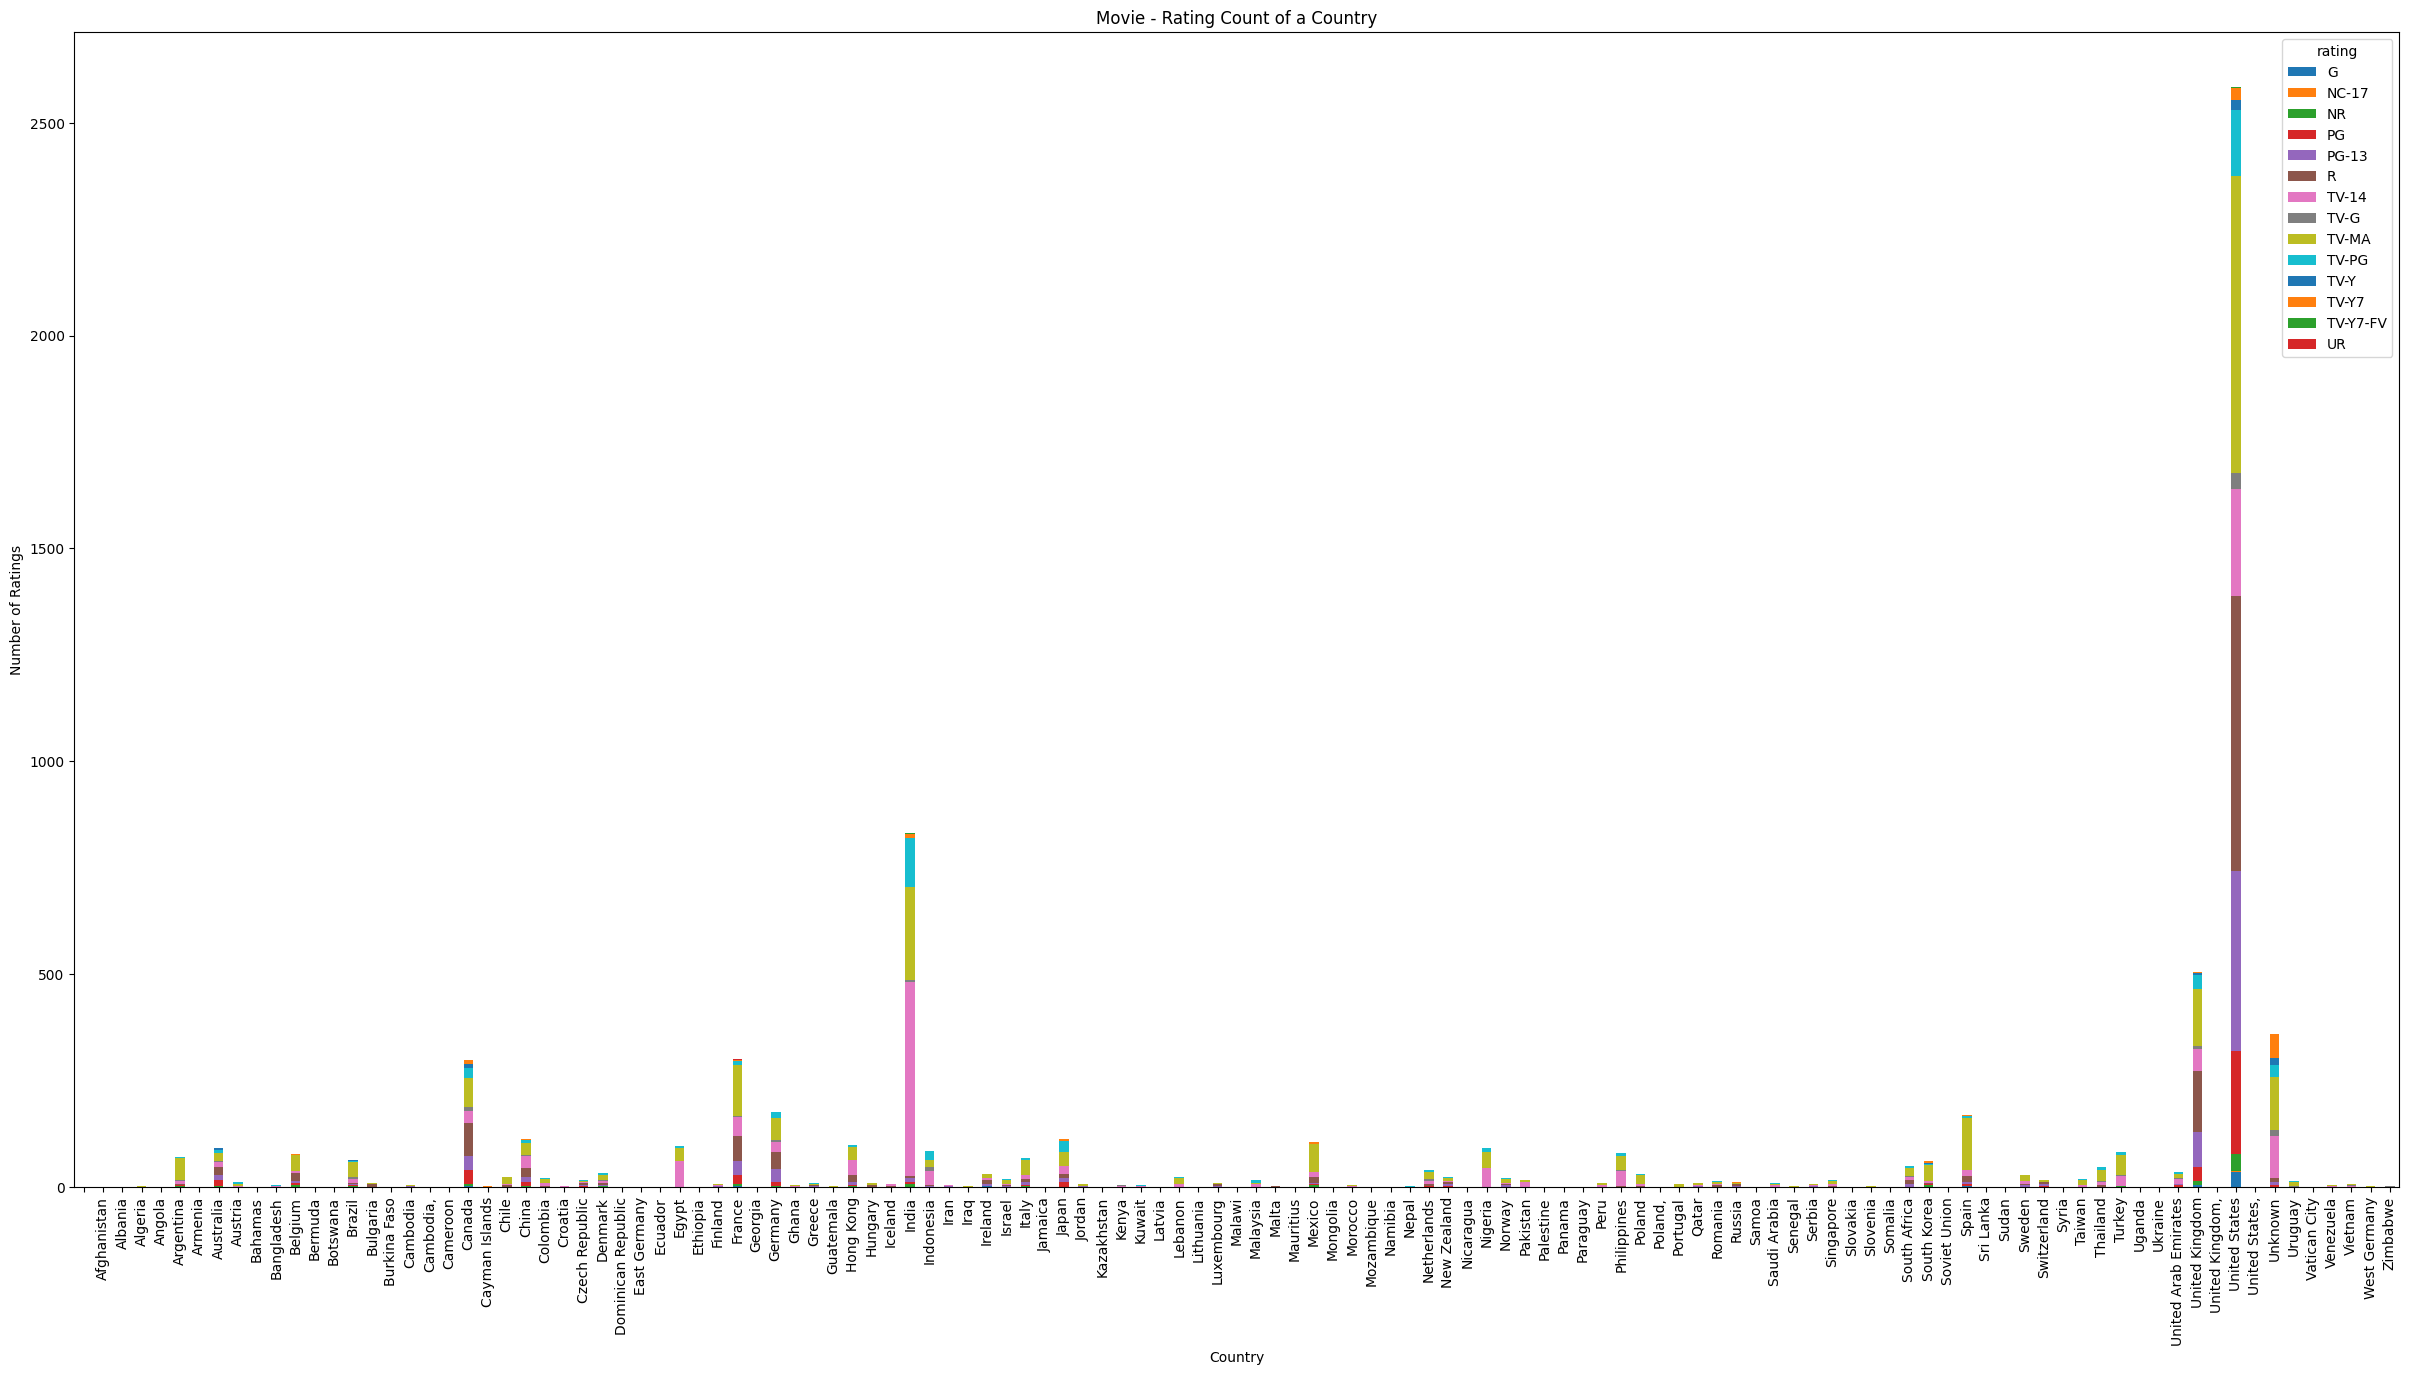

In [131]:
# plotting for relation between rating and country
df_movie_country_rating = df_movie_country.groupby(['rating', 'country'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)
print("\nMovie - Country and Rating counts")
print(df_movie_country_rating)

plt.figure(figsize=(25, 6))
df_movie_stacked_plot = pd.crosstab(index=df_movie_country['country'], columns=df_movie_country['rating'])
df_movie_stacked_plot.plot(kind='bar', stacked=True, figsize=(30, 15))

plt.title('Movie - Rating Count of a Country')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Number of Ratings')

From the above cell,For Movies Top 3 ratings are TV-MA, R, TV-14, with top2 countires as USA and India

<ipython-input-132-857419b5b532>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tv_show_country_rating = df_tv_show_country.groupby(['rating', 'country'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)



TV Show - Country and Rating counts
    rating         country  count
599  TV-MA   United States    382
465  TV-14   United States    221
600  TV-MA         Unknown    138
666  TV-PG   United States    124
598  TV-MA  United Kingdom    115
..     ...             ...    ...
300  PG-13          Kuwait      0
301  PG-13         Lebanon      0
302  PG-13      Luxembourg      0
303  PG-13        Malaysia      0
937     UR    West Germany      0

[938 rows x 3 columns]


Text(0, 0.5, 'Number of Ratings')

<Figure size 2500x600 with 0 Axes>

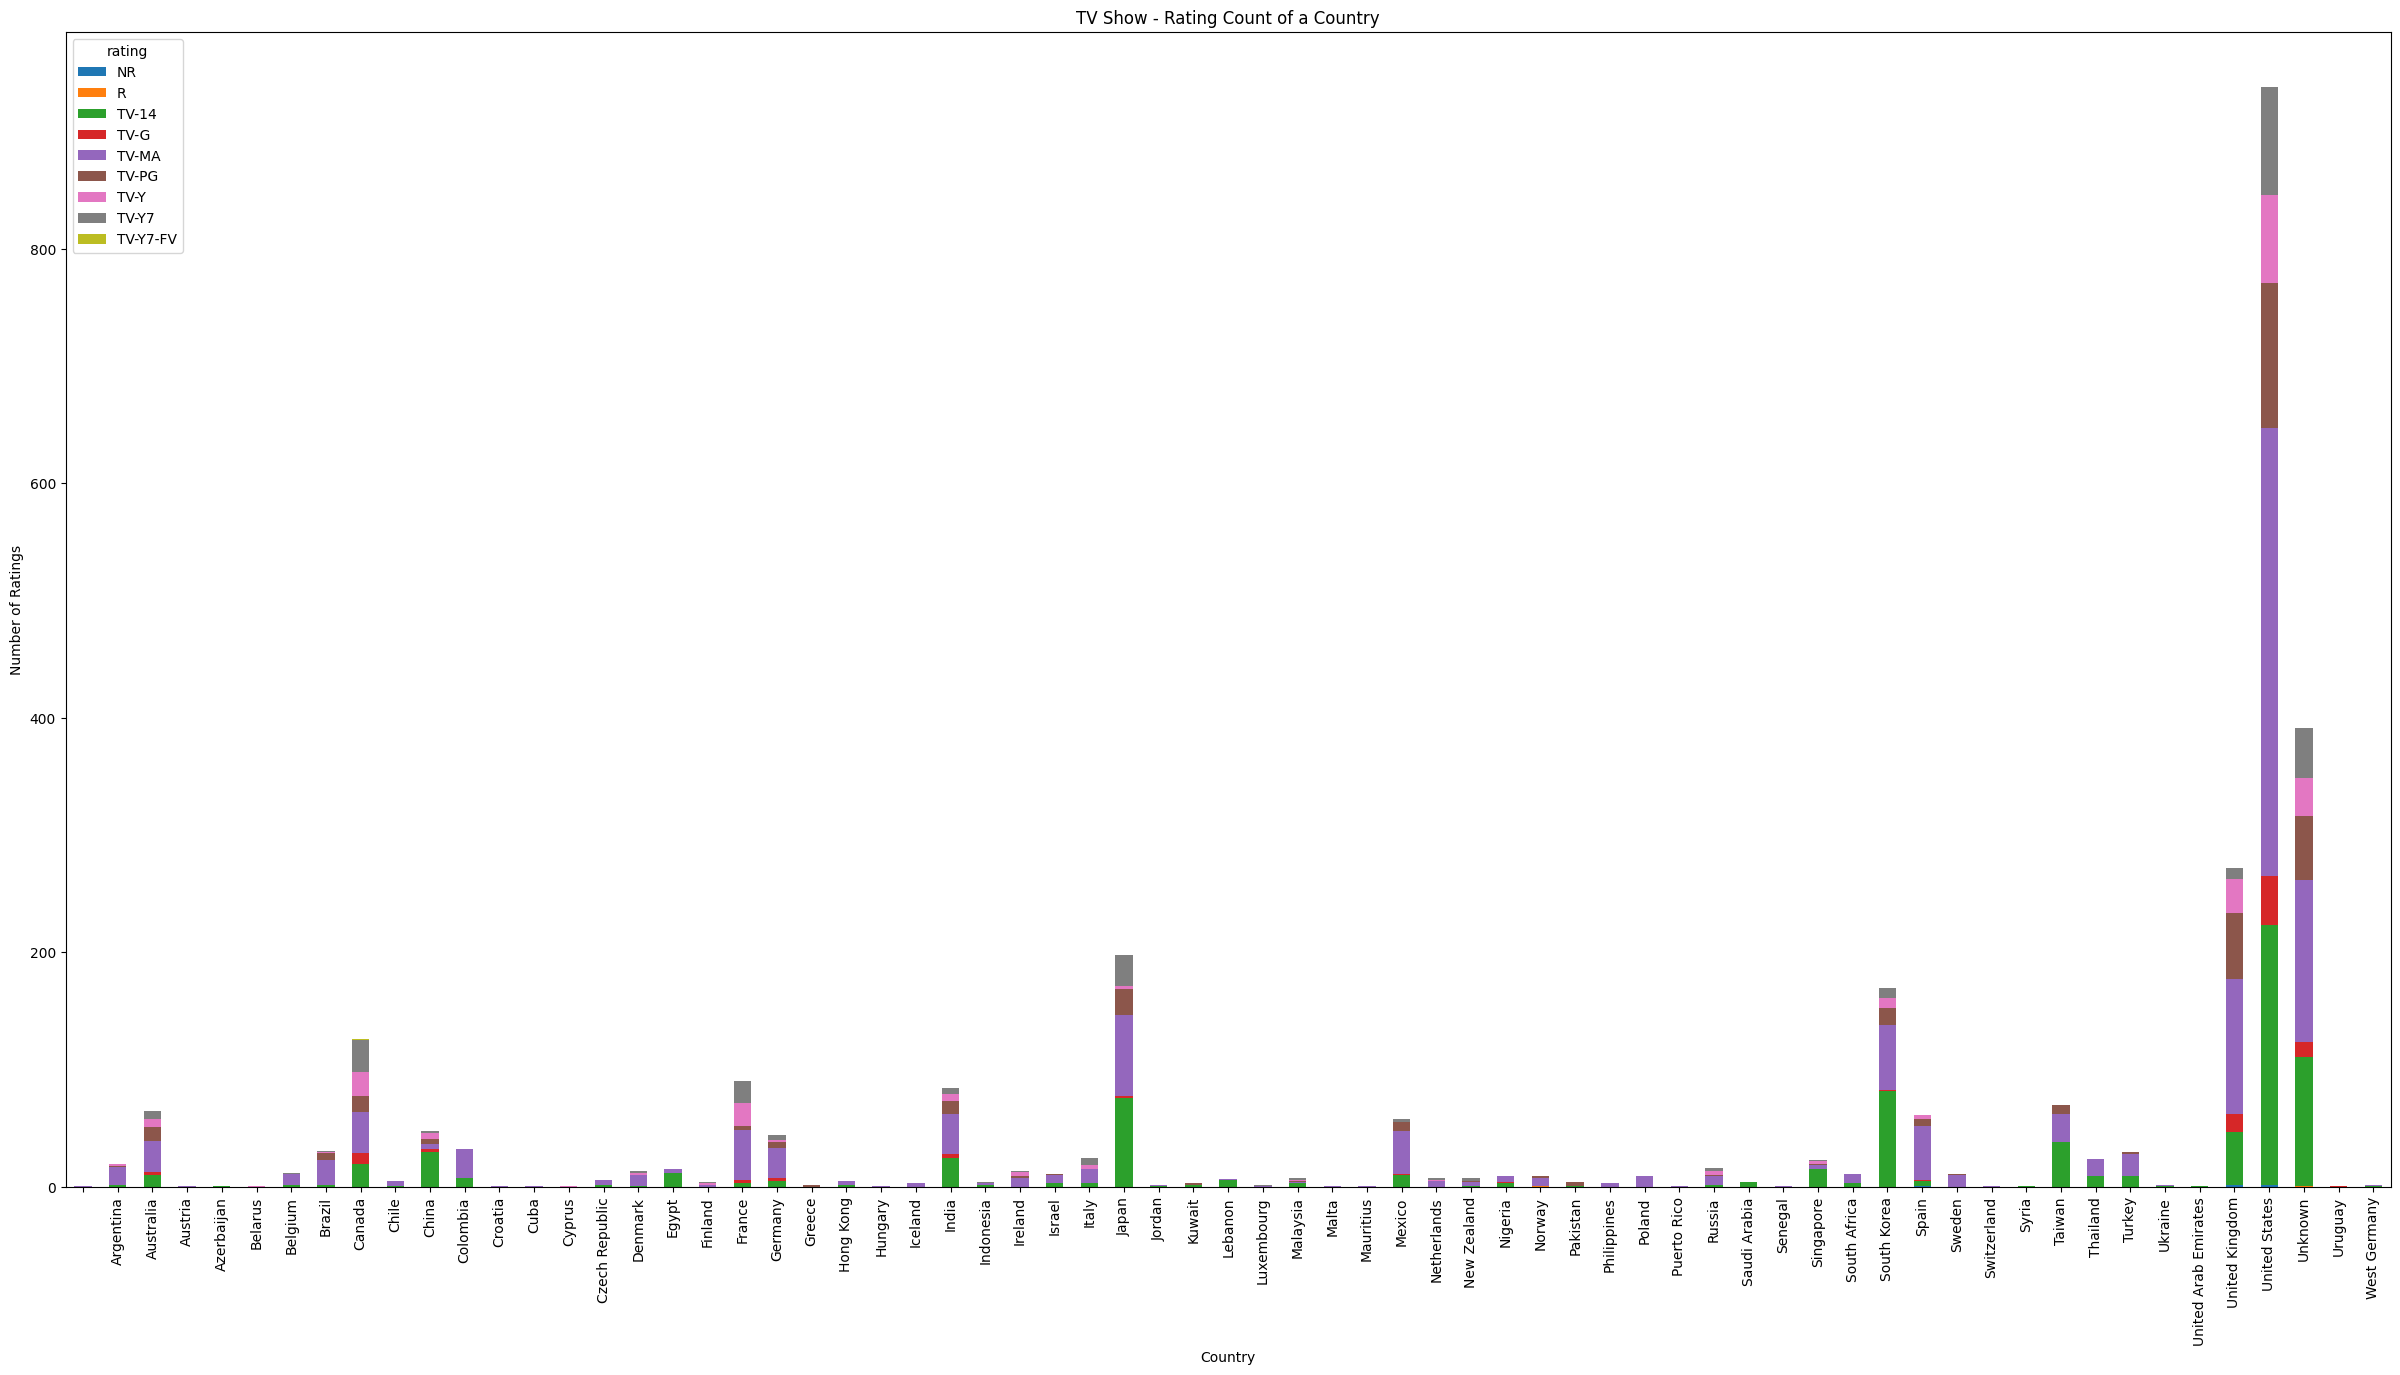

In [132]:
# plotting for relation between rating and country
df_tv_show_country_rating = df_tv_show_country.groupby(['rating', 'country'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)
print("\nTV Show - Country and Rating counts")
print(df_tv_show_country_rating)

plt.figure(figsize=(25, 6))
df_tv_show_stacked_plot = pd.crosstab(index=df_tv_show_country['country'], columns=df_tv_show_country['rating'])
df_tv_show_stacked_plot.plot(kind='bar', stacked=True, figsize=(30, 15))

plt.title('TV Show - Rating Count of a Country')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Number of Ratings')

From the above cell,For TV Show Top 3 ratings are TV-MA, TV-14, with Top country as USA.


Movie - Country and Release year counts
     release_year         country  count
767          2017   United States    346
838          2018   United States    303
698          2016   United States    274
898          2019   United States    244
943          2020   United States    174
..            ...             ...    ...
372          2009  Czech Republic      1
381          2009        Malaysia      1
383          2009         Nigeria      1
384          2009     Philippines      1
986          2021         Vietnam      1

[987 rows x 3 columns]


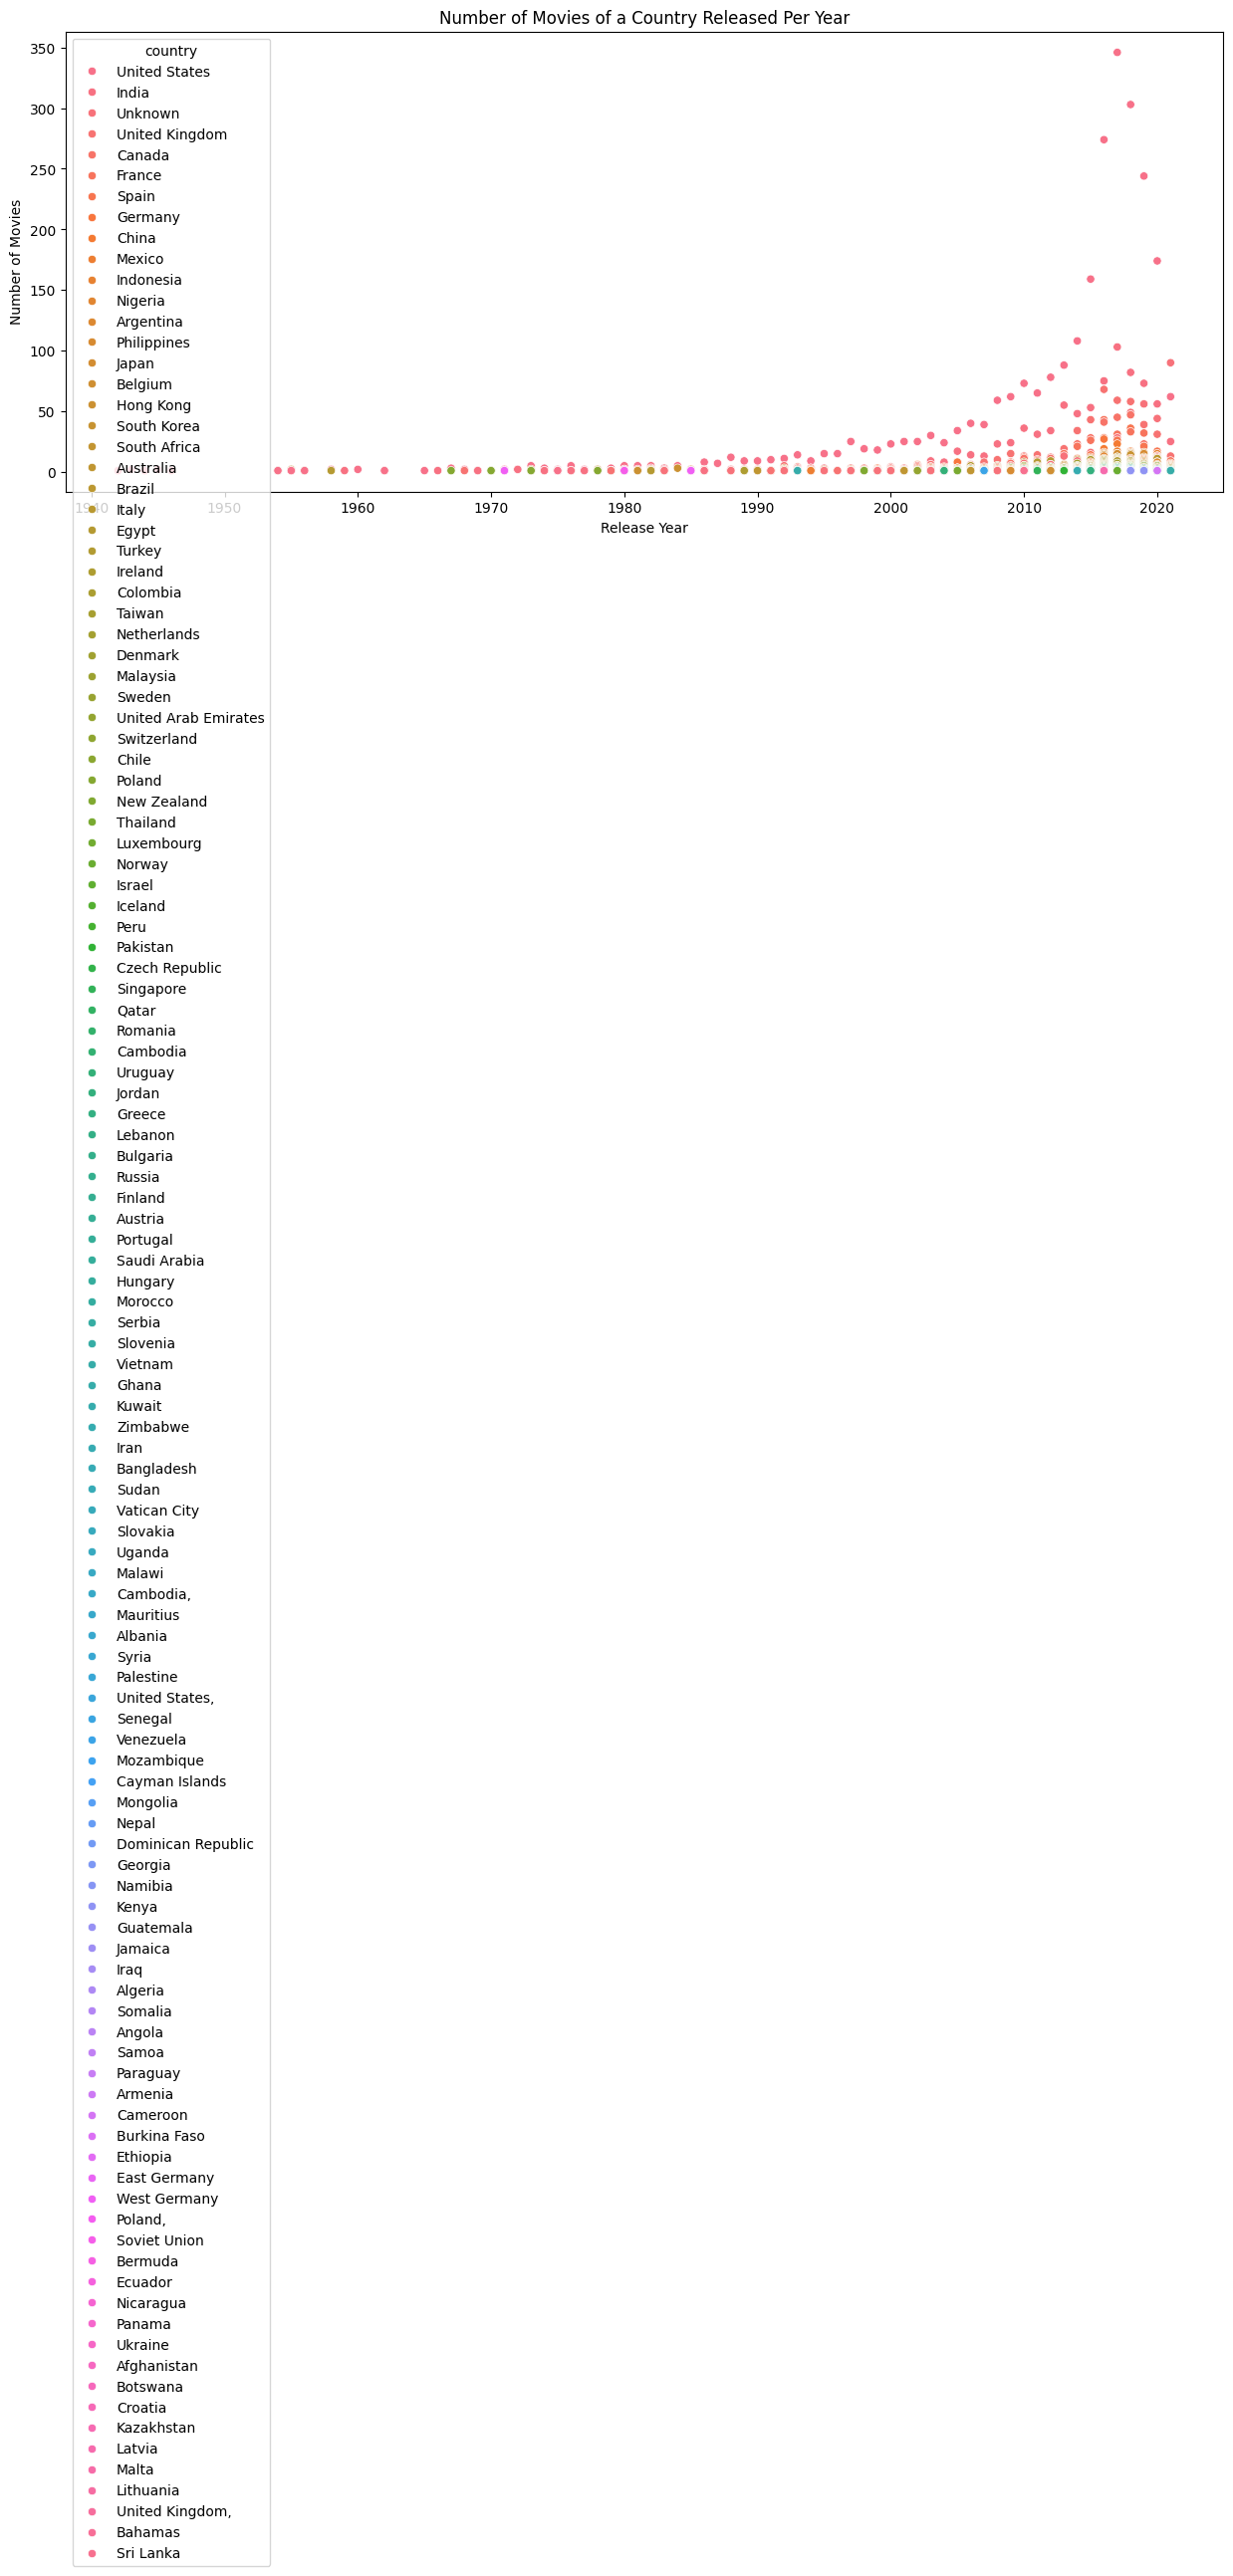

In [133]:
# plotting for relation between release_year and country
df_movie_country_release_year = df_movie_country.groupby(['release_year', 'country'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)
print("\nMovie - Country and Release year counts")
print(df_movie_country_release_year)

plt.figure(figsize=(15, 6))

sns.scatterplot(x= 'release_year', y='count', data=df_movie_country_release_year, hue = 'country')
plt.title('Number of Movies of a Country Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

The Country with highest no of Movies produced and released is USA in the years 2017 to 2021.


TV Show - Country and Release year counts
     release_year        country  count
440          2020  United States    185
398          2019  United States    160
359          2018  United States    140
476          2021  United States    107
477          2021        Unknown    101
..            ...            ...    ...
183          2013      Singapore      1
182          2013   Saudi Arabia      1
181          2013        Nigeria      1
180          2013         Mexico      1
478          2021        Uruguay      1

[479 rows x 3 columns]


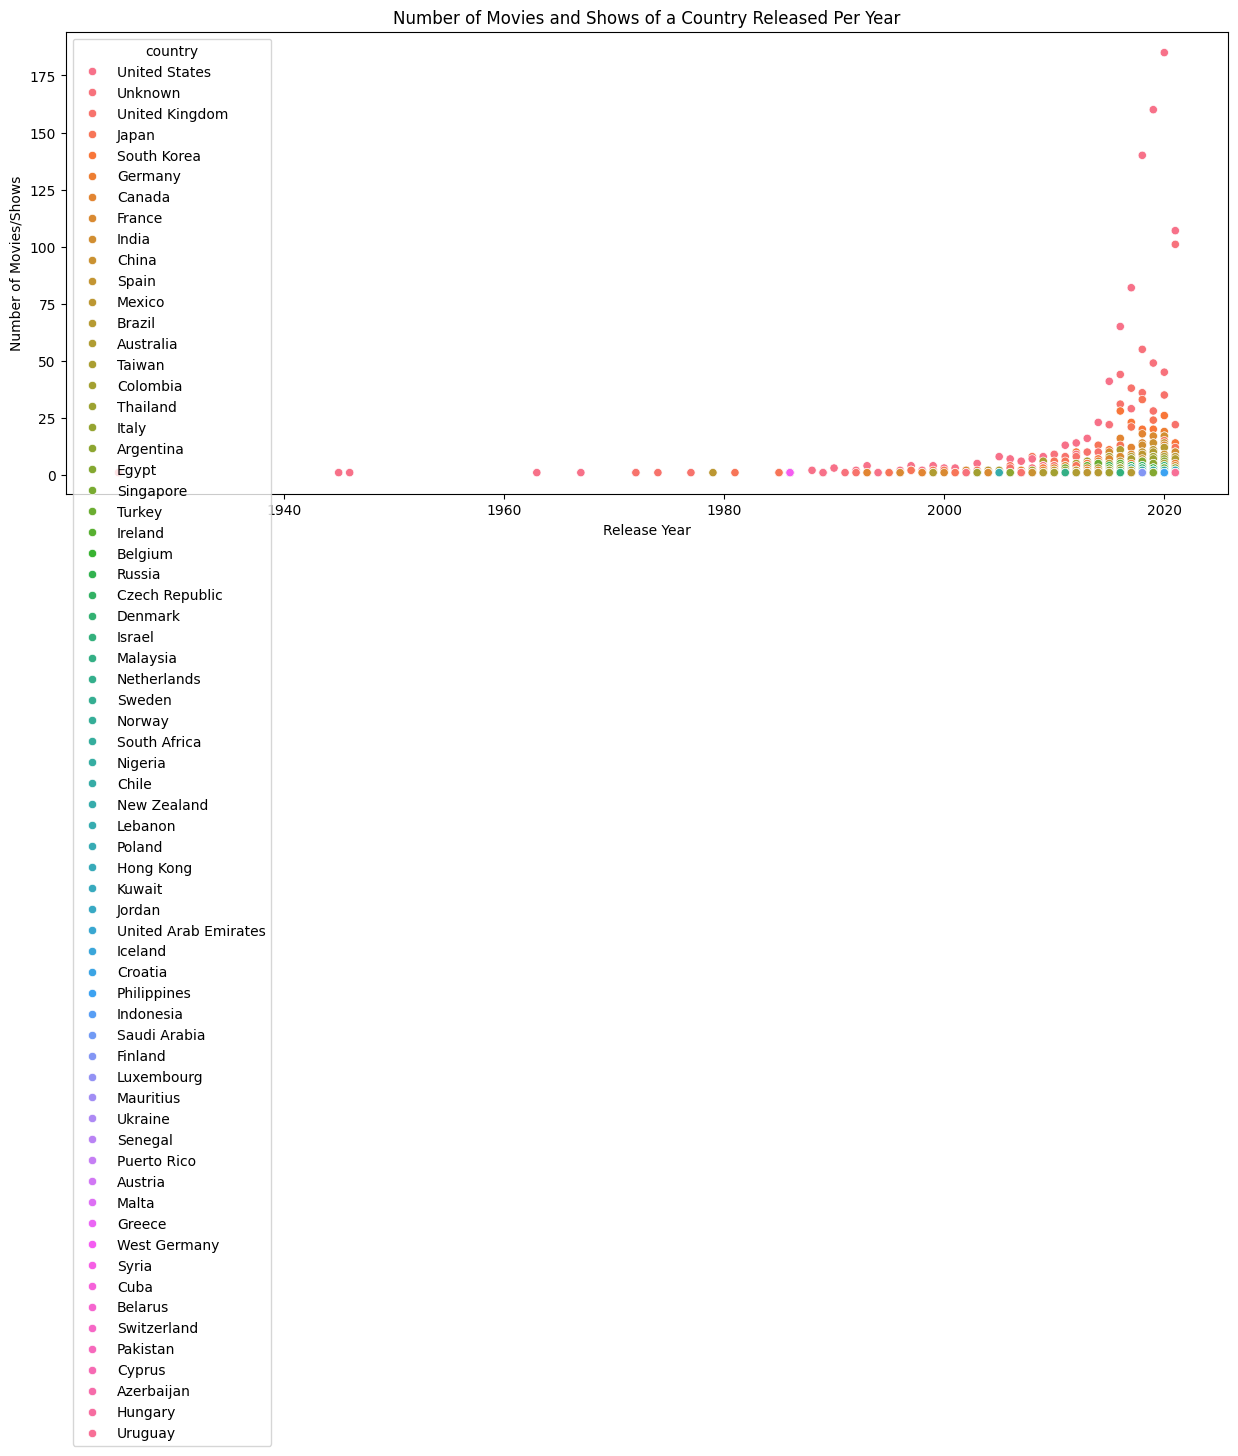

In [134]:
# plotting for relation between release_year and country
df_tv_show_country_release_year = df_tv_show_country.groupby(['release_year', 'country'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)
print("\nTV Show - Country and Release year counts")
print(df_tv_show_country_release_year)

plt.figure(figsize=(15, 6))  # Adjust figure size if needed

sns.scatterplot(x= 'release_year', y='count', data=df_tv_show_country_release_year, hue = 'country')
plt.title('Number of Movies and Shows of a Country Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/Shows')
plt.show()

The Country with highest no of TV Shows produced and released is USA in the years 2018 to 2021.


Movie - Country and Added year counts
     year_added        country  count
285        2019  United States    640
356        2020  United States    543
426        2021  United States    438
216        2018  United States    423
140        2017  United States    342
..          ...            ...    ...
145        2017   West Germany      1
144        2017        Vietnam      1
133        2017      Sri Lanka      1
129        2017       Slovenia      1
0          2008  United States      1

[431 rows x 3 columns]


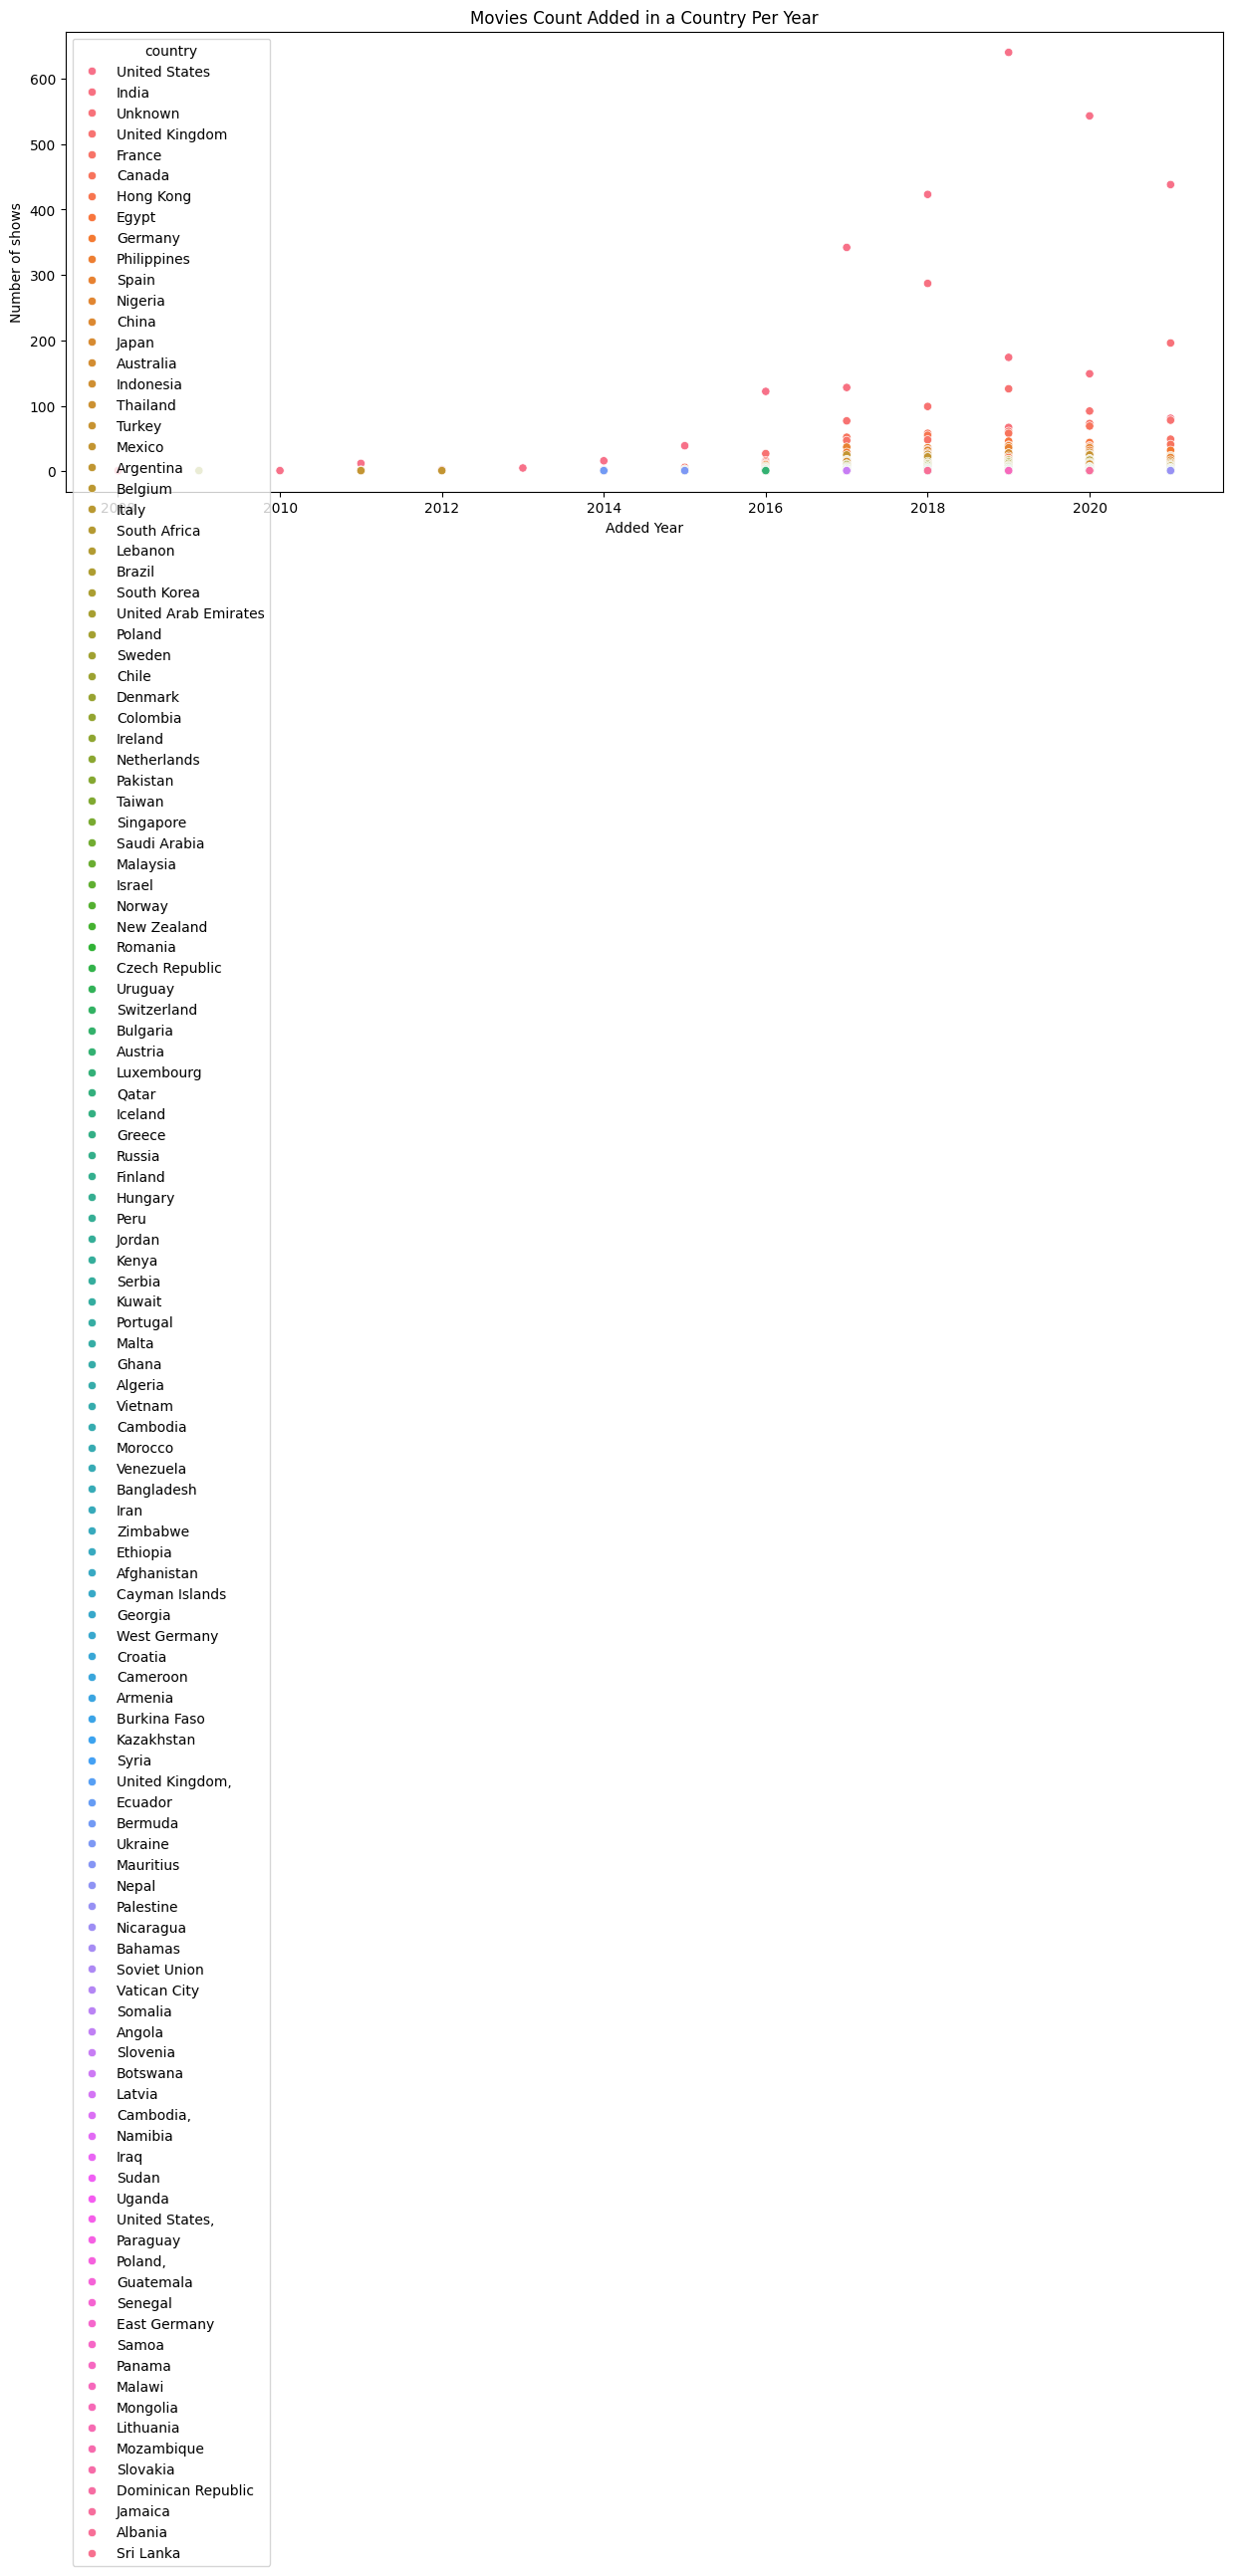

In [135]:
# plotting for relation between year_added and country - Movie
df_movie_country_year_added = df_movie_country.groupby(['year_added', 'country'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)
print("\nMovie - Country and Added year counts")
print(df_movie_country_year_added)

plt.figure(figsize=(15, 6))

sns.scatterplot(x= 'year_added', y='count', data=df_movie_country_year_added, hue = 'country')
plt.title('Movies Count Added in a Country Per Year')
plt.xlabel('Added Year')
plt.ylabel('Number of shows')
plt.show()

The Country with highest no of Movies produced and added in to is USA in the years 2017 to 2021.  


TV Show - Country and Added year counts
     year_added        country  count
217        2020  United States    246
166        2019  United States    178
261        2021  United States    175
122        2018  United States    146
262        2021        Unknown    135
..          ...            ...    ...
107        2018    Philippines      1
106        2018         Norway      1
103        2018       Malaysia      1
101        2018         Kuwait      1
263        2021        Uruguay      1

[264 rows x 3 columns]


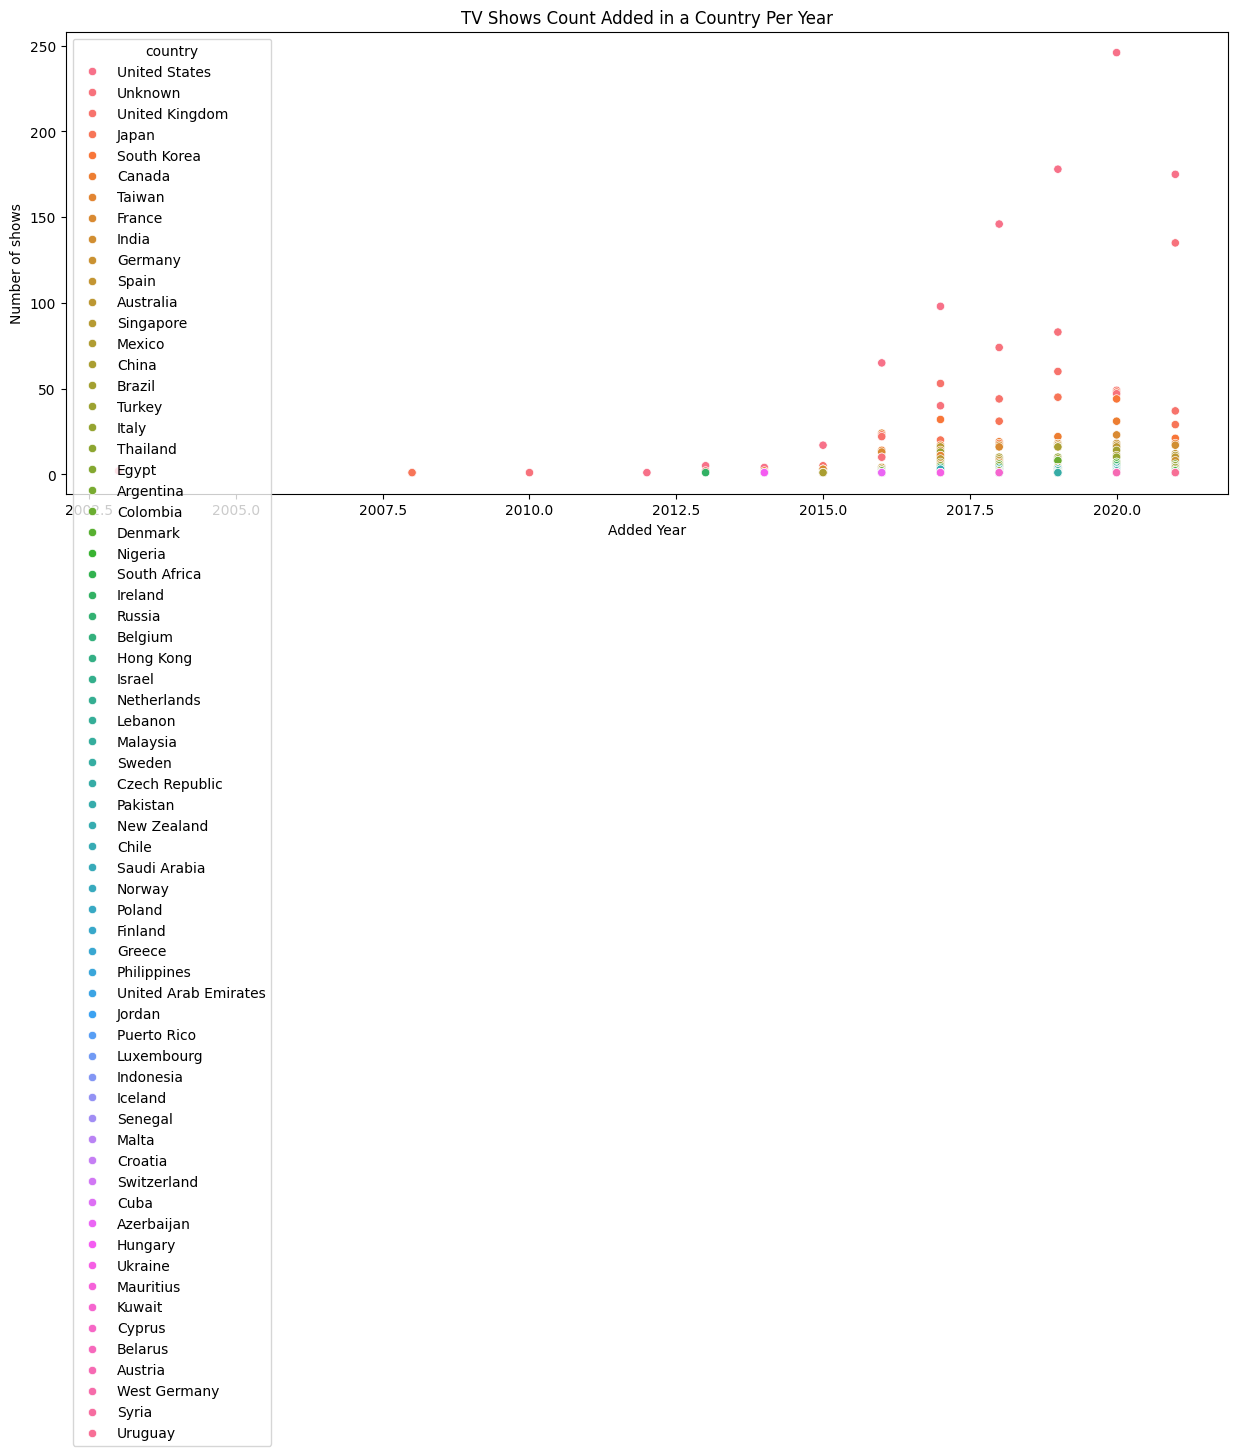

In [136]:
# plotting for relation between year_added and country - TV Show
df_tv_show_country_year_added = df_tv_show_country.groupby(['year_added', 'country'])['show_id'].count().reset_index(name='count').sort_values('count', ascending=False)
print("\nTV Show - Country and Added year counts")
print(df_tv_show_country_year_added)

plt.figure(figsize=(15, 6))

sns.scatterplot(x= 'year_added', y='count', data=df_tv_show_country_year_added, hue = 'country')
plt.title('TV Shows Count Added in a Country Per Year')
plt.xlabel('Added Year')
plt.ylabel('Number of shows')
plt.show()

The Country with highest no of TV shows produced and added in to is USA in the years 2018 to 2021.  

In [137]:
# Split and analyze director column for analysis on Movie directors.
df_movie_director['director'] = df_movie_director['director'].str.split(', ')
df_movie_director = df_movie_director.explode('director')
df_movie_director.head()

show_id   type                             title         director  \
0      s1  Movie              Dick Johnson Is Dead  Kirsten Johnson   
6      s7  Movie  My Little Pony: A New Generation    Robert Cullen   
6      s7  Movie  My Little Pony: A New Generation   José Luis Ucha   
7      s8  Movie                           Sankofa     Haile Gerima   
9     s10  Movie                      The Starling   Theodore Melfi   

                                                cast  \
0                                            Unknown   
6  Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
6  Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
9  Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   

                                             country date_added  release_year  \
0                                      United States 2021-09-25          2020   
6                                            Unknown 2021-09-24          2021   
6                                            Unknown 2021-09-24          2021   
7  United States, Ghana, Burkina Faso, United Kin... 2021-09-24          1993   
9                                      United States 2021-09-24          2021   

  rating  duration                                         listed_in  \
0  PG-13        90                                     Documentaries   
6     PG        91                          Children & Family Movies   
6     PG        91                          Children & Family Movies   
7  TV-MA       125  Dramas, Independent Movies, International Movies   
9  PG-13       104                                  Comedies, Dramas   

   year_added  month_added  week_added  quarter_added  \
0        2021            9          38              3   
6        2021            9          38              3   
6        2021            9          38              3   
7        2021            9          38              3   
9        2021            9          38              3   

   content_addition_year_delay  
0                            1  
6                            0  
6                            0  
7                           28  
9                            0

In [138]:
# Split and analyze director column for analysis on TV Show directors.
df_tv_show_director['director'] = df_tv_show_director['director'].str.split(', ')
df_tv_show_director = df_tv_show_director.explode('director')
df_tv_show_director.head()

show_id     type                  title         director  \
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   
5      s6  TV Show          Midnight Mass    Mike Flanagan   

                                                cast       country date_added  \
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  South Africa 2021-09-24   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...       Unknown 2021-09-24   
3                                            Unknown       Unknown 2021-09-24   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...         India 2021-09-24   
5  Kate Siegel, Zach Gilford, Hamish Linklater, H...       Unknown 2021-09-24   

   release_year rating  duration  \
1          2021  TV-MA         2   
2          2021  TV-MA         1   
3          2021  TV-MA         1   
4          2021  TV-MA         2   
5          2021  TV-MA         1   

                                           listed_in  year_added  month_added  \
1    International TV Shows, TV Dramas, TV Mysteries        2021            9   
2  Crime TV Shows, International TV Shows, TV Act...        2021            9   
3                             Docuseries, Reality TV        2021            9   
4  International TV Shows, Romantic TV Shows, TV ...        2021            9   
5                 TV Dramas, TV Horror, TV Mysteries        2021            9   

   week_added  quarter_added  content_addition_year_delay  
1          38              3                            0  
2          38              3                            0  
3          38              3                            0  
4          38              3                            0  
5          38              3                            0

In [139]:
# Counting no of Movies and shows directed by a director
director_counts_movie = df_movie_director['director'].value_counts()
print("Movie Director Counts")
print(director_counts_movie[1:])

Movie Director Counts
director
Rajiv Chilaka        22
Jan Suter            20
Raúl Campos          18
Suhas Kadav          16
Marcus Raboy         15
                     ..
Roy Poortmans         1
Vrinda Samartha       1
Nicholaus Goossen     1
Stig Bergqvist        1
Mozez Singh           1
Name: count, Length: 4553, dtype: int64


Top 5 Movie Directors: Rajiv Chilaka, Jan Suter, Raúl Campos, Suhas Kadav, Marcus Raboy

In [140]:
# Counting no of Movies and shows directed by a director
director_counts_tv_show = df_tv_show_director['director'].value_counts()
print("TV Show Director Counts")
print(director_counts_tv_show[1:])

TV Show Director Counts
director
Alastair Fothergill      3
Ken Burns                3
Iginio Straffi           2
Gautham Vasudev Menon    2
Hsu Fu-chun              2
                        ..
Jesse Vile               1
Ellena Wood              1
Picky Talarico           1
Pedro Waddington         1
Michael Cumming          1
Name: count, Length: 299, dtype: int64


Top 5 TV Show Directors : Alastair Fothergill, Ken Burns, Iginio Straffi, Gautham Vasudev Menon, Hsu Fu-chun

Top25 Movie Directors are: director
Rajiv Chilaka          22
Jan Suter              20
Raúl Campos            18
Suhas Kadav            16
Marcus Raboy           15
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            11
Youssef Chahine        11
Steven Spielberg       10
Don Michael Paul       10
Martin Scorsese         9
Yılmaz Erdoğan          9
Shannon Hartman         9
Kunle Afolayan          8
Fernando Ayllón         8
Lance Bangs             8
Troy Miller             8
Robert Rodriguez        8
Justin G. Dyck          8
Johnnie To              8
David Dhawan            8
Hakan Algül             8
Ryan Polito             7
Prakash Satam           7
Name: count, dtype: int64


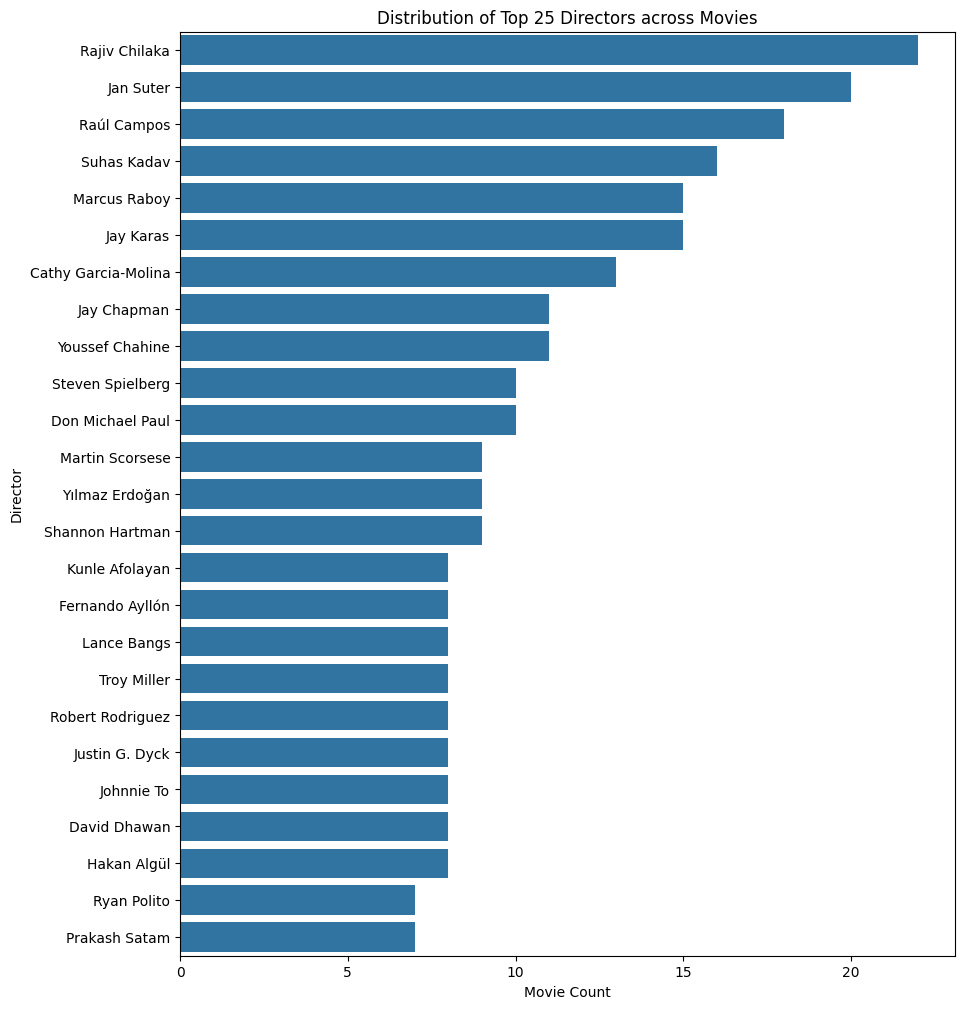

In [141]:
# Top 25 Movie Directors
top_25_directors_movie = director_counts_movie[1:26]
print('Top25 Movie Directors are:',top_25_directors_movie)


plt.figure(figsize=(10, 12))
sns.barplot(y= top_25_directors_movie.index, x= top_25_directors_movie.values)
plt.title("Distribution of Top 25 Directors across Movies")
plt.ylabel("Director")
plt.xlabel("Movie Count")
plt.show()

Top25 Countries are: director
Alastair Fothergill      3
Ken Burns                3
Iginio Straffi           2
Gautham Vasudev Menon    2
Hsu Fu-chun              2
Stan Lathan              2
Shin Won-ho              2
Joe Berlinger            2
Lynn Novick              2
Rob Seidenglanz          2
Jung-ah Im               2
Chen Hung-yi             1
Weica Wang               1
Cho Li                   1
Liu Bang-yao             1
Lin Guan-fu              1
Shen Chi                 1
Anurag Kashyap           1
YC Tom Lee               1
Vikramaditya Motwane     1
Jesse Moss               1
Luis Alberto Restrepo    1
Jerry Seinfeld           1
Jeon Go-woon             1
Mat King                 1
Name: count, dtype: int64


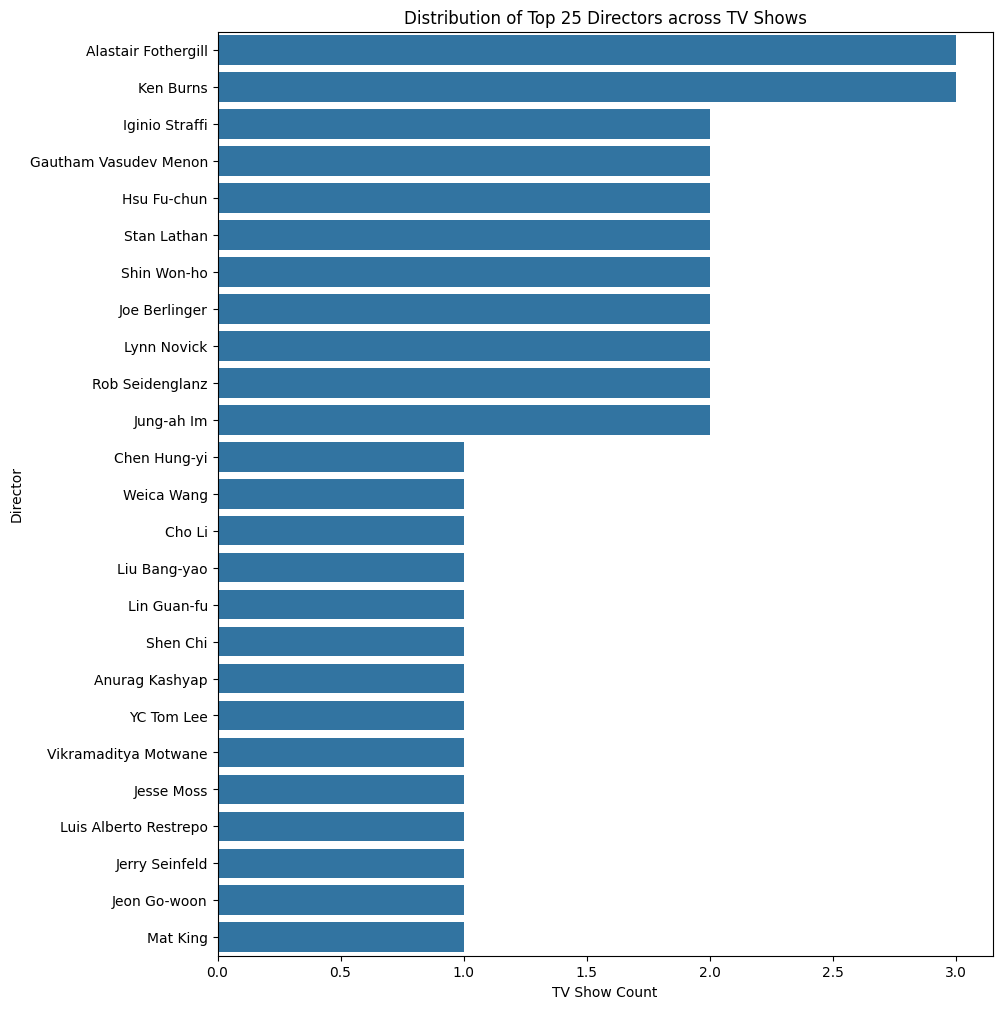

In [142]:
# Top 25 TV Show Directors
top_25_directors_tv_show = director_counts_tv_show[1:26]
print('Top25 Countries are:',top_25_directors_tv_show)


plt.figure(figsize=(10, 12))
sns.barplot(y= top_25_directors_tv_show.index, x= top_25_directors_tv_show.values)
plt.title("Distribution of Top 25 Directors across TV Shows")
plt.ylabel("Director")
plt.xlabel("TV Show Count")
plt.show()

In [143]:
# Split and analyze cast column for analysis on Movie Cast.
df_movie_cast['cast'] = df_movie_cast['cast'].str.split(', ')
df_movie_cast = df_movie_cast.explode('cast')
df_movie_cast.head()

show_id   type                             title  \
0      s1  Movie              Dick Johnson Is Dead   
6      s7  Movie  My Little Pony: A New Generation   
6      s7  Movie  My Little Pony: A New Generation   
6      s7  Movie  My Little Pony: A New Generation   
6      s7  Movie  My Little Pony: A New Generation   

                        director             cast        country date_added  \
0                Kirsten Johnson          Unknown  United States 2021-09-25   
6  Robert Cullen, José Luis Ucha  Vanessa Hudgens        Unknown 2021-09-24   
6  Robert Cullen, José Luis Ucha     Kimiko Glenn        Unknown 2021-09-24   
6  Robert Cullen, José Luis Ucha    James Marsden        Unknown 2021-09-24   
6  Robert Cullen, José Luis Ucha     Sofia Carson        Unknown 2021-09-24   

   release_year rating  duration                 listed_in  year_added  \
0          2020  PG-13        90             Documentaries        2021   
6          2021     PG        91  Children & Family Movies        2021   
6          2021     PG        91  Children & Family Movies        2021   
6          2021     PG        91  Children & Family Movies        2021   
6          2021     PG        91  Children & Family Movies        2021   

   month_added  week_added  quarter_added  content_addition_year_delay  
0            9          38              3                            1  
6            9          38              3                            0  
6            9          38              3                            0  
6            9          38              3                            0  
6            9          38              3                            0

In [144]:
# Split and analyze cast column for analysis on TV Show cast.
df_tv_show_cast['cast'] = df_tv_show_cast['cast'].str.split(', ')
df_tv_show_cast = df_tv_show_cast.explode('cast')
df_tv_show_cast.head()

show_id     type          title director              cast       country  \
1      s2  TV Show  Blood & Water  Unknown        Ama Qamata  South Africa   
1      s2  TV Show  Blood & Water  Unknown       Khosi Ngema  South Africa   
1      s2  TV Show  Blood & Water  Unknown     Gail Mabalane  South Africa   
1      s2  TV Show  Blood & Water  Unknown    Thabang Molaba  South Africa   
1      s2  TV Show  Blood & Water  Unknown  Dillon Windvogel  South Africa   

  date_added  release_year rating  duration  \
1 2021-09-24          2021  TV-MA         2   
1 2021-09-24          2021  TV-MA         2   
1 2021-09-24          2021  TV-MA         2   
1 2021-09-24          2021  TV-MA         2   
1 2021-09-24          2021  TV-MA         2   

                                         listed_in  year_added  month_added  \
1  International TV Shows, TV Dramas, TV Mysteries        2021            9   
1  International TV Shows, TV Dramas, TV Mysteries        2021            9   
1  International TV Shows, TV Dramas, TV Mysteries        2021            9   
1  International TV Shows, TV Dramas, TV Mysteries        2021            9   
1  International TV Shows, TV Dramas, TV Mysteries        2021            9   

   week_added  quarter_added  content_addition_year_delay  
1          38              3                            0  
1          38              3                            0  
1          38              3                            0  
1          38              3                            0  
1          38              3                            0

In [145]:
# Movie count of cast
cast_counts_movie = df_movie_cast['cast'].value_counts()
print("Movie Cast Counts")
print(cast_counts_movie[1:])

Movie Cast Counts
cast
Anupam Kher              31
Julie Tejwani            28
Rupa Bhimani             27
Akshay Kumar             26
Naseeruddin Shah         26
                         ..
Linda Gray                1
Masaki Suda               1
Takako Matsu              1
Suzu Hirose               1
Chittaranjan Tripathy     1
Name: count, Length: 25015, dtype: int64


In [146]:
# TV show count of cast
cast_counts_tv_show = df_tv_show_cast['cast'].value_counts()
print("TV Show Cast Counts")
print(cast_counts_tv_show[1:])

TV Show Cast Counts
cast
Takahiro Sakurai             25
Yuki Kaji                    19
Junichi Suwabe               17
Daisuke Ono                  17
Yuichi Nakamura              16
                             ..
Merit Leighton                1
Krystal Joy Brown             1
Numthip Jongrachatawiboon     1
Vorarit Fuangarom             1
Hina Khawaja Bayat            1
Name: count, Length: 14850, dtype: int64


Top50  Movie Actors are: cast
Anupam Kher            31
Julie Tejwani          28
Rupa Bhimani           27
Akshay Kumar           26
Naseeruddin Shah       26
Rajesh Kava            21
Paresh Rawal           21
Om Puri                21
Adam Sandler           20
Nicolas Cage           20
Samuel L. Jackson      20
Boman Irani            20
John Cleese            19
Kay Kay Menon          19
Jigna Bhardwaj         19
James Franco           19
Nawazuddin Siddiqui    18
Bruce Willis           17
Kareena Kapoor         17
Asrani                 17
Rajesh Sharma          16
Hassan Hosny           16
Vatsal Dubey           16
Danny Trejo            16
Morgan Freeman         16
Kristen Stewart        16
Amitabh Bachchan       15
Shah Rukh Khan         15
Rajpal Yadav           15
Willem Dafoe           15
Ajay Devgn             15
Gulshan Grover         15
Molly Shannon          15
Blossom Chukwujekwu    15
Sanjay Mishra          15
Toyin Abraham          15
Laurence Fishburne     14
Mike Epp

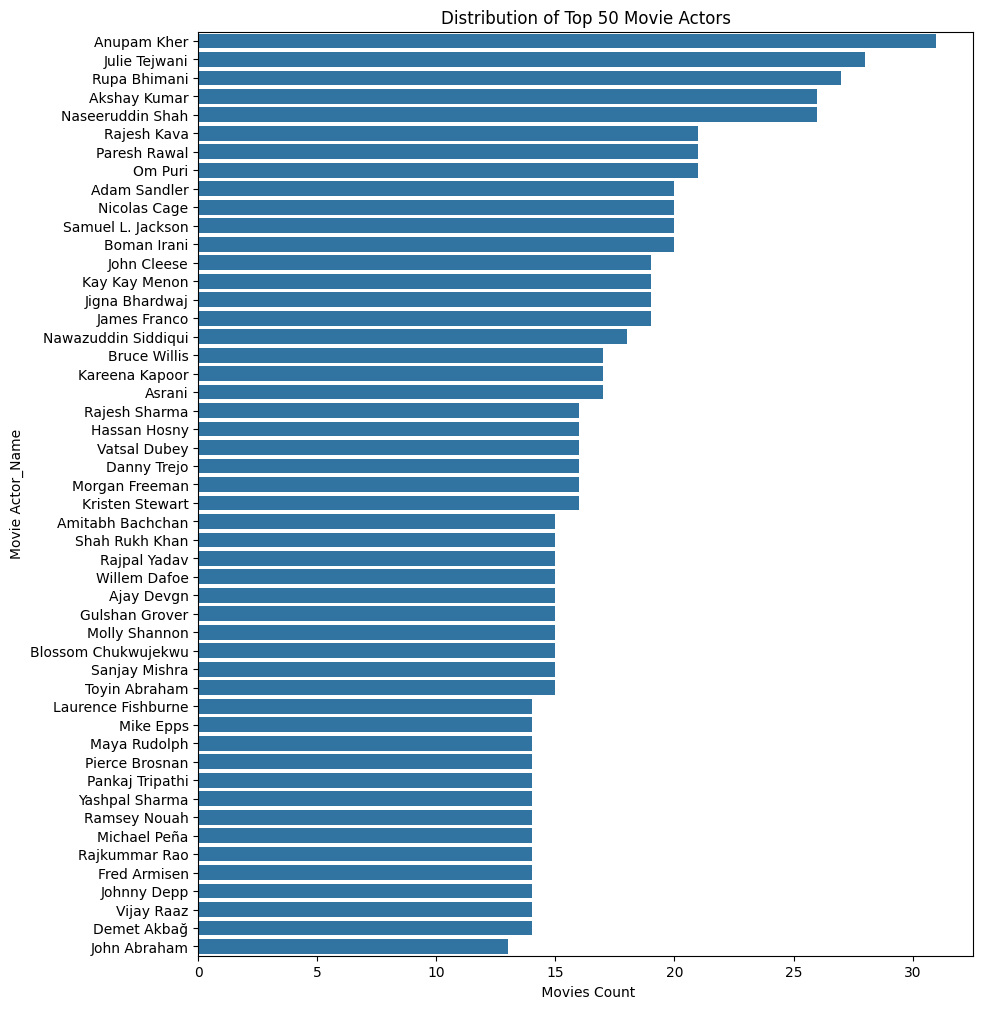

In [147]:
# Top 50 Movie Actors
top_50_cast_movie = cast_counts_movie[1:51]
print('Top50  Movie Actors are:',top_50_cast_movie)


plt.figure(figsize=(10, 12))
sns.barplot(y= top_50_cast_movie.index, x= top_50_cast_movie.values)
plt.title("Distribution of Top 50 Movie Actors")
plt.ylabel("Movie Actor_Name")
plt.xlabel(" Movies Count")
plt.show()

Top50 TV Show Actors are: cast
Takahiro Sakurai            25
Yuki Kaji                   19
Junichi Suwabe              17
Daisuke Ono                 17
Yuichi Nakamura             16
Ai Kayano                   16
Jun Fukuyama                15
Yoshimasa Hosoya            15
David Attenborough          14
Takehito Koyasu             13
Vincent Tong                13
Mamoru Miyano               13
Yoshitsugu Matsuoka         13
Kana Hanazawa               13
Hiroshi Kamiya              13
Natsuki Hanae               12
Kenjiro Tsuda               12
Nobuhiko Okamoto            12
Miyuki Sawashiro            11
Tomokazu Sugita             11
Tay Ping Hui                11
Ryohei Kimura               11
Ashleigh Ball               11
Yoko Hikasa                 11
Sayaka Ohara                10
Rie Kugimiya                10
Kaito Ishikawa              10
Katsuyuki Konishi           10
Grey Griffin                10
Johnny Yong Bosch           10
Daisuke Namikawa            10
Koji Yus

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


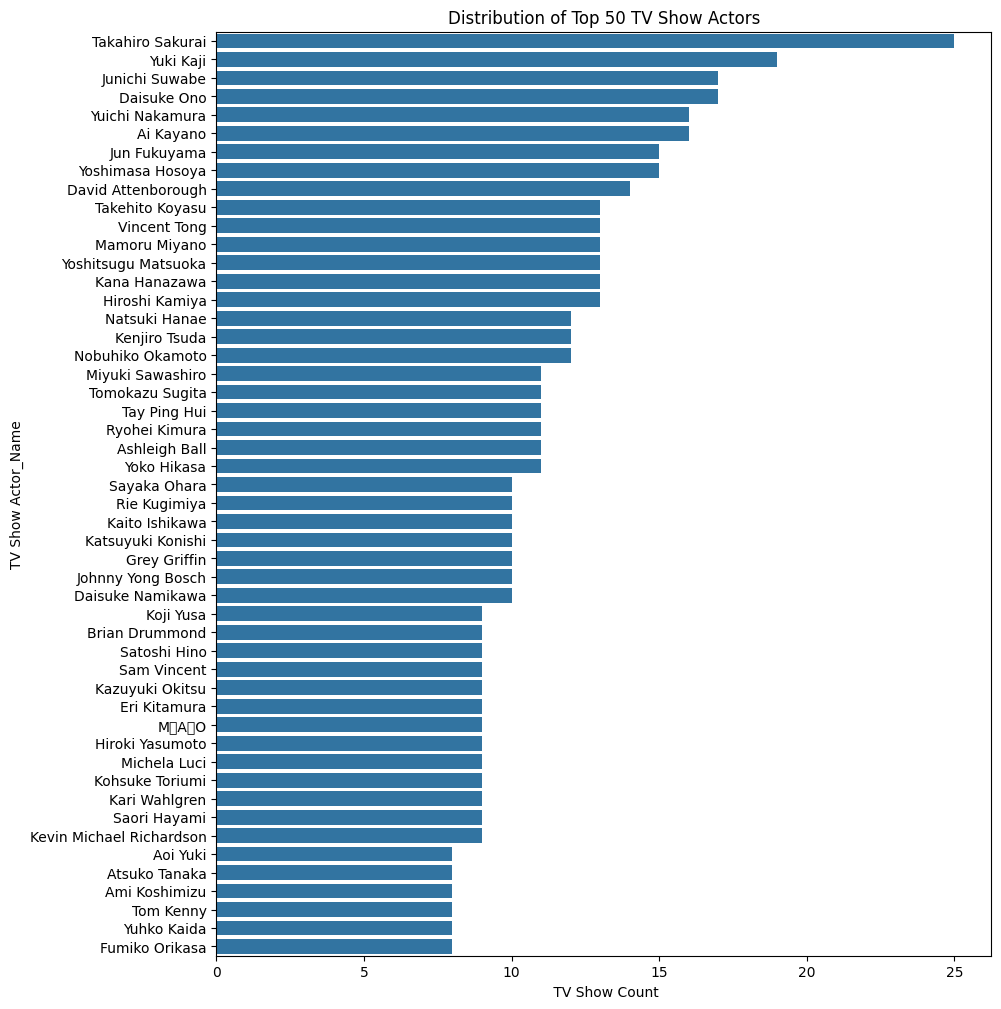

In [148]:
# Top 50 TV Show Actors
top_50_cast_tv_show = cast_counts_tv_show[1:51]
print('Top50 TV Show Actors are:',top_50_cast_tv_show)


plt.figure(figsize=(10, 12))
sns.barplot(y= top_50_cast_tv_show.index, x= top_50_cast_tv_show.values)
plt.title("Distribution of Top 50 TV Show Actors")
plt.ylabel("TV Show Actor_Name")
plt.xlabel(" TV Show Count")
plt.show()

In [149]:
# plotting relation between country and  Movie genre
df_movie_country_listed_in = df_movie_country.copy()
df_movie_country_listed_in['listed_in'] = df_movie_country_listed_in['listed_in'].str.split(', ')
df_movie_country_listed_in = df_movie_country_listed_in.explode('listed_in')
df_movie_country_listed_in.head()

show_id   type                             title  \
0      s1  Movie              Dick Johnson Is Dead   
6      s7  Movie  My Little Pony: A New Generation   
7      s8  Movie                           Sankofa   
7      s8  Movie                           Sankofa   
7      s8  Movie                           Sankofa   

                        director  \
0                Kirsten Johnson   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   
7                   Haile Gerima   
7                   Haile Gerima   

                                                cast        country  \
0                                            Unknown  United States   
6  Vanessa Hudgens, Kimiko Glenn, James Marsden, ...        Unknown   
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...  United States   
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...  United States   
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...  United States   

  date_added  release_year rating  duration                 listed_in  \
0 2021-09-25          2020  PG-13        90             Documentaries   
6 2021-09-24          2021     PG        91  Children & Family Movies   
7 2021-09-24          1993  TV-MA       125                    Dramas   
7 2021-09-24          1993  TV-MA       125        Independent Movies   
7 2021-09-24          1993  TV-MA       125      International Movies   

   year_added  month_added  week_added  quarter_added  \
0        2021            9          38              3   
6        2021            9          38              3   
7        2021            9          38              3   
7        2021            9          38              3   
7        2021            9          38              3   

   content_addition_year_delay  
0                            1  
6                            0  
7                           28  
7                           28  
7                           28

In [150]:
# plotting relation between country and TV show genre
df_tv_show_country_listed_in = df_tv_show_country.copy()
df_tv_show_country_listed_in['listed_in'] = df_tv_show_country_listed_in['listed_in'].str.split(', ')
df_tv_show_country_listed_in = df_tv_show_country_listed_in.explode('listed_in')
df_tv_show_country_listed_in.head()

show_id     type          title         director  \
1      s2  TV Show  Blood & Water          Unknown   
1      s2  TV Show  Blood & Water          Unknown   
1      s2  TV Show  Blood & Water          Unknown   
2      s3  TV Show      Ganglands  Julien Leclercq   
2      s3  TV Show      Ganglands  Julien Leclercq   

                                                cast       country date_added  \
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  South Africa 2021-09-24   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  South Africa 2021-09-24   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  South Africa 2021-09-24   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...       Unknown 2021-09-24   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...       Unknown 2021-09-24   

   release_year rating  duration               listed_in  year_added  \
1          2021  TV-MA         2  International TV Shows        2021   
1          2021  TV-MA         2               TV Dramas        2021   
1          2021  TV-MA         2            TV Mysteries        2021   
2          2021  TV-MA         1          Crime TV Shows        2021   
2          2021  TV-MA         1  International TV Shows        2021   

   month_added  week_added  quarter_added  content_addition_year_delay  
1            9          38              3                            0  
1            9          38              3                            0  
1            9          38              3                            0  
2            9          38              3                            0  
2            9          38              3                            0


Country and Movie Genre counts
           country                 listed_in  count
835  United States                    Dramas    804
329          India      International Movies    745
832  United States                  Comedies    654
325          India                    Dramas    562
834  United States             Documentaries    463
..             ...                       ...    ...
470          Malta           Romantic Movies      1
469          Malta                    Dramas      1
466       Malaysia        Independent Movies      1
462       Malaysia  Children & Family Movies      1
902       Zimbabwe           Romantic Movies      1

[903 rows x 3 columns]


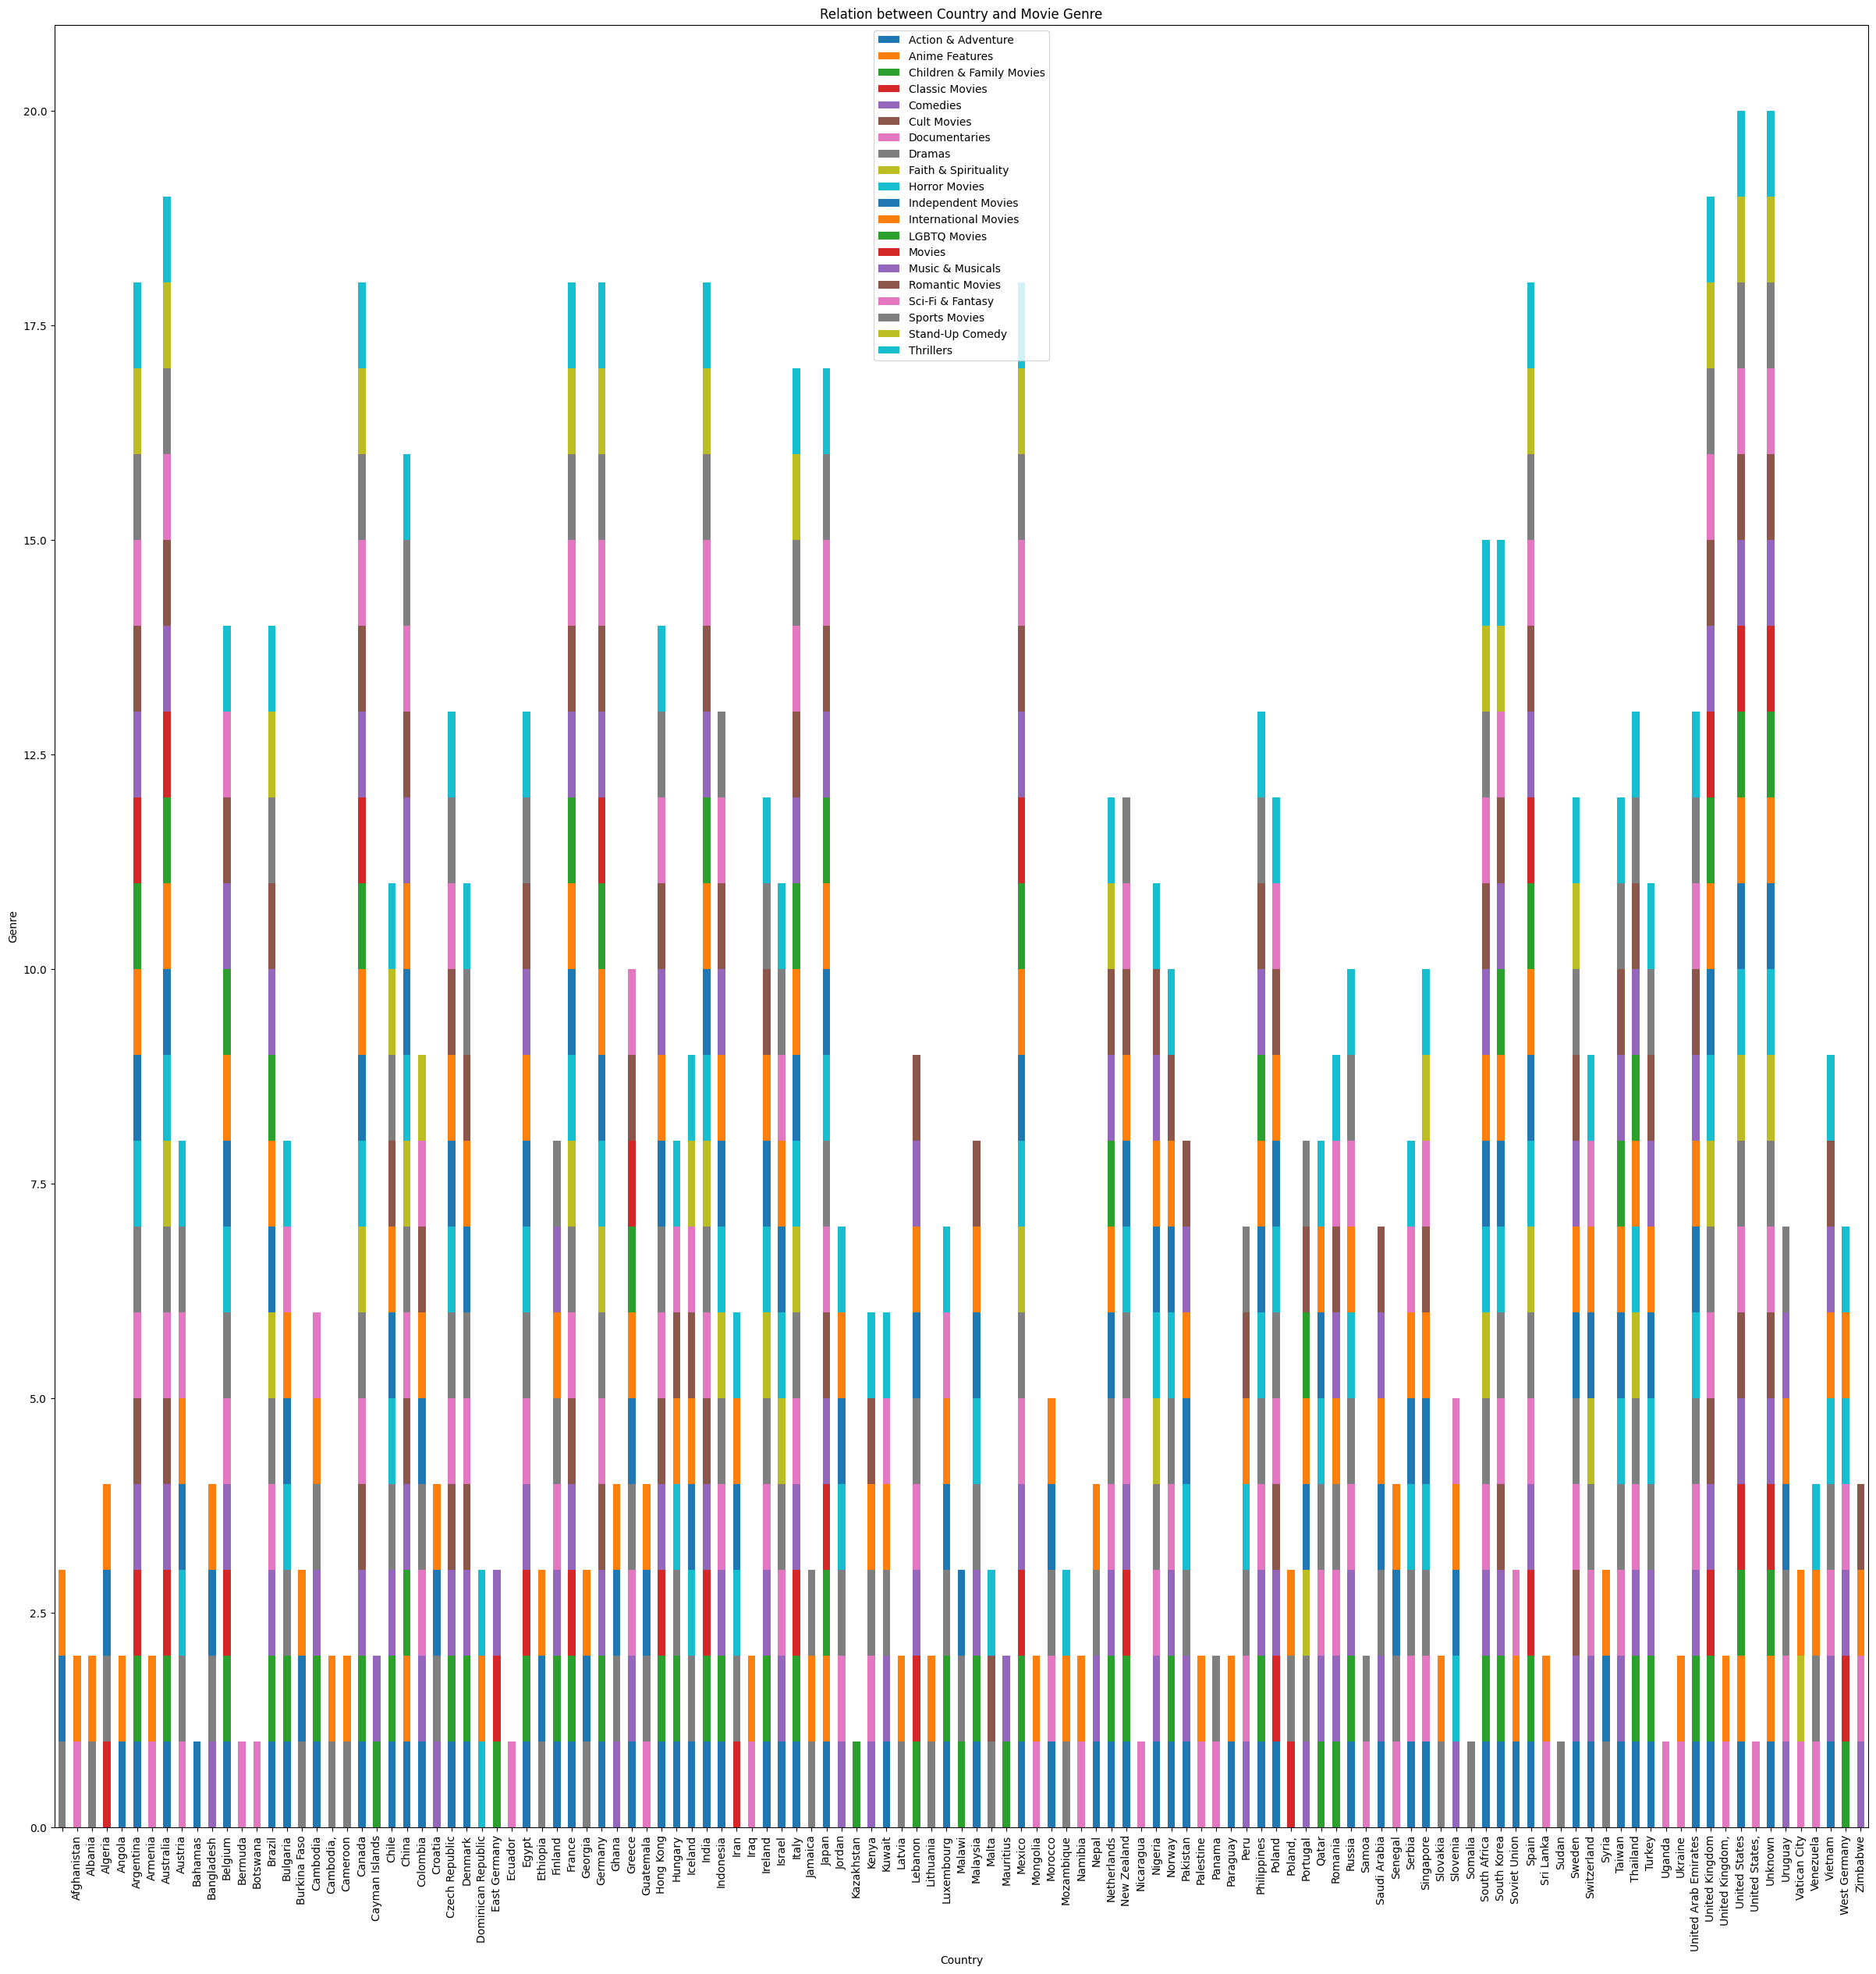

In [151]:
# Calculation and plotting to find relation between country and Movie genre
country_genre_counts_movie = df_movie_country_listed_in.groupby(['country', 'listed_in']).size().reset_index(name='count').sort_values('count', ascending=False)
print("\nCountry and Movie Genre counts")
print(country_genre_counts_movie)

df_movie_stacked_plot = pd.crosstab(index=country_genre_counts_movie['country'], columns=country_genre_counts_movie['listed_in'])

df_movie_stacked_plot.plot(kind='bar', stacked=True, figsize=(30, 30))

plt.xticks(rotation=90)
plt.legend(loc='best')
plt.title('Relation between Country and Movie Genre')
plt.xlabel('Country')
plt.ylabel('Genre')
plt.show()

For Movies USA has produced more Dramas and Comedies and India has produced more International Movies and Dramas.


Country and TV Show Genre counts
            country               listed_in  count
505   United States             TV Comedies    258
506   United States               TV Dramas    232
473  United Kingdom        British TV Shows    225
518         Unknown  International TV Shows    223
497   United States                Kids' TV    214
..              ...                     ...    ...
289       Mauritius               TV Dramas      1
288       Mauritius  International TV Shows      1
287           Malta               TV Dramas      1
286           Malta   TV Action & Adventure      1
540    West Germany               TV Dramas      1

[541 rows x 3 columns]


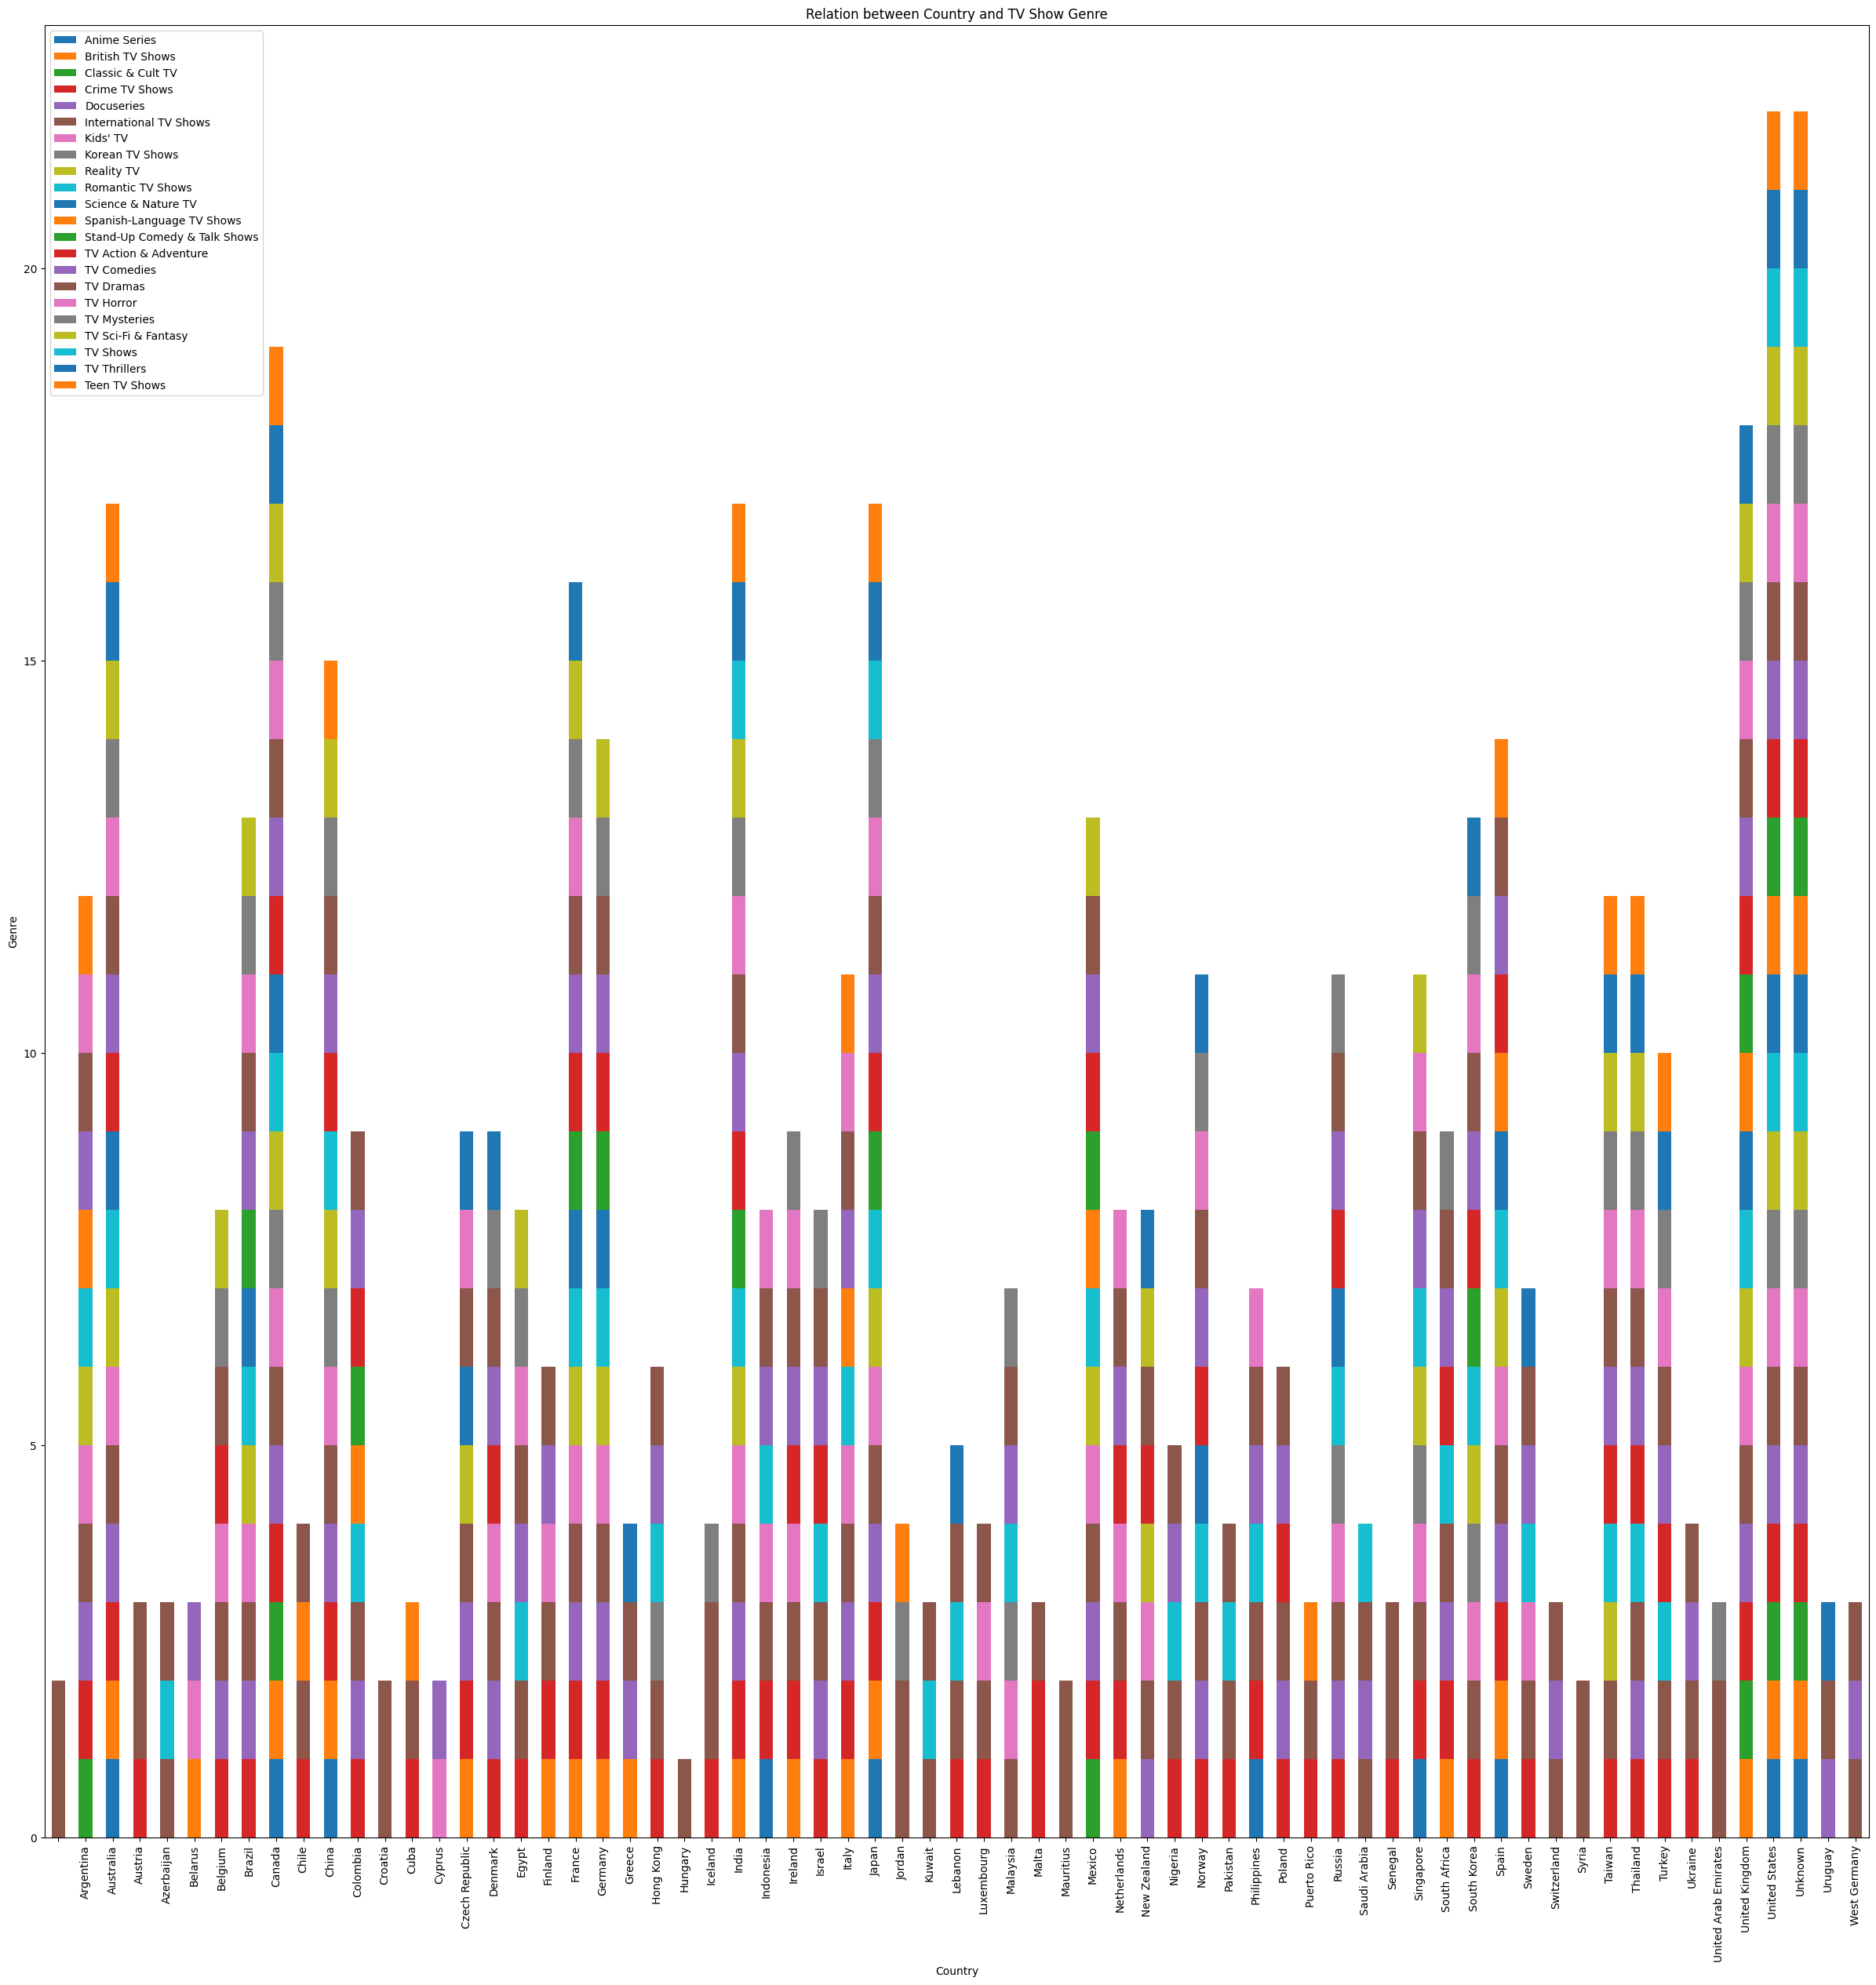

In [152]:
# Calculation and plotting to find relation between country and genre
country_genre_counts_tv_show = df_tv_show_country_listed_in.groupby(['country', 'listed_in']).size().reset_index(name='count').sort_values('count', ascending=False)
print("\nCountry and TV Show Genre counts")
print(country_genre_counts_tv_show)

df_tv_show_stacked_plot = pd.crosstab(index=country_genre_counts_tv_show['country'], columns=country_genre_counts_tv_show['listed_in'])

df_tv_show_stacked_plot.plot(kind='bar', stacked=True, figsize=(30, 30))

plt.xticks(rotation=90)
plt.legend(loc='best')
plt.title('Relation between Country and TV Show Genre')
plt.xlabel('Country')
plt.ylabel('Genre')
plt.show()

For TV Shows USA has produced more TV Dramas and TV Comedies.